In [1]:
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
import decimal
import time
from sklearn.metrics import auc
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoLocator, AutoMinorLocator
from matplotlib.lines import Line2D
from PIL import Image
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, BoundaryNorm

In [2]:
#automatize the extraction of info of the txt files
def read_file(folder, filename):
    with open(f"{folder}/{filename}.txt", "r") as file:
        reader = csv.reader(file, delimiter=' ')
        return [row for row in reader]

def read_file2(folder, filename):
    with open(f"{folder}/{filename}.txt", "r") as file:
        reader = csv.reader(file, delimiter=' ')
        # Skip the first and last element in each row
        return [row[1:-1] for row in reader]

def autobins(data, min_value=None, max_value=None, bin_method='freedman-diaconis'):
    if min_value is None:
        min_value = np.min(data)
    if max_value is None:
        max_value = np.max(data)
    
    # Calculate interquartile range (IQR)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    # Calculate bin width using Freedman-Diaconis rule
    bin_width = 2 * IQR * len(data) ** (-1/3)

    # Calculate number of bins
    num_bins = int((max_value - min_value) / bin_width)
    
    # Calculate bin size
    bin_size = (max_value - min_value) / num_bins
    
    bin_edges = np.arange(min_value, max_value, bin_size) 
    
    return bin_edges


def numbins(data, min_value=None, max_value=None, bin_method='freedman-diaconis'):
    if min_value is None:
        min_value = np.min(data)
    if max_value is None:
        max_value = np.max(data)
    
    # Calculate interquartile range (IQR)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    # Calculate bin width using Freedman-Diaconis rule
    bin_width = 2 * IQR * len(data) ** (-1/3)

    # Calculate number of bins
    num_bins = int((max_value - min_value) / bin_width) 
    
    return num_bins

def set_plot_style(labels=None, loc='best'):
    # Automatically set the number of major ticks
    plt.gca().xaxis.set_major_locator(AutoLocator())
    plt.gca().yaxis.set_major_locator(AutoLocator())

    # Automatically set the number of minor ticks
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())

    # Change the length of the tick marks
    plt.tick_params(axis='both', which='major', length=30, width=2, direction='in', top=True, right=True)  # Adjust the length as needed
    plt.tick_params(axis='both', which='minor', length=7, width=1.2,direction='in', top=True, right=True)  # Minor ticks

    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)

    # Change the width of the frame surrounding the plot
    for spine in plt.gca().spines.values():
        spine.set_linewidth(2)  # Adjust the linewidth as needed

    # Move the axes inside the plot
    ax = plt.gca()
    ax.spines['top'].set_position(('outward', 0))
    ax.spines['right'].set_position(('outward', 0))
    ax.spines['left'].set_position(('outward', 0))
    ax.spines['bottom'].set_position(('outward', 0))

    # Adjust the position of the ticks
    ax.tick_params(axis='x', direction='in', length=15, width=2)
    ax.tick_params(axis='y', direction='in', length=15, width=2)

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    # Add NOνA Simulation text inside the plot square at the title position
    plt.text(1.0, 1.1, fr'NOvA Simulation', fontsize=25, color='gray', ha='right', va='top', transform=plt.gca().transAxes,fontfamily='sans-serif')

    # Create custom legend handles if labels are provided
    if labels is not None:
        handles = [Line2D([0], [0], color='blue', lw=2), Line2D([0], [0], color='red', lw=2)]
        plt.legend(handles=handles, labels=labels, fontsize=20, loc=loc)

def set_plot_style2(labels=None, loc='best'):
    # Automatically set the number of major ticks
    plt.gca().xaxis.set_major_locator(AutoLocator())
    plt.gca().yaxis.set_major_locator(AutoLocator())

    # Automatically set the number of minor ticks
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())

    # Change the length of the tick marks
    plt.tick_params(axis='both', which='major', length=7, width=1, direction='in', top=True, right=True)  # Adjust the length as needed
    plt.tick_params(axis='both', which='minor', length=7, width=1, direction='in', top=True, right=True)  # Minor ticks

    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)

    # Change the width of the frame surrounding the plot
    for spine in plt.gca().spines.values():
        spine.set_linewidth(2)  # Adjust the linewidth as needed

    # Move the axes inside the plot
    ax = plt.gca()
    ax.spines['top'].set_position(('outward', 0))
    ax.spines['right'].set_position(('outward', 0))
    ax.spines['left'].set_position(('outward', 0))
    ax.spines['bottom'].set_position(('outward', 0))

    # Adjust the position of the ticks
    ax.tick_params(axis='x', direction='in', length=15, width=2)
    ax.tick_params(axis='y', direction='in', length=15, width=2)

    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    # Add NOνA Simulation text inside the plot square at the title position
    plt.text(1.0, 1.1, fr'NO$\nu$A Simulation', fontsize=25, color='blue', ha='right', va='top', transform=plt.gca().transAxes,fontfamily='sans-serif')

    # Create custom legend handles if labels are provided
    if labels is not None:
        handles = [Line2D([0], [0], color='blue', lw=2), Line2D([0], [0], color='red', lw=2)]
        plt.legend(handles=handles, labels=labels, fontsize=20, loc=loc)
        
        
def set_sn():
    plt.ticklabel_format(style='plain', axis='y')
    plt.gca().yaxis.get_offset_text().set_visible(False)

    # Define custom formatter for y-axis ticks
    def custom_formatter(x, pos):
        coeff, exponent = '{:.2e}'.format(x).split('e')
        if float(coeff) == 0:
            return r'$0$'
        else:
            return r'${:.0f}$'.format(float(coeff))

    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(custom_formatter))
    y_max = plt.ylim()[1]
    num_digits = len(str(abs(int(y_max))))
    exponent = int(num_digits)

    plt.ylim(0,y_max+(0.03*y_max))

    y_limits = plt.ylim()
    upper_limit = y_limits[1]

    plt.text(1, upper_limit, rf'$\times 10^{{{exponent}}}$', fontsize=20, ha='center', va='bottom')
    
def set_sn2():
    plt.ticklabel_format(style='plain', axis='y')
    plt.gca().yaxis.get_offset_text().set_visible(False)

    # max_value = max(energylost)
    max_value = plt.ylim()[1]
    factor = 10 ** (len(str(int(max_value))) - 1)

    # Define custom formatter for y-axis ticks
    def custom_formatter(x, pos):
        return r'${:.1f}$'.format(x / factor)


    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))
    y_max = plt.ylim()[1]
    num_digits = len(str(abs(int(y_max))))
    exponent = int(num_digits)-1

    plt.ylim(0,y_max+(0.03*y_max))

    y_limits = plt.ylim()
    upper_limit = y_limits[1]
    
    xlim = plt.xlim()
    plt.text(0, upper_limit, rf'$\times 10^{{{exponent}}}$', fontsize=20, ha='center', va='bottom')
    
def set_sn3():
    plt.ticklabel_format(style='plain', axis='y')
    plt.gca().yaxis.get_offset_text().set_visible(False)

    # max_value = max(energylost)
    max_value = plt.ylim()[1]
    factor = 10 ** (len(str(int(max_value))) - 1)

    # Define custom formatter for y-axis ticks
    def custom_formatter(x, pos):
        return r'${:.1f}$'.format(x / factor)


    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))
    y_max = plt.ylim()[1]
    num_digits = len(str(abs(int(y_max))))
    exponent = int(num_digits)-1

    plt.ylim(0,y_max+(0.03*y_max))

    y_limits = plt.ylim()
    upper_limit = y_limits[1]
    
    xlim = plt.xlim()
    plt.text(-2.2, upper_limit, rf'$\times 10^{{{exponent}}}$', fontsize=20, ha='center', va='bottom')
    
    
def set_sn4():
    plt.ticklabel_format(style='plain', axis='y')
    plt.gca().yaxis.get_offset_text().set_visible(False)

    # max_value = max(energylost)
    max_value = plt.ylim()[1]
    factor = 10 ** (len(str(int(max_value))) - 1)

    # Define custom formatter for y-axis ticks
    def custom_formatter(x, pos):
        return r'${:.1f}$'.format(x / factor)


    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))
    y_max = plt.ylim()[1]
    num_digits = len(str(abs(int(y_max))))
    exponent = int(num_digits)-1

    plt.ylim(0,y_max+(0.03*y_max))

    y_limits = plt.ylim()
    upper_limit = y_limits[1]
    
    xlim = plt.xlim()
    plt.text(-1, upper_limit, rf'$\times 10^{{{exponent}}}$', fontsize=20, ha='center', va='bottom')
    
    
def calculate_percentage_in_range(particle_data, key, prop, lower_bound, upper_bound):
    results = {}
    for particle_type, properties in particle_data.items():
        data_list = properties[prop]
        if data_list:
            count_in_range = sum(lower_bound <= value <= upper_bound for value in data_list)
            percentage_in_range = (count_in_range / len(data_list)) * 100
        else:
            percentage_in_range = 0.0
        results[particle_type] = percentage_in_range
    return results

In [21]:
#calculate difference between trues and prongs:
folders=['Res','DIS','QE','MEC']
diffprimprongs = []
#store the list of NT original numpi
#store the list of Reco numpi
for folder in folders:
    temp=read_file(folder, 'recovars_total')
    for event in temp:
        diffprimprongs.append(int(event[1]))

In [32]:
def calculate_percentages(data, thresholds):
    percentages = {}
    total = len(data)
    for threshold in thresholds:
        below_threshold = np.sum(np.array(data) < threshold)
        above_threshold = np.sum(np.array(data) >= threshold)
        percentages[threshold] = {
            'below': (below_threshold / total) * 100,
            'above': (above_threshold / total) * 100
        }
    return percentages

# Example usage
thresholds = [1,-1,0]  # Define your own thresholds
percentages = calculate_percentages(diffprimprongs, thresholds)
for threshold, perc in percentages.items():
    print(f'Threshold {threshold}: Below {perc["below"]:.2f}%, Above {perc["above"]:.2f}%')

Threshold 1: Below 25.52%, Above 74.48%
Threshold -1: Below 3.63%, Above 96.37%
Threshold 0: Below 10.48%, Above 89.52%


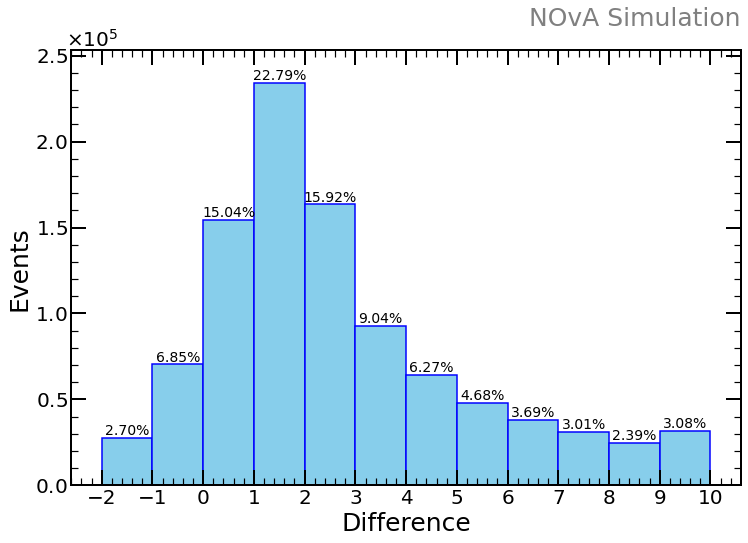

In [22]:
# Define histogram parameters
bin_size = 1
bin_edges = np.arange(-2, 11, bin_size) 

# Calculate total count
total_events = len(diffprimprongs)

# Create histogram
plt.figure(figsize=(12, 8))
counts, bins, patches = plt.hist(diffprimprongs, bins=bin_edges, edgecolor='blue', linewidth=1.5, color='skyblue')

# Calculate and add percentage annotations
for count, bin_edge in zip(counts, bins[:-1]):
    percent = (count / total_events) * 100
    plt.text(bin_edge + bin_size/2, count, f'{percent:.2f}%', ha='center', va='bottom', fontsize=14)

plt.xlabel('Difference', fontsize=25)
plt.ylabel('Events', fontsize=25)
# plt.title('Difference between truth primary particles and prongs', fontsize=30)

# Apply custom plot styles
set_plot_style()
set_sn3()

plt.locator_params(axis='x', nbins=16)

# Save and show plot
# plt.savefig(f"{folder}/images/diffprimprongs.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/diffprimprongs_total.png', bbox_inches='tight')
plt.show()

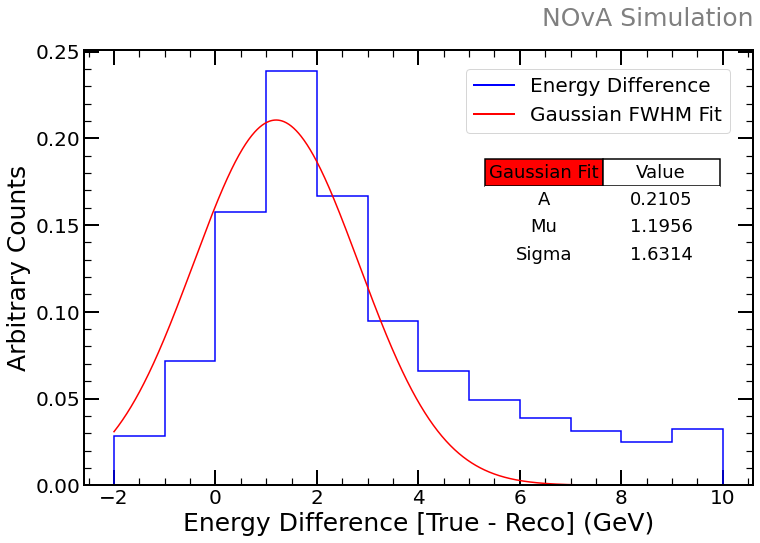

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit



# diffEshift = [x - y for x, y in zip(epiNTshift, epiReco)]

bin_size = 1
# Histogram data
hist, bin_edges = np.histogram(diffprimprongs, bins=np.arange(-2, 11, bin_size) , density=True)

# Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Find the bin with the maximum value of the histogram
max_bin_index = np.argmax(hist)
max_bin_center = 0.5 * (bin_edges[max_bin_index] + bin_edges[max_bin_index + 1])

# Calculate half of the maximum value
half_max = hist[max_bin_index] / 2

# Find the bins where the histogram value falls to half of the maximum
left_index = np.where(hist[:max_bin_index] < half_max)[0][-1]
right_index = np.where(hist[max_bin_index:] < half_max)[0][0] + max_bin_index

# Calculate the FWHM
fwhm = bin_edges[right_index] - bin_edges[left_index]

# Define the limits for Gaussian fitting
fit_range = (bin_edges[left_index], bin_edges[right_index])

# Fit the Gaussian function
popt, pcov = curve_fit(gaussian, bin_edges[:-1], hist, p0=[np.max(hist), max_bin_center, fwhm / 2], bounds=([0, -np.inf, 0], [np.inf, np.inf, np.inf]), method='trf')

# Prepare the table with the fitting results
fit_results = [
    ['A', f'{popt[0]:.4f}'],
    ['Mu', f'{popt[1]:.4f}'],
    ['Sigma', f'{popt[2]:.4f}'],
]

# Plot the histogram and the Gaussian fit
plt.figure(figsize=(12, 8))

# Plot the histogram
plt.hist(diffprimprongs, bins=bin_edges, edgecolor='blue', linewidth=1.5, histtype='step', density=True, label='Energy Difference')

# Plot the Gaussian fit
x_fit = np.linspace(bin_edges[0], bin_edges[-1], 1000)
plt.plot(x_fit, gaussian(x_fit, *popt), color='red', label='Gaussian Fit', linewidth=1.5)

# Present the table within the plot
table = plt.table(cellText=fit_results, colLabels=["Gaussian Fit", "Value"], loc='upper right', cellLoc='center', colColours=['red', 'white'], bbox=[0.6, 0.5, 0.35, 0.25])
table.auto_set_font_size(False)
table.set_fontsize(18)
table.scale(1.2, 1.2)

# Remove internal lines and keep outer lines
for key, cell in table.get_celld().items():
    cell.set_linewidth(0)  # Remove internal lines
    if key[0] == 0 or key[1] == -1:
        cell.set_linewidth(1.5)  # Keep outer lines

plt.xlabel('Energy Difference [True - Reco] (GeV)', fontsize=25)
plt.ylabel('Arbitrary Counts', fontsize=25)
plt.legend(fontsize=15)
# plt.xlim(-1, 1)

# Set the number of ticks on the axes
# plt.locator_params(axis='y', nbins=4)
# plt.locator_params(axis='x', nbins=6)
set_plot_style()
labels=['Energy Difference','Gaussian FWHM Fit']
handles = [Line2D([0], [0], color='blue', lw=2), Line2D([0], [0], color='red', lw=2)]
plt.legend(handles=handles, labels=labels, fontsize=20, loc='upper right', bbox_to_anchor=(0.98, 0.98))
# Save the plot
# plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/Diff_Energy_gaussian_FWHM_fit_with_table2_total.png', bbox_inches='tight')
plt.show()

In [38]:
folders=['Res','DIS','QE','MEC']
temp=[]
single=0
count=0
#store the list of NT original numpi
#store the list of Reco numpi
for folder in folders:
    temp=read_file2(folder, 'energiesvarsNT_total')
    for event in temp:
        count=count+1
        if len(event)==1:
            single=single+1
        
percentage=single*100/count
print(f'percentage of single events in total {percentage:.2f}%')
print(single)
print(count)

percentage of single events in total 75.95%
779766
1026703


In [3]:
#plot the comparison between energies for the part 1 reconstructed simulated and the gaussian fit
folders=['Res','DIS','QE','MEC']

epiNTshift = []
epiReco = []
#store the list of NT original numpi
#store the list of Reco numpi
for folder in folders:
    temp=read_file(folder, 'analysisfiles/energiesNT_part1')
    epiNTshift.extend([float(element)-0.139 for sublist in temp for element in sublist])
    temp2=read_file(folder, 'analysisfiles/calenergies_part1')
    epiReco.extend([float(element) for sublist in temp2 for element in sublist])

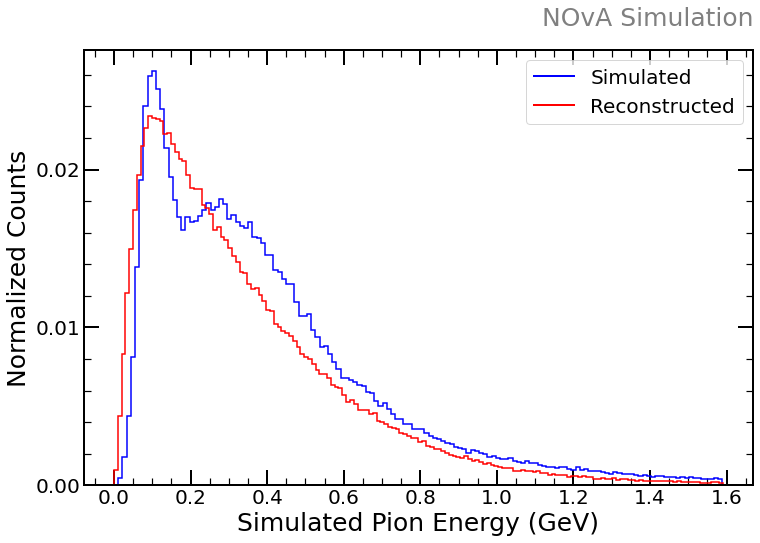

In [29]:
#COMPARISON NT AND RECO ENERGY WITHOUT MASS
# Define histogram parameters
#bin_size = 0.025
#bin_edges = np.arange(0, 1.6, bin_size) 

#normalize
weights = np.ones_like(epiNTshift) / len(epiNTshift)
weights2 = np.ones_like(epiReco) / len(epiReco)
# Calculate histograms
# hist_nt, _ = np.histogram(epiNTshift, bins=autobins(epiNTshift,0,1.6), density=True)
# hist_reco, _ = np.histogram(epiReco, bins=autobins(epiReco,0,1.6), density=True)

# Plot both normalized histograms on the same plot
plt.figure(figsize=(12,8)) 

# Plot truth energy histogram
plt.hist(epiNTshift, bins=autobins(epiNTshift,0,1.6), edgecolor='blue', linewidth=1.5, histtype='step', label='True Energy', weights=weights)

# Plot reco energy histogram
plt.hist(epiReco, bins=autobins(epiReco,0,1.6), edgecolor='red', linewidth=1.5, histtype='step', label='Reco Energy', weights=weights2)

plt.xlabel('Simulated Pion Energy (GeV)', fontsize=25)
plt.ylabel('Normalized Counts', fontsize=25)
#plt.title('Comparison between True and Reco pion energy', fontsize=30)
plt.legend(fontsize=20)

set_plot_style(['Simulated', 'Reconstructed'])

#change the number of ticks in the y axis
plt.locator_params(axis='y', nbins=4)


# plt.savefig(f"{folder}/images/energy_shifted_comparison_histogram_part1_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/energy_shifted_comparison_histogram_part1_total.png', bbox_inches='tight')
plt.show()

In [45]:
#check the percentages distributions above and below the valley here

def calculate_percentages(data, thresholds):
    percentages = {}
    total = len(data)
    for threshold in thresholds:
        below_threshold = np.sum(np.array(data) < threshold)
        above_threshold = np.sum(np.array(data) >= threshold)
        percentages[threshold] = {
            'below': (below_threshold / total) * 100,
            'above': (above_threshold / total) * 100
        }
    return percentages


thresholds = [0.18,0.122]  # Define your own thresholds
percentages1 = calculate_percentages(epiNTshift, thresholds)
len1=len(epiNTshift)
for threshold, perc in percentages1.items():
    below_t1=(percentages1[threshold]['below']/100)*len1
    print(f'Threshold {threshold}: Below {perc["below"]:.2f}%, {below_t1}, Above {perc["above"]:.2f}%, {len1-below_t1}')
    

percentages2 = calculate_percentages(epiReco, thresholds)
len2=len(epiReco)
for threshold, perc in percentages2.items():
    below_t2=(percentages2[threshold]['below']/100)*len2
    print(f'Threshold {threshold}: Below {perc["below"]:.2f}%, {below_t2}, Above {perc["above"]:.2f}%, {len2-below_t2}')

Threshold 0.18: Below 25.58%, 78361.0, Above 74.42%, 227973.0
Threshold 0.122: Below 15.25%, 46701.0, Above 84.75%, 259633.0
Threshold 0.18: Below 32.52%, 99629.0, Above 67.48%, 206705.0
Threshold 0.122: Below 19.81%, 60696.99999999999, Above 80.19%, 245637.0


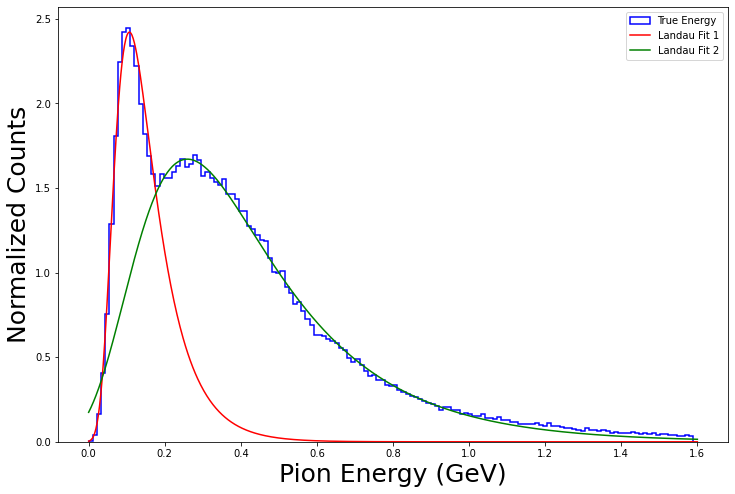

Landau Fit 1 - Most Probable Value (MPV): 0.10720399658295802, Normalization Constant (eta): 0.15121521118872625, Scale Parameter (sigma): 0.03789327728122751
Landau Fit 2 - Most Probable Value (MPV): 0.2594167759020497, Normalization Constant (eta): 0.35354908915204225, Scale Parameter (sigma): 0.12839544868850059


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


#APPLY TWO LANDAUS


# Assuming epiNTshift2 is already defined with your data

def landau(x, mpv, eta, sigma):
    # Landau distribution implementation
    return (eta / sigma) * np.exp(-((x - mpv) / sigma + np.exp(-(x - mpv) / sigma)) / 2)


# Define the ranges for the Landau fits
fit1_min = 0
fit1_max = 0.2
fit2_min = 0.3
fit2_max = 1.6

# Plot histogram
plt.figure(figsize=(12, 8))
bins = autobins(epiNTshift, 0, 1.6)
counts, bin_edges, _ = plt.hist(epiNTshift, bins=bins, edgecolor='blue', linewidth=1.5, histtype='step', label='True Energy', density=True)

# Get bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Select the ranges for fitting
mask1 = (bin_centers >= fit1_min) & (bin_centers <= fit1_max)
fit_bin_centers1 = bin_centers[mask1]
fit_counts1 = counts[mask1]

mask2 = (bin_centers >= fit2_min) & (bin_centers <= fit2_max)
fit_bin_centers2 = bin_centers[mask2]
fit_counts2 = counts[mask2]

# Fit Landau to the first selected section of the histogram
popt1, _ = curve_fit(landau, fit_bin_centers1, fit_counts1, p0=[(fit1_min + fit1_max) / 2, 1, 0.1])

# Fit Landau to the second selected section of the histogram
popt2, _ = curve_fit(landau, fit_bin_centers2, fit_counts2, p0=[(fit2_min + fit2_max) / 2, 1, 0.1])

# Plot Landau fits
x = np.linspace(0, 1.6, 1000)
plt.plot(x, landau(x, *popt1), 'r-', label='Landau Fit 1')
plt.plot(x, landau(x, *popt2), 'g-', label='Landau Fit 2')

plt.xlabel('Pion Energy (GeV)', fontsize=25)
plt.ylabel('Normalized Counts', fontsize=25)
plt.legend()
plt.show()

# Print Landau parameters
mpv1, eta1, sigma1 = popt1
mpv2, eta2, sigma2 = popt2
print(f"Landau Fit 1 - Most Probable Value (MPV): {mpv1}, Normalization Constant (eta): {eta1}, Scale Parameter (sigma): {sigma1}")
print(f"Landau Fit 2 - Most Probable Value (MPV): {mpv2}, Normalization Constant (eta): {eta2}, Scale Parameter (sigma): {sigma2}")


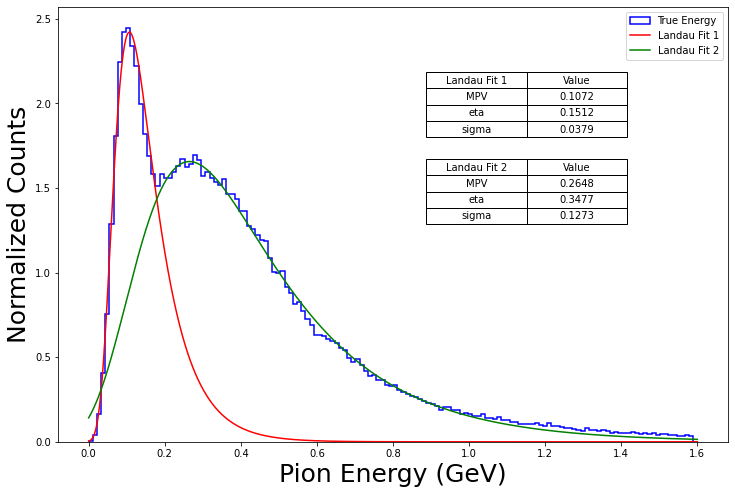

Landau Fit 1 - Most Probable Value (MPV): 0.10720399658295802, Normalization Constant (eta): 0.15121521118872625, Scale Parameter (sigma): 0.03789327728122751
Landau Fit 2 - Most Probable Value (MPV): 0.26482276299269875, Normalization Constant (eta): 0.34765117105420107, Scale Parameter (sigma): 0.12734237386274735


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Landau distribution function
def landau(x, mpv, eta, sigma):
    return (eta / sigma) * np.exp(-((x - mpv) / sigma + np.exp(-(x - mpv) / sigma)) / 2)


# Define the ranges for the Landau fits
fit1_min = 0
fit1_max = 0.2
fit2_min = 0.2
fit2_max = 1.6


# Plot histogram
plt.figure(figsize=(12, 8))
bins = autobins(epiNTshift, 0, 1.6)
counts, bin_edges, _ = plt.hist(epiNTshift, bins=bins, edgecolor='blue', linewidth=1.5, histtype='step', label='True Energy', density=True)

# Get bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Select the ranges for fitting
mask1 = (bin_centers >= fit1_min) & (bin_centers <= fit1_max)
fit_bin_centers1 = bin_centers[mask1]
fit_counts1 = counts[mask1]

mask2 = (bin_centers >= fit2_min) & (bin_centers <= fit2_max)
fit_bin_centers2 = bin_centers[mask2]
fit_counts2 = counts[mask2]

# Fit Landau to the first selected section of the histogram
popt1, _ = curve_fit(landau, fit_bin_centers1, fit_counts1, p0=[(fit1_min + fit1_max) / 2, 1, 0.1])

# Fit Landau to the second selected section of the histogram
popt2, _ = curve_fit(landau, fit_bin_centers2, fit_counts2, p0=[(fit2_min + fit2_max) / 2, 1, 0.1])

# Plot Landau fits
x = np.linspace(0, 1.6, 1000)
plt.plot(x, landau(x, *popt1), 'r-', label='Landau Fit 1')
plt.plot(x, landau(x, *popt2), 'g-', label='Landau Fit 2')

# Add tables with Landau parameters
table_data1 = [
    ["MPV", f"{popt1[0]:.4f}"],
    ["eta", f"{popt1[1]:.4f}"],
    ["sigma", f"{popt1[2]:.4f}"]
]

table_data2 = [
    ["MPV", f"{popt2[0]:.4f}"],
    ["eta", f"{popt2[1]:.4f}"],
    ["sigma", f"{popt2[2]:.4f}"]
]

# Plot table for the first fit
plt.table(cellText=table_data1, colLabels=["Landau Fit 1", "Value"], loc="upper left", cellLoc="center", bbox=[0.55, 0.7, 0.3, 0.15])

# Plot table for the second fit
plt.table(cellText=table_data2, colLabels=["Landau Fit 2", "Value"], loc="upper right", cellLoc="center", bbox=[0.55, 0.5, 0.3, 0.15])

plt.xlabel('Pion Energy (GeV)', fontsize=25)
plt.ylabel('Normalized Counts', fontsize=25)
plt.legend()
plt.show()

# Print Landau parameters
mpv1, eta1, sigma1 = popt1
mpv2, eta2, sigma2 = popt2
print(f"Landau Fit 1 - Most Probable Value (MPV): {mpv1}, Normalization Constant (eta): {eta1}, Scale Parameter (sigma): {sigma1}")
print(f"Landau Fit 2 - Most Probable Value (MPV): {mpv2}, Normalization Constant (eta): {eta2}, Scale Parameter (sigma): {sigma2}")


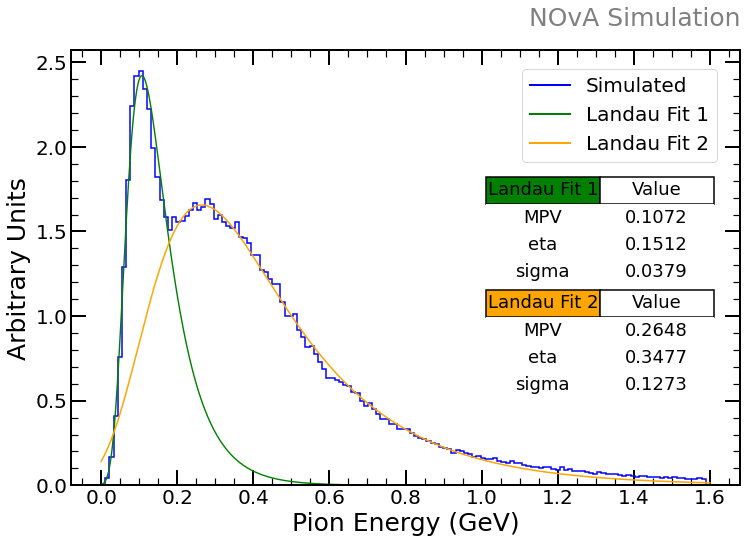

Landau Fit 1 - Most Probable Value (MPV): 0.10720399658295802, Normalization Constant (eta): 0.15121521118872625, Scale Parameter (sigma): 0.03789327728122751
Landau Fit 2 - Most Probable Value (MPV): 0.26482276299269875, Normalization Constant (eta): 0.34765117105420107, Scale Parameter (sigma): 0.12734237386274735


In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.patches as mpatches

# Define Landau distribution function
def landau(x, mpv, eta, sigma):
    return (eta / sigma) * np.exp(-((x - mpv) / sigma + np.exp(-(x - mpv) / sigma)) / 2)


# Define the ranges for the Landau fits
fit1_min = 0
fit1_max = 0.2
fit2_min = 0.2
fit2_max = 1.6

# Plot histogram
plt.figure(figsize=(12, 8))
bins = autobins(epiNTshift, 0, 1.6)
counts, bin_edges, _ = plt.hist(epiNTshift, bins=bins, edgecolor='blue', linewidth=1.5, histtype='step', label='True Energy', density=True)

# Get bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Select the ranges for fitting
mask1 = (bin_centers >= fit1_min) & (bin_centers <= fit1_max)
fit_bin_centers1 = bin_centers[mask1]
fit_counts1 = counts[mask1]

mask2 = (bin_centers >= fit2_min) & (bin_centers <= fit2_max)
fit_bin_centers2 = bin_centers[mask2]
fit_counts2 = counts[mask2]

# Fit Landau to the first selected section of the histogram
popt1, _ = curve_fit(landau, fit_bin_centers1, fit_counts1, p0=[(fit1_min + fit1_max) / 2, 1, 0.1])

# Fit Landau to the second selected section of the histogram
popt2, _ = curve_fit(landau, fit_bin_centers2, fit_counts2, p0=[(fit2_min + fit2_max) / 2, 1, 0.1])

# Plot Landau fits
x = np.linspace(0, 1.6, 1000)
plt.plot(x, landau(x, *popt1), 'g-', linewidth=1.4,label='Landau Fit 1')
plt.plot(x, landau(x, *popt2), color='orange', label='Landau Fit 2')

# Add tables with Landau parameters
table_data1 = [
    ["MPV", f"{popt1[0]:.4f}"],
    ["eta", f"{popt1[1]:.4f}"],
    ["sigma", f"{popt1[2]:.4f}"]
]

table_data2 = [
    ["MPV", f"{popt2[0]:.4f}"],
    ["eta", f"{popt2[1]:.4f}"],
    ["sigma", f"{popt2[2]:.4f}"]
]

# Plot table for the first fit
table1 = plt.table(cellText=table_data1, colLabels=["Landau Fit 1", "Value"], loc="upper left", cellLoc="center", bbox=[0.62, 0.46, 0.34, 0.25], colColours=["green", "white"])
table1.auto_set_font_size(False)
table1.set_fontsize(18)
for key, cell in table1.get_celld().items():
    cell.set_linewidth(0)  # Remove internal lines
    if key[0] == 0 or key[1] == -1:
        cell.set_linewidth(1.5)  # Keep outer lines

# Plot table for the second fit
table2 = plt.table(cellText=table_data2, colLabels=["Landau Fit 2", "Value"], loc="upper right", cellLoc="center", bbox=[0.62, 0.2, 0.34, 0.25], colColours=["orange", "white"])
table2.auto_set_font_size(False)
table2.set_fontsize(18)
for key, cell in table2.get_celld().items():
    cell.set_linewidth(0)  # Remove internal lines
    if key[0] == 0 or key[1] == -1:
        cell.set_linewidth(1.5)  # Keep outer lines

plt.xlabel('Pion Energy (GeV)', fontsize=25)
plt.ylabel('Arbitrary Units', fontsize=25)
set_plot_style()
labels=['Simulated','Landau Fit 1','Landau Fit 2']
handles = [Line2D([0], [0], color='blue', lw=2), Line2D([0], [0], color='green', lw=2), Line2D([0], [0], color='orange', lw=2)]
plt.legend(handles=handles, labels=labels, fontsize=20, loc='upper right', bbox_to_anchor=(0.98, 0.98))
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/energy_shifted_simulated_with_landau_part1_total.png', bbox_inches='tight')
plt.show()

# Print Landau parameters
mpv1, eta1, sigma1 = popt1
mpv2, eta2, sigma2 = popt2
print(f"Landau Fit 1 - Most Probable Value (MPV): {mpv1}, Normalization Constant (eta): {eta1}, Scale Parameter (sigma): {sigma1}")
print(f"Landau Fit 2 - Most Probable Value (MPV): {mpv2}, Normalization Constant (eta): {eta2}, Scale Parameter (sigma): {sigma2}")


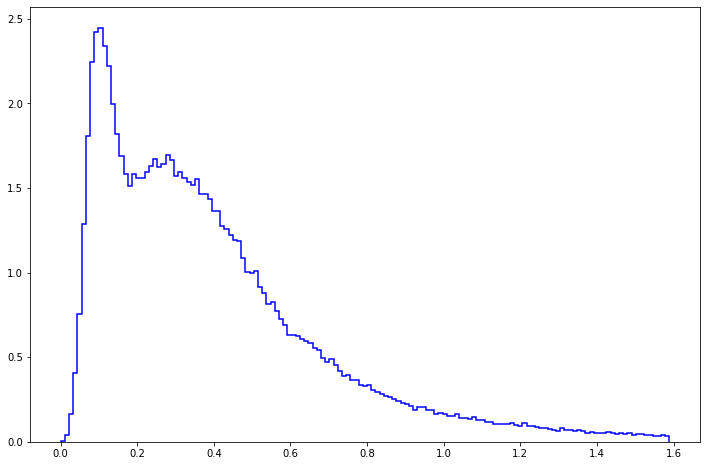

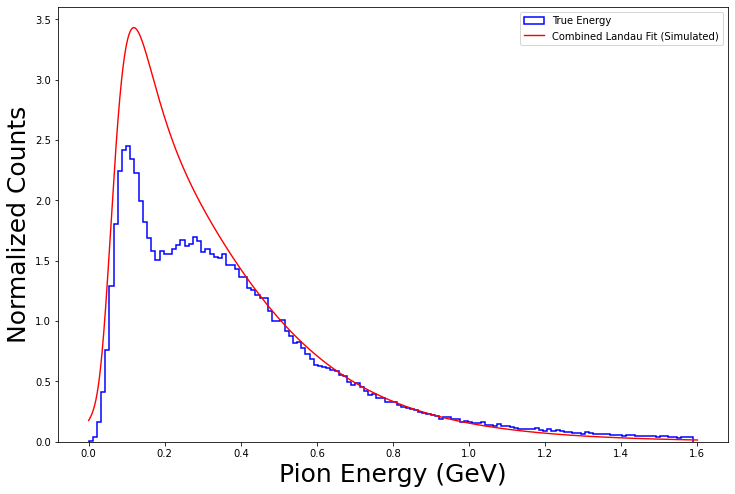

Combined Landau Fit - MPV: 0.2429, Normalization Constant (eta): 0.5042, Scale Parameter (sigma): 0.0833
Combined Landau Fit Parameters (Simulated):
  Landau Fit 1 - MPV: 0.1072, eta: 0.1512, sigma: 0.0379
  Landau Fit 2 - MPV: 0.2600, eta: 0.3530, sigma: 0.1287
Landau Fit (Reconstructed) - MPV: 0.1607, eta: 0.3999, sigma: 0.1109


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf

# Define Landau distribution function
def landau(x, mpv, eta, sigma):
    return (eta / sigma) * np.exp(-((x - mpv) / sigma + np.exp(-(x - mpv) / sigma)) / 2)

# Define a combined Landau distribution function
def combined_landau(x, mpv1, eta1, sigma1, mpv2, eta2, sigma2):
    return landau(x, mpv1, eta1, sigma1) + landau(x, mpv2, eta2, sigma2)

# Reconstructed Landau fit parameters
reconstructed_mpv, reconstructed_eta, reconstructed_sigma = 0.16068366274132115, 0.39993422513866367, 0.11089984276155854

# Define the ranges for the Landau fits
fit1_min = 0
fit1_max = 0.2
fit2_min = 0.18
fit2_max = 1.6

# Plot histogram
plt.figure(figsize=(12, 8))
bins = autobins(epiNTshift, 0, 1.6)
counts, bin_edges, _ = plt.hist(epiNTshift, bins=bins, edgecolor='blue', linewidth=1.5, histtype='step', label='True Energy', density=True)

# Get bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Select the ranges for fitting
mask1 = (bin_centers >= fit1_min) & (bin_centers <= fit1_max)
fit_bin_centers1 = bin_centers[mask1]
fit_counts1 = counts[mask1]

mask2 = (bin_centers >= fit2_min) & (bin_centers <= fit2_max)
fit_bin_centers2 = bin_centers[mask2]
fit_counts2 = counts[mask2]

# Fit Landau to the first selected section of the histogram
popt1, _ = curve_fit(landau, fit_bin_centers1, fit_counts1, p0=[(fit1_min + fit1_max) / 2, 1, 0.1])

# Fit Landau to the second selected section of the histogram
popt2, _ = curve_fit(landau, fit_bin_centers2, fit_counts2, p0=[(fit2_min + fit2_max) / 2, 1, 0.1])

# Combined Landau fit parameters
mpv1, eta1, sigma1 = popt1
mpv2, eta2, sigma2 = popt2

# Plot combined Landau fit
x = np.linspace(0, 1.6, 1000)
combined_fit = combined_landau(x, mpv1, eta1, sigma1, mpv2, eta2, sigma2)
reconstructed_fit = landau(x, reconstructed_mpv, reconstructed_eta, reconstructed_sigma)


# Print combined Landau parameters
# print(f"Combined Landau Fit Parameters:")
# print(f"  Landau Fit 1 - MPV: {mpv1_combined:.4f}, eta: {eta1_combined:.4f}, sigma: {sigma1_combined:.4f}")
# print(f"  Landau Fit 2 - MPV: {mpv2_combined:.4f}, eta: {eta2_combined:.4f}, sigma: {sigma2_combined:.4f}")

plt.figure(figsize=(12, 8))
plt.hist(epiNTshift, bins=bins, edgecolor='blue', linewidth=1.5, histtype='step', label='True Energy', density=True)
plt.plot(x, combined_fit, 'r-', linewidth=1.4, label='Combined Landau Fit (Simulated)')
# plt.plot(x, reconstructed_fit, 'r-', linewidth=1.4, label='Landau Fit (Reconstructed)')
plt.xlabel('Pion Energy (GeV)', fontsize=25)
plt.ylabel('Normalized Counts', fontsize=25)
plt.legend()
plt.show()

# Calculate and print combined Landau fit parameters
combined_mpv = (mpv1 * eta1 * sigma1 + mpv2 * eta2 * sigma2) / (eta1 * sigma1 + eta2 * sigma2)
combined_eta = eta1 + eta2
combined_sigma = (sigma1 + sigma2) / 2  # Averaging the sigmas as an approximation

print(f"Combined Landau Fit - MPV: {combined_mpv:.4f}, Normalization Constant (eta): {combined_eta:.4f}, Scale Parameter (sigma): {combined_sigma:.4f}")


# Print combined Landau parameters
print(f"Combined Landau Fit Parameters (Simulated):")
print(f"  Landau Fit 1 - MPV: {mpv1:.4f}, eta: {eta1:.4f}, sigma: {sigma1:.4f}")
print(f"  Landau Fit 2 - MPV: {mpv2:.4f}, eta: {eta2:.4f}, sigma: {sigma2:.4f}")

# Print reconstructed Landau parameters
print(f"Landau Fit (Reconstructed) - MPV: {reconstructed_mpv:.4f}, eta: {reconstructed_eta:.4f}, sigma: {reconstructed_sigma:.4f}")


In [156]:
# E# Calculate combined parameters (simple average for demonstration)
combined_mpv = (mpv1 + mpv2) / 2
combined_eta = (eta1 + eta2) / 2
combined_sigma = (sigma1 + sigma2) / 2

# Print combined Landau parameters
print("Combined Landau Fit Parameters (Simulated):")
print(f"  MPV: {combined_mpv:.4f}, eta: {combined_eta:.4f}, sigma: {combined_sigma:.4f}")

Combined Landau Fit Parameters (Simulated):
  MPV: 0.1860, eta: 0.2494, sigma: 0.0826


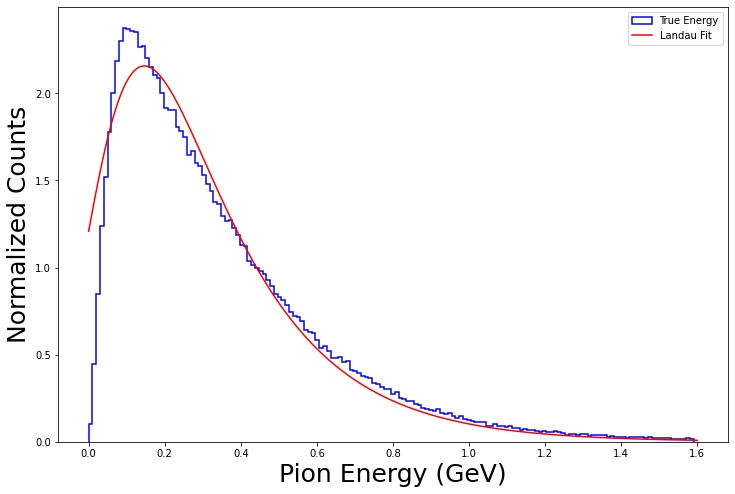

Most Probable Value (MPV): 0.14635703540037592
Normalization Constant (eta): 0.4279815681646935
Scale Parameter (sigma): 0.12031545487377927


In [145]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import gammaincc

# Assuming epiNTshift2 is already defined with your data

def landau(x, mpv, eta, sigma):
    # Landau distribution implementation
    # mpv: most probable value
    # eta: normalization constant
    # sigma: scale parameter
    return (eta / sigma) * np.exp(-((x - mpv) / sigma + np.exp(-(x - mpv) / sigma)) / 2)


# Define the range for the Landau fit
fit_min = 0.02
fit_max = 1.6

# Plot histogram
plt.figure(figsize=(12, 8))
bins = autobins(epiReco, 0, 1.6)
counts, bin_edges, _ = plt.hist(epiReco, bins=bins, edgecolor='blue', linewidth=1.5, histtype='step', label='True Energy', density=True)

# Get bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Select the range for fitting
mask = (bin_centers >= fit_min) & (bin_centers <= fit_max)
fit_bin_centers = bin_centers[mask]
fit_counts = counts[mask]

# Fit Landau to the selected section of the histogram
popt, _ = curve_fit(landau, fit_bin_centers, fit_counts, p0=[(fit_min + fit_max) / 2, 1, 0.1])

# Plot Landau fit
x = np.linspace(0, 1.6, 1000)
plt.plot(x, landau(x, *popt), 'r-', label='Landau Fit')

plt.xlabel('Pion Energy (GeV)', fontsize=25)
plt.ylabel('Normalized Counts', fontsize=25)
plt.legend()
plt.show()

# Print Landau parameters
mpv, eta, sigma = popt
print(f"Most Probable Value (MPV): {mpv}")
print(f"Normalization Constant (eta): {eta}")
print(f"Scale Parameter (sigma): {sigma}")


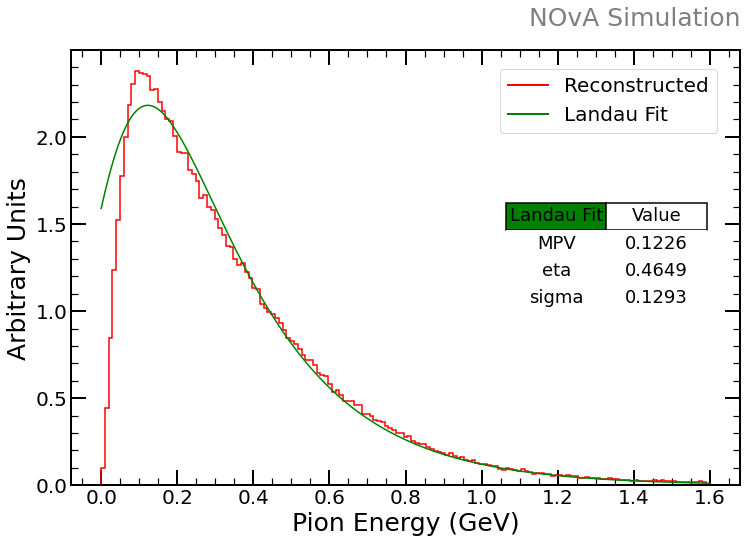

Most Probable Value (MPV): 0.12261756612580153
Normalization Constant (eta): 0.46491044900369405
Scale Parameter (sigma): 0.12928003683096512


In [149]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import gammaincc

# Define Landau distribution function
def landau(x, mpv, eta, sigma):
    return (eta / sigma) * np.exp(-((x - mpv) / sigma + np.exp(-(x - mpv) / sigma)) / 2)


# Define the range for the Landau fit
fit_min = 0.04
fit_max = 1.6


# Plot histogram
plt.figure(figsize=(12, 8))
bins = autobins(epiReco, 0, 1.6)
counts, bin_edges, _ = plt.hist(epiReco, bins=bins, edgecolor='red', linewidth=1.5, histtype='step', label='Reconstructed Energy', density=True)

# Get bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Select the range for fitting
mask = (bin_centers >= fit_min) & (bin_centers <= fit_max)
fit_bin_centers = bin_centers[mask]
fit_counts = counts[mask]

# Fit Landau to the selected section of the histogram
popt, _ = curve_fit(landau, fit_bin_centers, fit_counts, p0=[(fit_min + fit_max) / 2, 1, 0.1])

# Plot Landau fit
x = np.linspace(0, 1.6, 1000)
plt.plot(x, landau(x, *popt), 'g-', label='Landau Fit')

# Add table with Landau parameters
table_data = [
    ["MPV", f"{popt[0]:.4f}"],
    ["eta", f"{popt[1]:.4f}"],
    ["sigma", f"{popt[2]:.4f}"]
]

# Plot table for the fit
table = plt.table(cellText=table_data, colLabels=["Landau Fit", "Value"], loc="upper right", cellLoc="center", bbox=[0.65, 0.4, 0.3, 0.25], colColours=["green", "white"])
table.auto_set_font_size(False)
table.set_fontsize(18)
for key, cell in table.get_celld().items():
    cell.set_linewidth(0)  # Remove internal lines
    if key[0] == 0 or key[1] == -1:
        cell.set_linewidth(1.5)  # Keep outer lines

plt.xlabel('Pion Energy (GeV)', fontsize=25)
plt.ylabel('Arbitrary Units', fontsize=25)
# plt.legend(fontsize=20,loc='upper right', bbox_to_anchor=(0.55, 0.95))
set_plot_style()
labels=['Reconstructed','Landau Fit']
handles = [Line2D([0], [0], color='red', lw=2), Line2D([0], [0], color='green', lw=2)]
plt.legend(handles=handles, labels=labels, fontsize=20, loc='upper right', bbox_to_anchor=(0.98, 0.98))
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/energy_shifted_reco_with_landau_part1_total.png', bbox_inches='tight')
plt.show()

# Print Landau parameters
mpv, eta, sigma = popt
print(f"Most Probable Value (MPV): {mpv}")
print(f"Normalization Constant (eta): {eta}")
print(f"Scale Parameter (sigma): {sigma}")


In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming epiNTshift2 (simulated) and reconstructed (reconstructed) are defined

# Calculate histogram areas
bins_sim = autobins(epiNTshift, 0, 1.6)
counts_sim, _ = np.histogram(epiNTshift, bins=bins_sim, density=True)
area_sim = np.sum(counts_sim * np.diff(bins_sim))
print(area_sim)

bins_rec = autobins(epiReco, 0, 1.6)
counts_rec, _ = np.histogram(epiReco, bins=bins_rec, density=True)
area_rec = np.sum(counts_rec * np.diff(bins_rec))
print(area_rec)
# Calculate percentage
percentage_area = (area_rec / area_sim) * 100

print(f"Percentage of the reconstructed histogram area in function of the simulated histogram area: {percentage_area:.2f}%")


1.0
1.0
Percentage of the reconstructed histogram area in function of the simulated histogram area: 100.00%


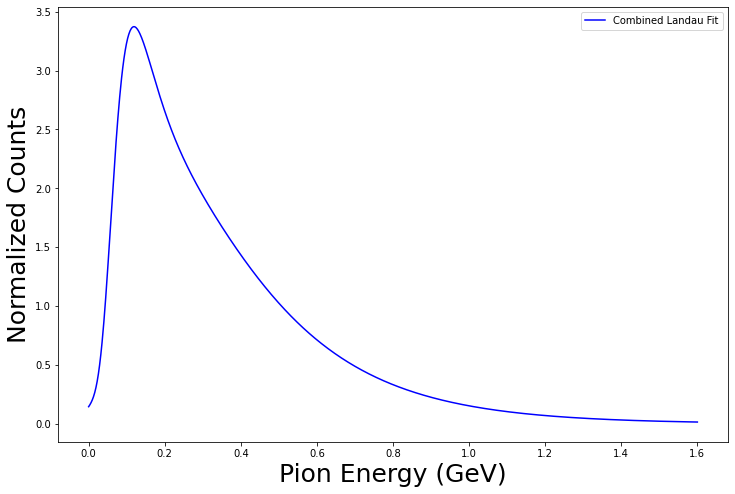

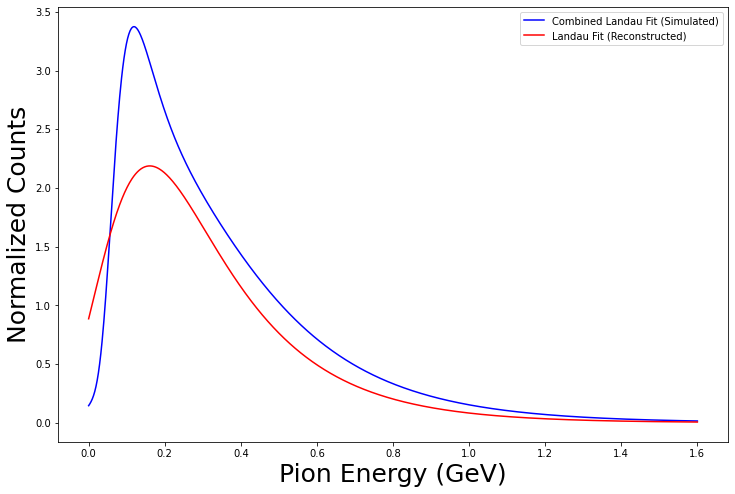

In [152]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Landau distribution function
def landau(x, mpv, eta, sigma):
    return (eta / sigma) * np.exp(-((x - mpv) / sigma + np.exp(-(x - mpv) / sigma)) / 2)

# Combined Landau fit from simulated data
def combined_landau(x, mpv1, eta1, sigma1, mpv2, eta2, sigma2):
    return landau(x, mpv1, eta1, sigma1) + landau(x, mpv2, eta2, sigma2)

# Parameters from the fits
mpv1, eta1, sigma1 = 0.10720399658295802, 0.15121521118872625, 0.03789327728122751
mpv2, eta2, sigma2 = 0.26482276299269875, 0.34765117105420107, 0.12734237386274735

# Plot combined Landau fit
x = np.linspace(0, 1.6, 1000)
combined_fit = combined_landau(x, mpv1, eta1, sigma1, mpv2, eta2, sigma2)

plt.figure(figsize=(12, 8))
plt.plot(x, combined_fit, 'b-', label='Combined Landau Fit')
plt.xlabel('Pion Energy (GeV)', fontsize=25)
plt.ylabel('Normalized Counts', fontsize=25)
plt.legend()
plt.show()

# Compare to reconstructed data fit
reconstructed_mpv, reconstructed_eta, reconstructed_sigma = 0.16068366274132115, 0.39993422513866367, 0.11089984276155854
reconstructed_fit = landau(x, reconstructed_mpv, reconstructed_eta, reconstructed_sigma)

plt.figure(figsize=(12, 8))
plt.plot(x, combined_fit, 'b-', label='Combined Landau Fit (Simulated)')
plt.plot(x, reconstructed_fit, 'r-', label='Landau Fit (Reconstructed)')
plt.xlabel('Pion Energy (GeV)', fontsize=25)
plt.ylabel('Normalized Counts', fontsize=25)
plt.legend()
plt.show()


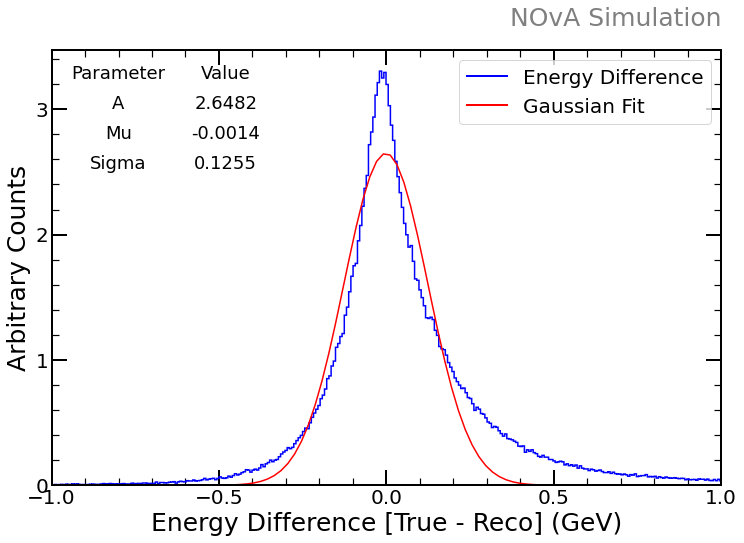

In [13]:
from scipy.optimize import curve_fit
from tabulate import tabulate

diffEshift = [x - y for x, y in zip(epiNTshift, epiReco)]

# Histogram data (for example)
hist, bin_edges = np.histogram(diffEshift, bins=autobins(diffEshift), density=True)

# Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-0.5 * ((x - mu) / sigma)**2)

# Find the bin with the maximum value of the histogram
max_bin_index = np.argmax(hist)
max_bin_center = 0.5 * (bin_edges[max_bin_index] + bin_edges[max_bin_index + 1])

# Calculate half of the maximum value
half_max = hist[max_bin_index] / 2

# Find the bins where the histogram value falls to half of the maximum
left_index = np.where(hist[:max_bin_index] < half_max)[0][-1]
right_index = np.where(hist[max_bin_index:] < half_max)[0][0] + max_bin_index

# Calculate the FWHM
fwhm = bin_edges[right_index] - bin_edges[left_index]

# Define the limits for Gaussian fitting
fit_range = (bin_edges[left_index], bin_edges[right_index])

# Fit the Gaussian function
popt, pcov = curve_fit(gaussian, bin_edges[:-1], hist, p0=[np.max(hist), max_bin_center, fwhm/2], bounds=([0, -np.inf, 0], [np.inf, np.inf, np.inf]), method='trf')

# Prepare the table with the fitting results
fit_results = [
    ['Parameter', 'Value'],
    ['A', f'{popt[0]:.4f}'],
    ['Mu', f'{popt[1]:.4f}'],
    ['Sigma', f'{popt[2]:.4f}'],
]

# Plot the histogram and the Gaussian fit
plt.figure(figsize=(12,8)) 

# Plot the histogram
plt.hist(diffEshift, bins=bin_edges, edgecolor='blue', linewidth=1.5, histtype='step', density=True, label='Energy Difference')

# Plot the Gaussian fit
x_fit = np.linspace(bin_edges[0], bin_edges[-1], 1000)
plt.plot(x_fit, gaussian(x_fit, *popt), color='red', label='Gaussian Fit', linewidth=1.5)

# Present the table within the plot, with reduced padding and moved to the middle-right section
table = plt.table(cellText=fit_results, loc='upper left', edges='open', colWidths=[0.4, 0.4])
table.auto_set_font_size(False)
table.set_fontsize(18)
table.scale(0.4, 2.5)

# Justify the content within the table cells
for i in range(len(fit_results)):
    for j in range(len(fit_results[0])):
        table[(i, j)].get_text().set_ha('center')  # horizontal alignment
        table[(i, j)].get_text().set_va('center')  # vertical alignment

# Set grid to the table
for _, cell in table._cells.items():
    cell.set_linewidth(0.05)
    cell.set_edgecolor('black')

plt.xlabel('Energy Difference [True - Reco] (GeV)', fontsize=25)
plt.ylabel('Arbitrary Counts', fontsize=25)
#plt.title('Gaussian fit (FWHM) ', fontsize=30)
plt.legend(fontsize=15)
plt.xlim(-1,1)

set_plot_style(['Energy Difference','Gaussian Fit'])

#change the number of ticks in the y axis
plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=6)




# plt.savefig(f"{folder}/images/Diff_Energy_gaussian_FWHM_fit_with_table_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/Diff_Energy_gaussian_FWHM_fit_with_table_total.png', bbox_inches='tight')
plt.show()

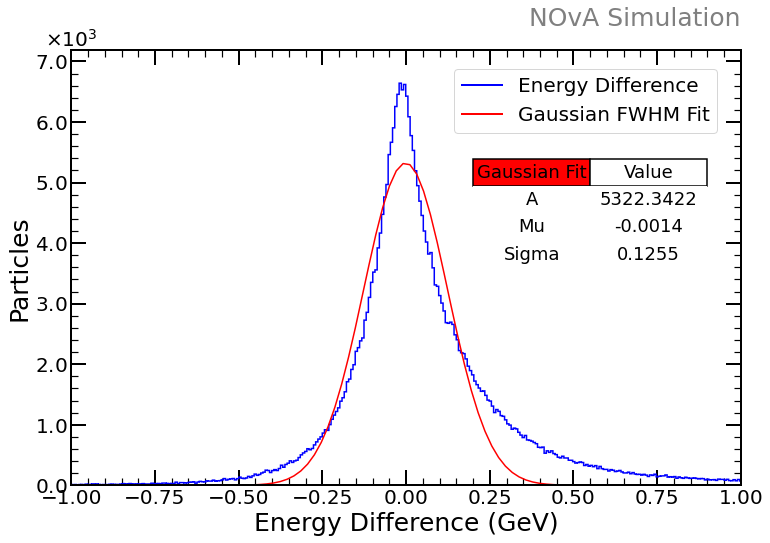

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit



diffEshift = [x - y for x, y in zip(epiNTshift, epiReco)]
weights = np.ones_like(diffEshift) / len(diffEshift)
# Histogram data
hist, bin_edges = np.histogram(diffEshift, bins=autobins(diffEshift))

# Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Find the bin with the maximum value of the histogram
max_bin_index = np.argmax(hist)
max_bin_center = 0.5 * (bin_edges[max_bin_index] + bin_edges[max_bin_index + 1])

# Calculate half of the maximum value
half_max = hist[max_bin_index] / 2

# Find the bins where the histogram value falls to half of the maximum
left_index = np.where(hist[:max_bin_index] < half_max)[0][-1]
right_index = np.where(hist[max_bin_index:] < half_max)[0][0] + max_bin_index

# Calculate the FWHM
fwhm = bin_edges[right_index] - bin_edges[left_index]

# Define the limits for Gaussian fitting
fit_range = (bin_edges[left_index], bin_edges[right_index])

# Fit the Gaussian function
popt, pcov = curve_fit(gaussian, bin_edges[:-1], hist, p0=[np.max(hist), max_bin_center, fwhm / 2], bounds=([0, -np.inf, 0], [np.inf, np.inf, np.inf]), method='trf')

# Prepare the table with the fitting results
fit_results = [
    ['A', f'{popt[0]:.4f}'],
    ['Mu', f'{popt[1]:.4f}'],
    ['Sigma', f'{popt[2]:.4f}'],
]

# Plot the histogram and the Gaussian fit
plt.figure(figsize=(12, 8))

# Plot the histogram
plt.hist(diffEshift, bins=bin_edges, edgecolor='blue', linewidth=1.5, histtype='step', label='Energy Difference')

# Plot the Gaussian fit
x_fit = np.linspace(bin_edges[0], bin_edges[-1], 1000)
plt.plot(x_fit, gaussian(x_fit, *popt), color='red', label='Gaussian Fit', linewidth=1.5)

# Present the table within the plot
table = plt.table(cellText=fit_results, colLabels=["Gaussian Fit", "Value"], loc='upper right', cellLoc='center', colColours=['red', 'white'], bbox=[0.6, 0.5, 0.35, 0.25])
table.auto_set_font_size(False)
table.set_fontsize(18)
table.scale(1.2, 1.2)

# Remove internal lines and keep outer lines
for key, cell in table.get_celld().items():
    cell.set_linewidth(0)  # Remove internal lines
    if key[0] == 0 or key[1] == -1:
        cell.set_linewidth(1.5)  # Keep outer lines

plt.xlabel('Energy Difference (GeV)', fontsize=25)
plt.ylabel('Particles', fontsize=25)
plt.legend(fontsize=15)
plt.xlim(-1, 1)

# Set the number of ticks on the axes
# plt.locator_params(axis='y', nbins=4)
# plt.locator_params(axis='x', nbins=6)
set_plot_style()
set_sn4()
labels=['Energy Difference','Gaussian FWHM Fit']
handles = [Line2D([0], [0], color='blue', lw=2), Line2D([0], [0], color='red', lw=2)]
plt.legend(handles=handles, labels=labels, fontsize=20, loc='upper right', bbox_to_anchor=(0.98, 0.98))
# Save the plot
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/Diff_Energy_gaussian_FWHM_fit_with_table2_total.png', bbox_inches='tight')
plt.show()



In [3]:
#plot the pions / event distributions
folders=['Res','DIS','QE','MEC']

numpint = []
numpiR = []
#store the list of NT original numpi
#store the list of Reco numpi
for folder in folders:
    temp=read_file(folder, 'analysisfiles/numpintFULL_part1')
    numpint.extend([int(element) for sublist in temp for element in sublist])
    temp2=read_file(folder, 'analysisfiles/numpiRecoFULL_part1')
    numpiR.extend([int(element) for sublist in temp2 for element in sublist])
    

In [6]:
folders=['Res','DIS','QE','MEC']

count = []
numpiR = []
#store the list of NT original numpi
#store the list of Reco numpi
for folder in folders:
    temp=read_file(folder, 'runvars_total')
    for event in temp:
        count.append(event[0])
    
#     temp2=read_file(folder, 'analysisfiles/numpiRecoFULL_part1')
#     numpiR.extend([int(element) for sublist in temp2 for element in sublist])

In [4]:
#now createan histogram with the lost percetange per nuber of tur pions

lostpernumber = []

for i, element in enumerate(numpint):
    difference = element - numpiR[i]
    
    for z in range(difference):
        lostpernumber.append(element)

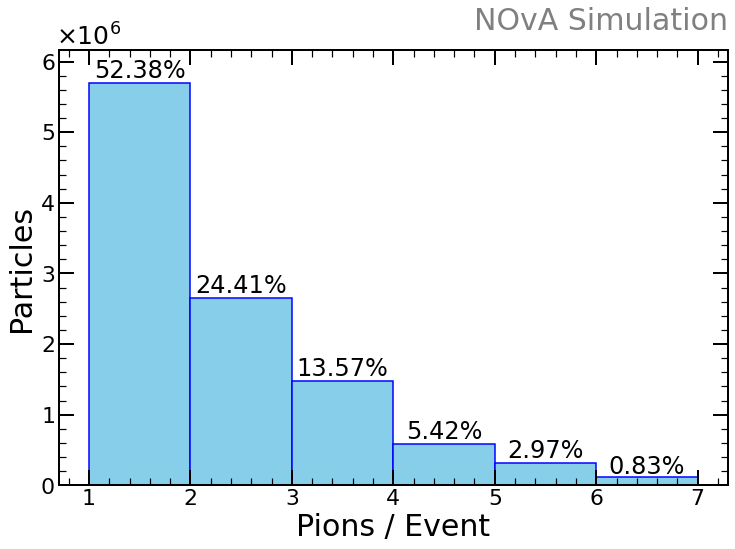

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, MultipleLocator


bin_size = 1

# Calculate total count
nevents = len(lostpernumber)

# Define bin edges
bin_edges = np.arange(1, 8, bin_size)

# Create histogram
plt.figure(figsize=(12, 8))
plt.hist(lostpernumber, bins=bin_edges, edgecolor='blue', linewidth=1.5, color='skyblue')

# Calculate and add percentage annotations
for i in range(len(bin_edges) - 1):
    count = np.count_nonzero((lostpernumber >= bin_edges[i]) & (lostpernumber < bin_edges[i+1]))
    percent = count / nevents * 100
    plt.text((bin_edges[i] + bin_edges[i+1]) / 2, count, f'{percent:.2f}%', ha='center', va='bottom', fontsize=24)


# Set axis labels and title
plt.xlabel('Pions / Event', fontsize=30)
plt.ylabel('Particles', fontsize=30)
#plt.title(f'Lost Pions in Events', fontsize=30)

set_plot_style()
set_sn()
plt.xticks(fontsize=22) 
plt.yticks(fontsize=22)
# image_path = 'novastyle.png'  # Specify the path to your image file
# fig = plt.figure(figsize=(10, 10)) 
# plt.figimage(plt.imread(image_path), 490, 515, alpha=1)
# Set the number of y-axis ticks
#plt.locator_params(axis='y', nbins=5)
# Save and show plot
plt.savefig("poster/lost_per_event_v2.png", bbox_inches='tight')
plt.savefig("poster/lost_per_event_v2.pdf", bbox_inches='tight')
# plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/lost_per_event_part2_{folder}.png', bbox_inches='tight')
plt.show()


In [3]:
#EXTRACTING THE PION ENERGY FOR THE EVENTS WITH DETECTED PIONS
start_time = time.time()

folders=['Res','DIS','QE','MEC']


episnt = [[] for _ in range(5)]
#store the list of NT original numpi
#store the list of Reco numpi
for folder in folders:
    temp=read_file(folder, 'analysisfiles/energiesNT_part1')
    for event in temp:
        l = len(event)
        if l < len(episnt):
            sum=0
            for i in range(l):
                sum=sum+float(event[i])-0.139
            episnt[l].append(sum)

            
            
lens=[]

for i in range(5):
    lens.append(len(episnt[i])*i)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 0.6011512279510498 seconds


In [4]:
def calculate_percentage(data, length, ranges):
    percentages = []
    total_count = length
    if total_count !=0:
        for start, end in ranges:
            count=0
            for dat in data:
                if start < dat <= end:
                    count=count+1
            percentage = (count / total_count) * 100
            percentages.append((start, end,count, percentage))

    return percentages

# Example usage
ranges = [(0.05, 0.2), (0.2, 0.5), (0.5, 1), (1, 1.5), (1.5, 2),(2,5)]
lentot=0
for i in range(len(episnt)):
    lentot=lentot+len(episnt[i])

for i in range(len(episnt)):
    percentages = calculate_percentage(episnt[i], lentot, ranges)
    print(f'For the {i} list:') 
    for start, end, count, percentage in percentages:
        print(f"Range {start} to {end}: {percentage:.2f}% with {count}")


For the 0 list:
Range 0.05 to 0.2: 0.00% with 0
Range 0.2 to 0.5: 0.00% with 0
Range 0.5 to 1: 0.00% with 0
Range 1 to 1.5: 0.00% with 0
Range 1.5 to 2: 0.00% with 0
Range 2 to 5: 0.00% with 0
For the 1 list:
Range 0.05 to 0.2: 26.27% with 77698
Range 0.2 to 0.5: 40.99% with 121246
Range 0.5 to 1: 21.52% with 63649
Range 1 to 1.5: 4.37% with 12927
Range 1.5 to 2: 1.21% with 3582
Range 2 to 5: 1.06% with 3126
For the 2 list:
Range 0.05 to 0.2: 0.11% with 329
Range 0.2 to 0.5: 0.98% with 2912
Range 0.5 to 1: 1.50% with 4432
Range 1 to 1.5: 0.47% with 1390
Range 1.5 to 2: 0.14% with 402
Range 2 to 5: 0.17% with 509
For the 3 list:
Range 0.05 to 0.2: 0.00% with 0
Range 0.2 to 0.5: 0.01% with 16
Range 0.5 to 1: 0.03% with 103
Range 1 to 1.5: 0.03% with 77
Range 1.5 to 2: 0.01% with 20
Range 2 to 5: 0.01% with 36
For the 4 list:
Range 0.05 to 0.2: 0.00% with 0
Range 0.2 to 0.5: 0.00% with 0
Range 0.5 to 1: 0.00% with 0
Range 1 to 1.5: 0.00% with 1
Range 1.5 to 2: 0.00% with 0
Range 2 to 5: 0

In [5]:
#filling all the lists with equal number of data to normalize it.
import random
maxim=len(episnt[1])
for i, lists in enumerate(episnt):
    if len(lists) != 0:
        if len(lists) < maxim:
            n = maxim - len(lists)
            for _ in range(n):
                episnt[i].append(random.uniform(2.2, 3))

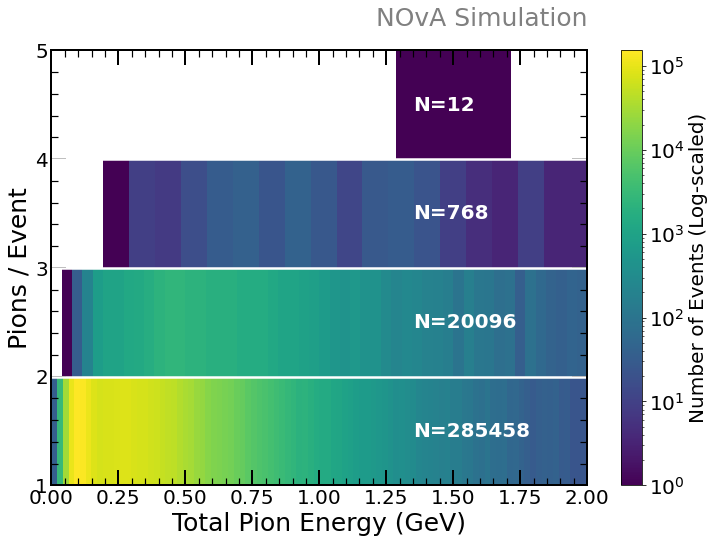

In [7]:
#heatmap with normalization global
# Define x bins
#x_bins = np.linspace(0, 1.5, 100)
from matplotlib.colors import LogNorm
xstart=0
xend=3

bbins = []

bbins.append(np.linspace(xstart, xend, 100))
bbins.append(np.linspace(xstart, xend, numbins(episnt[1],0, 1.6)))
bbins.append(np.linspace(xstart, xend, numbins(episnt[2],0, 1)))
bbins.append(np.linspace(xstart, xend, numbins(episnt[3],0, 0.4)))
bbins.append(np.linspace(xstart, xend, numbins(episnt[4],0, 0.1)))
# print(len(bbins[1]))
# print(lens[1])
# print(len(bbins[2]))
# print(lens[2])
# print(len(bbins[3]))
# print(lens[3])
# print(len(bbins[4]))
# print(lens[4])
# for i in range(len(episnt)):
#     if i==0:
#         bbins.append(np.linspace(xstart, xend, 100))
#     else:
#         bbins.append(np.linspace(xstart, xend, numbins(episnt[i],0, 1.6)))

# Define y values
y_values = [0.5, 1.5, 2.5,3.5,4.5]

# Define number of pions per event
num_pions_per_event = [len(epi) for epi in episnt]

plt.figure(figsize=(12,8)) 

# Plot each histogram
for i, (epi, y_value, num_pions, bbin) in enumerate(zip(episnt, y_values, num_pions_per_event, bbins), start=1):
    plt.hist2d(epi, np.zeros_like(epi)+y_value, bins=[bbin, 1], cmap='viridis',norm=LogNorm())
#     if i > 1:
#         cbar = plt.colorbar()
    if i!=1:
#         plt.text(1.1, y_value, f'N={(i-1)*num_pions}', color='white', fontsize=20, ha='left', va='center', fontweight='bold')
        plt.text(1.35, y_value, f'N={lens[i-1]}', color='white', fontsize=20, ha='left', va='center', fontweight='bold')

colorbar= plt.colorbar(label='Number of Events (Log-scaled)')
colorbar.ax.yaxis.label.set_fontsize(20) 
colorbar.ax.tick_params(labelsize=20)
# Add NOνA Simulation text inside the plot square at the title position
#plt.text(1.0, 1.05, 'NOvA Simulation', fontsize=30, color='gray', ha='right', va='top', transform=plt.gca().transAxes)

#change the number of ticks in the y axis

#plt.tick_params(axis='both', which='major', length=20, width=1.5, direction='in')
set_plot_style()
plt.locator_params(axis='y', nbins=4)
#plt.colorbar(label='Frequency')
plt.xlabel('Total Pion Energy (GeV)', fontsize=25)
plt.ylabel('Pions / Event',fontsize=25)
plt.ylim(1, 5)
plt.xlim(0,2)
# plt.title(f'Reconstructed',x=0.3, y=1.03,fontsize=30)
# plt.title(f'ND',x=0.4, y=1.03,fontsize=30)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)
plt.axhline(y=2, color='white', linewidth=2.5)
plt.axhline(y=3, color='white', linewidth=2.5)
plt.axhline(y=4, color='white', linewidth=2.5)
# Add the image
# image_path = 'novastyle.png'  # Specify the path to your image file
# plt.figimage(plt.imread(image_path), 350, 515, alpha=1)
# plt.text(1.35, 1.2, 'Color represents density', color='white', fontsize=15, ha='right', va='center',fontweight='bold')
plt.savefig(f"poster/heatmap_Total_true_Energy_RecoPions_v2.png", bbox_inches='tight')
plt.savefig(f"poster/heatmap_Total_true_Energy_RecoPions_v2.pdf", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/hetamapTotalEnergy_RecoPions_part1_with_ntE_total.png', bbox_inches='tight')

plt.show()

In [8]:
#EXTRACTING THE PION ENERGY FOR THE EVENTS WITHOUT DETECTED PIONS

start_time = time.time()

folders=['Res','DIS','QE','MEC']


episR = [[] for _ in range(5)]
#store the list of NT original numpi
#store the list of Reco numpi
for folder in folders:
    temp2=read_file(folder, 'analysisfiles/energiesNT_part2')
    for event in temp2:
        l = len(event)
        if l < len(episR):
            sum=0
            for i in range(l):
                sum=sum+float(event[i])-0.139
            episR[l].append(sum)

            
lensR=[]

for i in range(5):
    lensR.append(len(episR[i])*i)
    
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")


Elapsed time: 2.065429210662842 seconds


In [19]:
def calculate_percentage(data, length, ranges):
    percentages = []
    total_count = length
    if total_count !=0:
        for start, end in ranges:
            count=0
            for dat in data:
                if start < dat <= end:
                    count=count+1
            percentage = (count / total_count) * 100
            percentages.append((start, end,count, percentage))

    return percentages

# Example usage
ranges = [(0, 0.2), (0.2, 0.5), (0.5, 1), (1, 1.5), (1.5, 2),(2,5)]
lentot=0
for i in range(len(episR)):
    lentot=lentot+len(episR[i])

for i in range(len(episR)):
    percentages = calculate_percentage(episR[i], lentot, ranges)
    print(f'For the {i} list:') 
    for start, end, count, percentage in percentages:
        print(f"Range {start} to {end}: {percentage:.2f}% with {count}")

For the 0 list:
Range 0 to 0.2: 0.00% with 0
Range 0.2 to 0.5: 0.00% with 0
Range 0.5 to 1: 0.00% with 0
Range 1 to 1.5: 0.00% with 0
Range 1.5 to 2: 0.00% with 0
Range 2 to 5: 0.00% with 0
For the 1 list:
Range 0 to 0.2: 33.84% with 271664
Range 0.2 to 0.5: 24.70% with 198323
Range 0.5 to 1: 12.87% with 103294
Range 1 to 1.5: 3.80% with 30530
Range 1.5 to 2: 1.21% with 9709
Range 2 to 5: 1.21% with 9716
For the 2 list:
Range 0 to 0.2: 2.37% with 18991
Range 0.2 to 0.5: 4.15% with 33286
Range 0.5 to 1: 4.22% with 33871
Range 1 to 1.5: 1.72% with 13807
Range 1.5 to 2: 0.80% with 6428
Range 2 to 5: 1.65% with 13254
For the 3 list:
Range 0 to 0.2: 0.16% with 1285
Range 0.2 to 0.5: 0.66% with 5290
Range 0.5 to 1: 0.98% with 7898
Range 1 to 1.5: 0.64% with 5106
Range 1.5 to 2: 0.44% with 3533
Range 2 to 5: 1.51% with 12157
For the 4 list:
Range 0 to 0.2: 0.01% with 91
Range 0.2 to 0.5: 0.08% with 610
Range 0.5 to 1: 0.16% with 1301
Range 1 to 1.5: 0.13% with 1070
Range 1.5 to 2: 0.12% with 

In [9]:
import random
maxim=len(episR[1])
for i, lists in enumerate(episR):
    if len(lists) != 0:
        if len(lists) < maxim:
            n = maxim - len(lists)
            for _ in range(n):
                episR[i].append(random.uniform(2.2, 3))

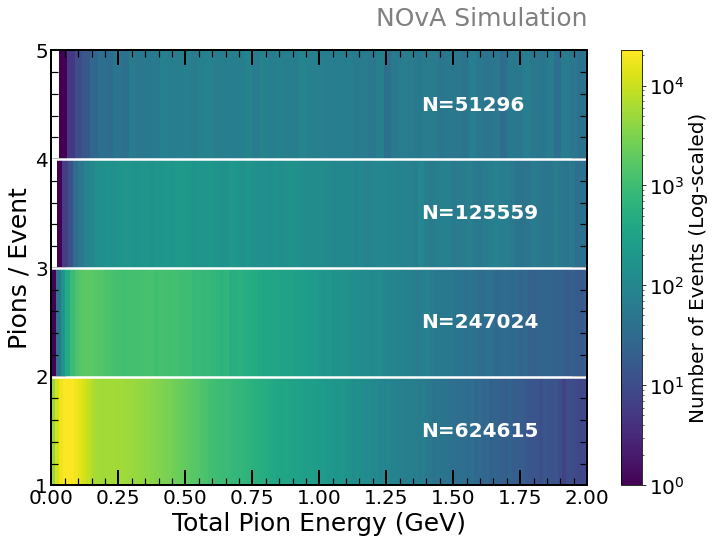

In [10]:
#heatmap with normalization
from matplotlib.colors import LogNorm
xstart=0
xend=3

bbins = []

bbins.append(np.linspace(xstart, xend, 100))
bbins.append(np.linspace(xstart, xend, numbins(episR[1],0, 2)))
bbins.append(np.linspace(xstart, xend, numbins(episR[2],0, 2)))
bbins.append(np.linspace(xstart, xend, numbins(episR[3],0, 1.5)))
bbins.append(np.linspace(xstart, xend, numbins(episR[4],0, 1)))
# print(len(bbins[1]))
# print(lensR[1])
# print(len(bbins[2]))
# print(lensR[2])
# print(len(bbins[3]))
# print(lensR[3])
# print(len(bbins[4]))
# print(lensR[4])
# for i in range(len(episnt)):
#     if i==0:
#         bbins.append(np.linspace(xstart, xend, 100))
#     else:
#         bbins.append(np.linspace(xstart, xend, numbins(episnt[i],0, 1.6)))

# Define y values
y_values = [0.5, 1.5, 2.5,3.5,4.5]

# Define number of pions per event
num_pions_per_event = [len(epi) for epi in episR]

plt.figure(figsize=(12,8)) 

# Plot each histogram
for i, (epi, y_value, num_pions, bbin) in enumerate(zip(episR, y_values, num_pions_per_event, bbins), start=1):
    plt.hist2d(epi, np.zeros_like(epi)+y_value, bins=[bbin, 1], cmap='viridis',norm=LogNorm())
#     if i > 1:
#         cbar = plt.colorbar()
    if i!=1:
#         plt.text(1.1, y_value, f'N={(i-1)*num_pions}', color='white', fontsize=20, ha='left', va='center', fontweight='bold')
        plt.text(1.38, y_value, f'N={lensR[i-1]}', color='white', fontsize=20, ha='left', va='center', fontweight='bold')

colorbar= plt.colorbar(label='Number of Events (Log-scaled)')
colorbar.ax.yaxis.label.set_fontsize(20) 
colorbar.ax.tick_params(labelsize=20)
# Add NOνA Simulation text inside the plot square at the title position
#plt.text(1.0, 1.05, 'NOvA Simulation', fontsize=30, color='gray', ha='right', va='top', transform=plt.gca().transAxes)

#change the number of ticks in the y axis

#plt.tick_params(axis='both', which='major', length=20, width=1.5, direction='in')
set_plot_style()
plt.locator_params(axis='y', nbins=4)

#plt.colorbar(label='Frequency')
plt.xlabel('Total Pion Energy (GeV)', fontsize=25)
plt.ylabel('Pions / Event',fontsize=25)
plt.ylim(1, 5)
plt.xlim(0,2)
# plt.title(f'ND',x=0.4, y=1.03,fontsize=30)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)
plt.axhline(y=2, color='white', linewidth=2.5)
plt.axhline(y=3, color='white', linewidth=2.5)
plt.axhline(y=4, color='white', linewidth=2.5)
# Add the image
# image_path = 'novastyle.png'  # Specify the path to your image file
# plt.figimage(plt.imread(image_path), 350, 515, alpha=1)
plt.savefig(f"poster/heatmapTotal_true_Energy_NoRecoPions_v2.png", bbox_inches='tight')
plt.savefig(f"poster/heatmapTotal_true_Energy_NoRecoPions_v2.pdf", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/hetamapTotalEnergy_NoRecoPions_part2_with_ntE_total.png', bbox_inches='tight')
plt.show()

In [104]:
#ENERGIES PART 1 AND PART2

folders=['Res','DIS','QE','MEC']

epiNTshift=[]
epiNTshift_part2 = []
numpiR = []
#store the list of NT original numpi
#store the list of Reco numpi
for folder in folders:
    temp=read_file(folder, 'analysisfiles/energiesNT_part1')
    epiNTshift.extend([float(element)-0.139 for sublist in temp for element in sublist])
    temp2=read_file(folder, 'analysisfiles/energiesNT_part2')
    epiNTshift_part2.extend([float(element)-0.139 for sublist in temp2 for element in sublist])


In [49]:
bin_size = 0.05
bin_edges = np.arange(0, 2 + bin_size, bin_size)  # Ensure the bin edges cover the entire range

# Calculate histograms
counts1, bins1 = np.histogram(epiNTshift, bins=bin_edges)
counts2, bins2 = np.histogram(epiNTshift_part2, bins=bin_edges)

# Calculate total counts for normalization
total1 = np.sum(counts1)
total2 = np.sum(counts2)

# Normalize the counts to get percentages
normalized_counts1 = (counts1 / total1) * 100
normalized_counts2 = (counts2 / total2) * 100

# Print the amount of data in each bar of the histograms
print("epiNTshift:")
for bin_edge, count in zip(bins1[:-1], counts1):
    print(f'Bin {bin_edge:.2f}-{bin_edge + bin_size:.2f}: {count} entries')

print("\nepiNTshift_part2:")
for bin_edge, count in zip(bins2[:-1], counts2):
    print(f'Bin {bin_edge:.2f}-{bin_edge + bin_size:.2f}: {count} entries')

epiNTshift:
Bin 0.00-0.05: 3230 entries
Bin 0.05-0.10: 27762 entries
Bin 0.10-0.15: 32759 entries
Bin 0.15-0.20: 23954 entries
Bin 0.20-0.25: 24001 entries
Bin 0.25-0.30: 24747 entries
Bin 0.30-0.35: 23252 entries
Bin 0.35-0.40: 21961 entries
Bin 0.40-0.45: 19283 entries
Bin 0.45-0.50: 16475 entries
Bin 0.50-0.55: 13608 entries
Bin 0.55-0.60: 10936 entries
Bin 0.60-0.65: 9200 entries
Bin 0.65-0.70: 7939 entries
Bin 0.70-0.75: 6527 entries
Bin 0.75-0.80: 5275 entries
Bin 0.80-0.85: 4498 entries
Bin 0.85-0.90: 3683 entries
Bin 0.90-0.95: 3142 entries
Bin 0.95-1.00: 2678 entries
Bin 1.00-1.05: 2325 entries
Bin 1.05-1.10: 2062 entries
Bin 1.10-1.15: 1724 entries
Bin 1.15-1.20: 1558 entries
Bin 1.20-1.25: 1412 entries
Bin 1.25-1.30: 1136 entries
Bin 1.30-1.35: 1059 entries
Bin 1.35-1.40: 896 entries
Bin 1.40-1.45: 785 entries
Bin 1.45-1.50: 711 entries
Bin 1.50-1.55: 630 entries
Bin 1.55-1.60: 529 entries
Bin 1.60-1.65: 467 entries
Bin 1.65-1.70: 442 entries
Bin 1.70-1.75: 369 entries
Bin 1

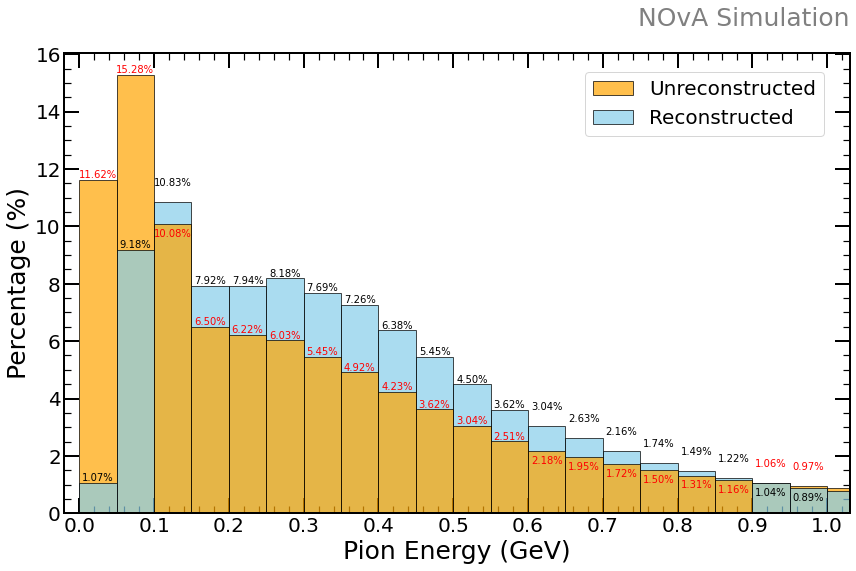

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace these with your actual lists)
# epiNTshift = [...]
# epiNTshift_part2 = [...]

# Define bin parameters
bin_size = 0.05
bin_edges = np.arange(0, 2 + bin_size, bin_size)  # Ensure the bin edges cover the entire range

# Calculate histograms
counts1, bins1 = np.histogram(epiNTshift, bins=bin_edges)
counts2, bins2 = np.histogram(epiNTshift_part2, bins=bin_edges)

# Calculate total counts for normalization
total1 = np.sum(counts1)
total2 = np.sum(counts2)

# Normalize the counts to get percentages
normalized_counts1 = (counts1 / total1) * 100
normalized_counts2 = (counts2 / total2) * 100



# Create figure
plt.figure(figsize=(12, 8))

# Plot the histograms with z-order to ensure proper layering
for count1, count2, bin_edge in zip(normalized_counts1, normalized_counts2, bins1[:-1]):
    if count1 >= count2:
        plt.bar(bin_edge, count1, width=bin_size, color='skyblue', edgecolor='black', alpha=0.7, label='Reconstructed', zorder=1, align='edge')
        plt.bar(bin_edge, count2, width=bin_size, color='orange', edgecolor='black', alpha=0.7, label='Unreconstructed', zorder=2, align='edge')
    else:
        plt.bar(bin_edge, count2, width=bin_size, color='orange', edgecolor='black', alpha=0.7, label='Unreconstructed', zorder=1, align='edge')
        plt.bar(bin_edge, count1, width=bin_size, color='skyblue', edgecolor='black', alpha=0.7, label='Reconstructed', zorder=2, align='edge')

# Remove duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),fontsize=20, loc='upper right', bbox_to_anchor=(0.98, 0.98))

# Set x-axis limits and ticks
x_min, x_max = -0.02, 1
plt.xlim(x_min, x_max)  # Set the desired x-axis limits
plt.xticks(np.arange(x_min, x_max + bin_size, bin_size))  # Set x-axis ticks at each 0.05 step

# Add percentage annotations for first histogram
for count1, count2, bin_edge in zip(normalized_counts1, normalized_counts2, bins1[:-1]):
    if x_min <= bin_edge + bin_size <= x_max:
        if abs(count1 - count2) < 1:
            offset = 0.5 if count1 > count2 else -0.5  # Offset for overlapping texts
        else:
            offset = 0
        
        plt.text(bin_edge + bin_size / 2, count1 + offset, f'{count1:.2f}%', ha='center', va='bottom', fontsize=10)

# Add percentage annotations for second histogram
for count1, count2, bin_edge in zip(normalized_counts1, normalized_counts2, bins1[:-1]):
    if x_min <= bin_edge + bin_size <= x_max:
        if abs(count1 - count2) < 1:
            offset = -0.5 if count1 > count2 else 0.5  # Offset for overlapping texts
        else:
            offset = 0
        
        plt.text(bin_edge + bin_size / 2, count2 + offset, f'{count2:.2f}%', ha='center', va='bottom', fontsize=10, color='red')

plt.xlabel('Pion Energy (GeV)', fontsize=25)
plt.ylabel('Percentage (%)', fontsize=25)
# plt.title('Normalized Histograms of epiNTshift and epiNTshift_part2', fontsize=20)
# plt.grid(True)
set_plot_style()
plt.locator_params(axis='x', nbins=20)
plt.tight_layout()

# Show plot
# plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/energyshift_percentages_comparison_part1_part2_total.png', bbox_inches='tight')
plt.show()



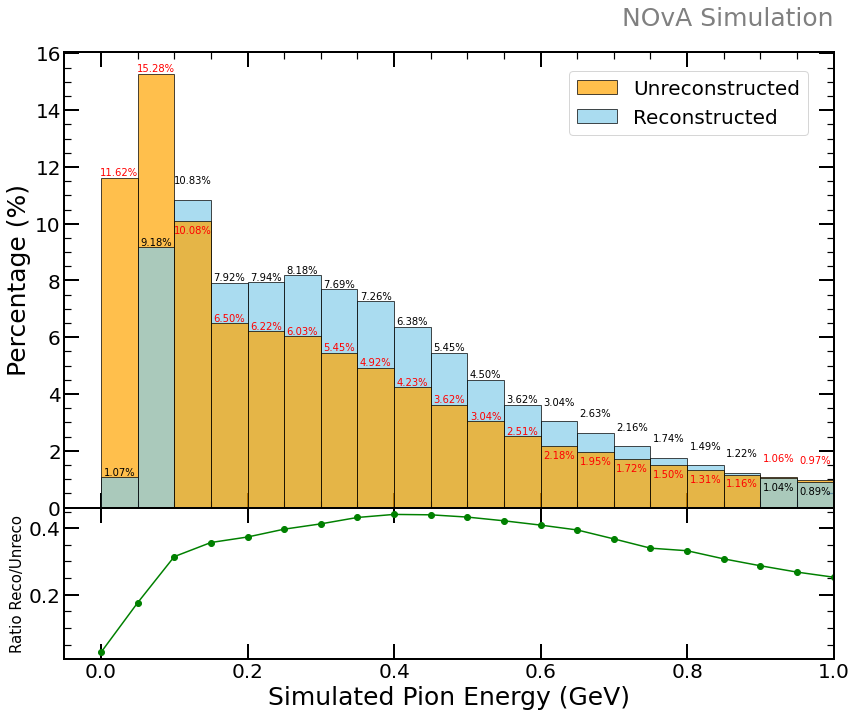

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoLocator, AutoMinorLocator

# Example data (replace with your actual data)
# epiNTshift = np.random.normal(loc=0.8, scale=0.2, size=1000)
# epiNTshift_part2 = np.random.normal(loc=1.2, scale=0.3, size=1500)  # Different size

# Define bin parameters
bin_size = 0.05
bin_edges = np.arange(0, 2 + bin_size, bin_size)  # Ensure the bin edges cover the entire range

# Create histograms
counts1, bins1 = np.histogram(epiNTshift, bins=bin_edges)
counts2, bins2 = np.histogram(epiNTshift_part2, bins=bin_edges)

# Calculate total counts for normalization
total1 = np.sum(counts1)
total2 = np.sum(counts2)

# Normalize the counts to get percentages
normalized_counts1 = (counts1 / total1) * 100
normalized_counts2 = (counts2 / total2) * 100

# Calculate the ratio (handle division by zero)
ratio = np.divide(counts1.astype(float), counts2.astype(float), out=np.zeros_like(counts1, dtype=float), where=counts2 != 0)

# Create the main figure with subplots
fig, (ax_main, ax_ratio) = plt.subplots(nrows=2, figsize=(12, 10), gridspec_kw={'height_ratios': [3, 1], 'hspace': 0})

# Plot the histograms with z-order to ensure proper layering
for count1, count2, bin_edge in zip(normalized_counts1, normalized_counts2, bins1[:-1]):
    if count1 >= count2:
        ax_main.bar(bin_edge, count1, width=bin_size, color='skyblue', edgecolor='black', alpha=0.7, label='Reconstructed', zorder=1, align='edge')
        ax_main.bar(bin_edge, count2, width=bin_size, color='orange', edgecolor='black', alpha=0.7, label='Unreconstructed', zorder=2, align='edge')
    else:
        ax_main.bar(bin_edge, count2, width=bin_size, color='orange', edgecolor='black', alpha=0.7, label='Unreconstructed', zorder=1, align='edge')
        ax_main.bar(bin_edge, count1, width=bin_size, color='skyblue', edgecolor='black', alpha=0.7, label='Reconstructed', zorder=2, align='edge')

# Plot ratio
ax_ratio.plot(bins1[:-1], ratio, color='green', marker='o', linestyle='-', label='Reconstructed / Non-reconstructed')

# Set labels and titles
ax_main.set_ylabel('Percentage (%)', fontsize=25)
ax_ratio.set_xlabel('Simulated Pion Energy (GeV)', fontsize=25)
ax_ratio.set_ylabel('Ratio Reco/Unreco', fontsize=15)
# ax_main.set_title('Energy Shift Comparison', fontsize=24)
handles, labels = ax_main.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax_main.legend(by_label.values(), by_label.keys(), fontsize=20, loc='upper right', bbox_to_anchor=(0.98, 0.98))

# Add text in the ax_main subplot
ax_main.text(1.0, 1.1, fr'NOvA Simulation', fontsize=25, color='gray', ha='right', va='top', transform=ax_main.transAxes, fontfamily='sans-serif')

# Remove x-axis label from the upper plot
ax_main.set_xticklabels([])

# Set common x-axis limits for both subplots
ax_main.set_xlim(-0.05, 1)
ax_ratio.set_xlim(-0.05, 1)

# Apply custom properties to the top plot
ax_main.xaxis.set_major_locator(AutoLocator())
ax_main.yaxis.set_major_locator(AutoLocator())
ax_main.xaxis.set_minor_locator(AutoMinorLocator())
ax_main.yaxis.set_minor_locator(AutoMinorLocator())
ax_main.tick_params(axis='both', which='major', length=30, width=2, direction='in', top=True, right=True)
ax_main.tick_params(axis='both', which='minor', length=7, width=1.2, direction='in', top=True, right=True)
ax_main.tick_params(axis='x', direction='in', length=15, width=2)
ax_main.tick_params(axis='y', direction='in', length=15, width=2)
ax_main.spines['top'].set_position(('outward', 0))
ax_main.spines['right'].set_position(('outward', 0))
ax_main.spines['left'].set_position(('outward', 0))
ax_main.spines['bottom'].set_position(('outward', 0))
ax_main.spines['top'].set_linewidth(2)
ax_main.spines['right'].set_linewidth(2)
ax_main.spines['left'].set_linewidth(2)
ax_main.spines['bottom'].set_linewidth(2)
ax_main.tick_params(axis='both', labelsize=20)

ax_ratio.xaxis.set_major_locator(AutoLocator())
ax_ratio.yaxis.set_major_locator(AutoLocator())
ax_ratio.yaxis.set_minor_locator(AutoMinorLocator())
ax_ratio.tick_params(axis='both', which='major', length=30, width=2, direction='in', top=True, right=True)
ax_ratio.tick_params(axis='both', which='minor', length=7, width=1.2, direction='in', top=True, right=True)
ax_ratio.tick_params(axis='x', direction='in', length=15, width=2)
ax_ratio.tick_params(axis='y', direction='in', length=15, width=2)
ax_ratio.spines['top'].set_position(('outward', 0))
ax_ratio.spines['right'].set_position(('outward', 0))
ax_ratio.spines['left'].set_position(('outward', 0))
ax_ratio.spines['bottom'].set_position(('outward', 0))
ax_ratio.spines['top'].set_linewidth(2)
ax_ratio.spines['right'].set_linewidth(2)
ax_ratio.spines['left'].set_linewidth(2)
ax_ratio.spines['bottom'].set_linewidth(2)
ax_ratio.tick_params(axis='both', labelsize=20)

# Add percentage annotations for the first histogram
for count1, count2, bin_edge in zip(normalized_counts1, normalized_counts2, bins1[:-1]):
    if -0.05 <= bin_edge + bin_size <= 1:
        if abs(count1 - count2) < 1:
            offset = 0.5 if count1 > count2 else -0.5  # Offset for overlapping texts
        else:
            offset = 0
        
        ax_main.text(bin_edge + bin_size / 2, count1 + offset, f'{count1:.2f}%', ha='center', va='bottom', fontsize=10)

# Add percentage annotations for the second histogram
for count1, count2, bin_edge in zip(normalized_counts1, normalized_counts2, bins1[:-1]):
    if -0.05 <= bin_edge + bin_size <= 1:
        if abs(count1 - count2) < 1:
            offset = -0.5 if count1 > count2 else 0.5  # Offset for overlapping texts
        else:
            offset = 0
        
        ax_main.text(bin_edge + bin_size / 2, count2 + offset, f'{count2:.2f}%', ha='center', va='bottom', fontsize=10, color='red')

# Show the plot
plt.tight_layout()
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/energyshift_percentages_comparison_part1_part2_total_v2.png', bbox_inches='tight')

plt.show()


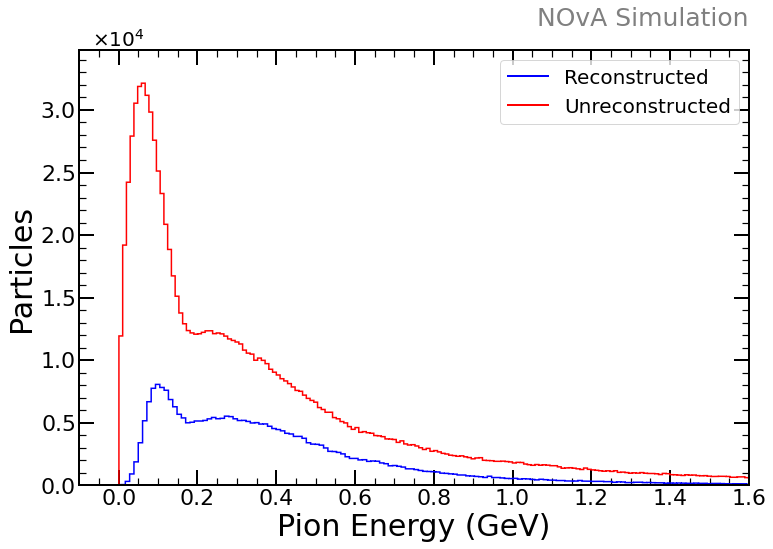

In [7]:
#normalized

# weights = np.ones_like(epiNTshift) / len(epiNTshift)
# weights2 = np.ones_like(epiNTshift_part2) / len(epiNTshift_part2)
plt.figure(figsize=(12, 8)) 
plt.hist(epiNTshift, bins=autobins(epiNTshift), edgecolor='blue', linewidth=1.5, histtype='step', label='Reconstruted pions')
plt.hist(epiNTshift_part2, bins=autobins(epiNTshift_part2), edgecolor='red', linewidth=1.5, histtype='step', label='Non-reconstruted pions')
plt.xlim(-0.1,1.6)
plt.xlabel('Pion Energy (GeV)', fontsize=30)
plt.ylabel('Particles', fontsize=30)
set_plot_style(['Reconstructed', 'Unreconstructed'])
plt.xticks(fontsize=22) 
plt.yticks(fontsize=22)
set_sn2()
# Add the image
# image_path = 'novastyle.png'  # Specify the path to your image file
# plt.figimage(plt.imread(image_path), 515, 515, alpha=1)  # Adjust the coordinates (100, 800) as needed
# plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/energyshift_comparison_part1_part2_{folder}.png', bbox_inches='tight')
# plt.savefig(f"poster/energy_comparison_v2.png", bbox_inches='tight')
# plt.savefig(f"poster/energy_comparison_v2.pdf", bbox_inches='tight')

plt.show()

In [ ]:
def set_plot_style(labels=None, loc='best'):
    # Automatically set the number of major ticks
    plt.gca().xaxis.set_major_locator(AutoLocator())
    plt.gca().yaxis.set_major_locator(AutoLocator())

    # Automatically set the number of minor ticks
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())

    # Change the length of the tick marks
    plt.tick_params(axis='both', which='major', length=30, width=2, direction='in', top=True, right=True)  # Adjust the length as needed
    plt.tick_params(axis='both', which='minor', length=7, width=1.2,direction='in', top=True, right=True)  # Minor ticks

    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)

    # Change the width of the frame surrounding the plot
    for spine in plt.gca().spines.values():
        spine.set_linewidth(2)  # Adjust the linewidth as needed

    # Move the axes inside the plot
    ax = plt.gca()
    ax.spines['top'].set_position(('outward', 0))
    ax.spines['right'].set_position(('outward', 0))
    ax.spines['left'].set_position(('outward', 0))
    ax.spines['bottom'].set_position(('outward', 0))

    # Adjust the position of the ticks
    ax.tick_params(axis='x', direction='in', length=15, width=2)
    ax.tick_params(axis='y', direction='in', length=15, width=2)

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    # Add NOνA Simulation text inside the plot square at the title position
    plt.text(1.0, 1.1, fr'NOvA Simulation', fontsize=25, color='gray', ha='right', va='top', transform=plt.gca().transAxes,fontfamily='sans-serif')

    # Create custom legend handles if labels are provided
    if labels is not None:
        handles = [Line2D([0], [0], color='blue', lw=2), Line2D([0], [0], color='red', lw=2)]
        plt.legend(handles=handles, labels=labels, fontsize=20, loc=loc)
def set_sn2():
    plt.ticklabel_format(style='plain', axis='y')
    plt.gca().yaxis.get_offset_text().set_visible(False)

    # max_value = max(energylost)
    max_value = plt.ylim()[1]
    factor = 10 ** (len(str(int(max_value))) - 1)

    # Define custom formatter for y-axis ticks
    def custom_formatter(x, pos):
        return r'${:.1f}$'.format(x / factor)


    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))
    y_max = plt.ylim()[1]
    num_digits = len(str(abs(int(y_max))))
    exponent = int(num_digits)-1

    plt.ylim(0,y_max+(0.03*y_max))

    y_limits = plt.ylim()
    upper_limit = y_limits[1]
    
    xlim = plt.xlim()
    plt.text(0, upper_limit, rf'$\times 10^{{{exponent}}}$', fontsize=20, ha='center', va='bottom')

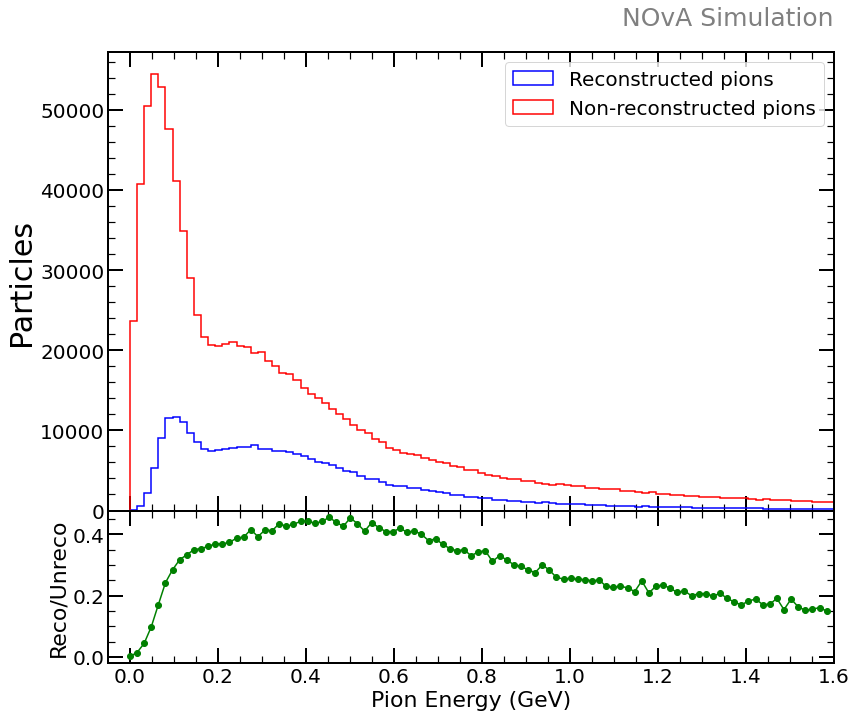

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoLocator, AutoMinorLocator

# Example data (replace with your actual data)
# epiNTshift = np.random.normal(loc=0.8, scale=0.2, size=1000)
# epiNTshift_part2 = np.random.normal(loc=1.2, scale=0.3, size=1500)  # Different size

# Create histograms
bins = np.linspace(0, 1.6, 100)
hist_reconstructed, _ = np.histogram(epiNTshift, bins=bins)
hist_unreconstructed, _ = np.histogram(epiNTshift_part2, bins=bins)

# Calculate the ratio (handle division by zero)
ratio = np.divide(hist_reconstructed.astype(float), hist_unreconstructed.astype(float), out=np.zeros_like(hist_reconstructed, dtype=float), where=hist_unreconstructed != 0)

# Create the main figure
fig, (ax_main, ax_ratio) = plt.subplots(nrows=2, figsize=(12, 10), gridspec_kw={'height_ratios': [3, 1], 'hspace': 0})

# Plot histograms
ax_main.hist(epiNTshift, bins=bins, edgecolor='blue', linewidth=1.5, histtype='step', label='Reconstructed pions')
ax_main.hist(epiNTshift_part2, bins=bins, edgecolor='red', linewidth=1.5, histtype='step', label='Non-reconstructed pions')

# Plot ratio
ax_ratio.plot(bins[:-1], ratio, color='green', marker='o', linestyle='-', label='Reconstructed / Non-reconstructed')

# Set labels and titles
ax_main.set_ylabel('Particles', fontsize=30)
ax_ratio.set_xlabel('Pion Energy (GeV)', fontsize=22)
ax_ratio.set_ylabel('Reco/Unreco', fontsize=22)
# ax_main.set_title('Energy Shift Comparison', fontsize=24)
ax_main.legend(fontsize=20)

# Remove x-axis label from the upper plot
ax_main.set_xticklabels([])

# Set common x-axis limits for both subplots
ax_main.set_xlim(-0.05, 1.6)
ax_ratio.set_xlim(-0.05, 1.6)

# Apply custom properties to the top plot
ax_main.xaxis.set_major_locator(AutoLocator())
ax_main.yaxis.set_major_locator(AutoLocator())
ax_main.xaxis.set_minor_locator(AutoMinorLocator())
ax_main.yaxis.set_minor_locator(AutoMinorLocator())
ax_main.tick_params(axis='both', which='major', length=30, width=2, direction='in', top=True, right=True)
ax_main.tick_params(axis='both', which='minor', length=7, width=1.2, direction='in', top=True, right=True)
ax_main.tick_params(axis='x', direction='in', length=15, width=2)
ax_main.tick_params(axis='y', direction='in', length=15, width=2)
ax_main.spines['top'].set_position(('outward', 0))
ax_main.spines['right'].set_position(('outward', 0))
ax_main.spines['left'].set_position(('outward', 0))
ax_main.spines['bottom'].set_position(('outward', 0))
ax_main.spines['top'].set_linewidth(2)
ax_main.spines['right'].set_linewidth(2)
ax_main.spines['left'].set_linewidth(2)
ax_main.spines['bottom'].set_linewidth(2)
ax_main.tick_params(axis='both', labelsize=20)
ax_main.text(1.0, 1.1, fr'NOvA Simulation', fontsize=25, color='gray', ha='right', va='top', transform=ax_main.transAxes, fontfamily='sans-serif')


ax_ratio.xaxis.set_major_locator(AutoLocator())
ax_ratio.yaxis.set_major_locator(AutoLocator())
ax_ratio.xaxis.set_minor_locator(AutoMinorLocator())
ax_ratio.yaxis.set_minor_locator(AutoMinorLocator())
ax_ratio.tick_params(axis='both', which='major', length=30, width=2, direction='in', top=True, right=True)
ax_ratio.tick_params(axis='both', which='minor', length=7, width=1.2, direction='in', top=True, right=True)
ax_ratio.tick_params(axis='x', direction='in', length=15, width=2)
ax_ratio.tick_params(axis='y', direction='in', length=15, width=2)
ax_ratio.spines['top'].set_position(('outward', 0))
ax_ratio.spines['right'].set_position(('outward', 0))
ax_ratio.spines['left'].set_position(('outward', 0))
ax_ratio.spines['bottom'].set_position(('outward', 0))
ax_ratio.spines['top'].set_linewidth(2)
ax_ratio.spines['right'].set_linewidth(2)
ax_ratio.spines['left'].set_linewidth(2)
ax_ratio.spines['bottom'].set_linewidth(2)
ax_ratio.tick_params(axis='both', labelsize=20)



# Show the plot
plt.tight_layout()
plt.show()


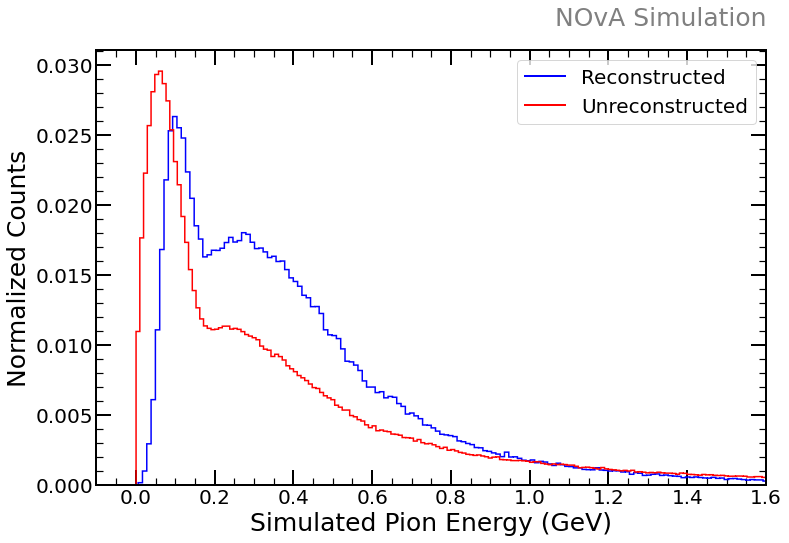

In [31]:
#normalized

weights = np.ones_like(epiNTshift) / len(epiNTshift)
weights2 = np.ones_like(epiNTshift_part2) / len(epiNTshift_part2)
plt.figure(figsize=(12, 8)) 
plt.hist(epiNTshift, bins=autobins(epiNTshift), edgecolor='blue', linewidth=1.5, histtype='step', label='Reconstruted pions',weights=weights)
plt.hist(epiNTshift_part2, bins=autobins(epiNTshift_part2), edgecolor='red', linewidth=1.5, histtype='step', label='Non-reconstruted pions',weights=weights2)
plt.xlim(-0.1,1.6)
# plt.ylim(0,0.034)
plt.xlabel('Simulated Pion Energy (GeV)', fontsize=25)
plt.ylabel('Normalized Counts', fontsize=25)
set_plot_style(['Reconstructed', 'Unreconstructed'])
# Add the image
# image_path = 'novastyle.png'  # Specify the path to your image file
# plt.figimage(plt.imread(image_path), 525, 505, alpha=1)  # Adjust the coordinates (100, 800) as needed
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/energyshift_comparison_part1_part2_total.png', bbox_inches='tight')
# plt.savefig(f"poster/energy_comparison.png", bbox_inches='tight')
# plt.savefig(f"poster/energy_comparison.pdf", bbox_inches='tight')

plt.show()



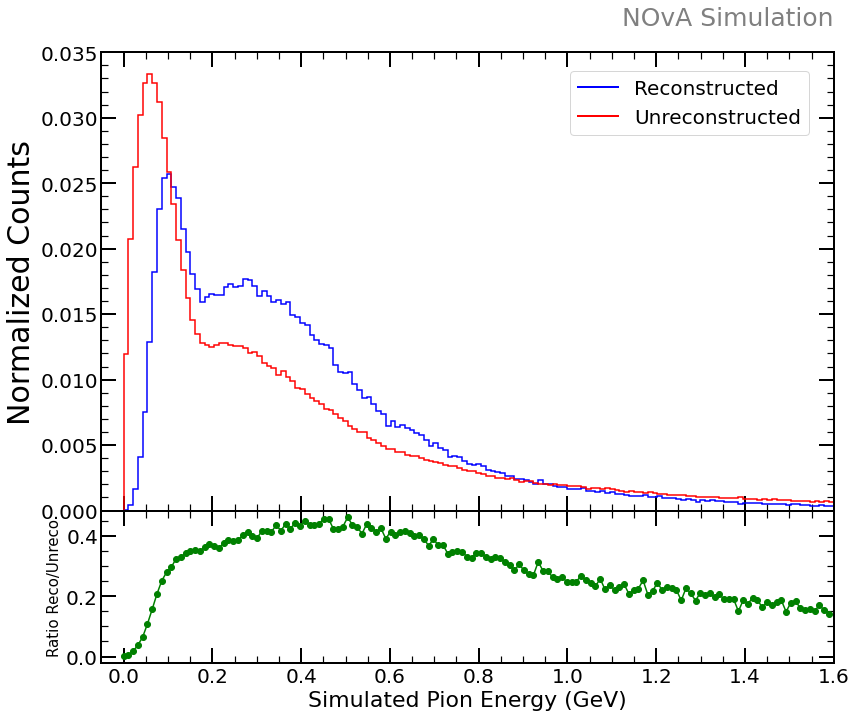

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoLocator, AutoMinorLocator

# Example data (replace with your actual data)
# epiNTshift = np.random.normal(loc=0.8, scale=0.2, size=1000)
# epiNTshift_part2 = np.random.normal(loc=1.2, scale=0.3, size=1500)  # Different size
weights = np.ones_like(epiNTshift) / len(epiNTshift)
weights2 = np.ones_like(epiNTshift_part2) / len(epiNTshift_part2)
# Create histograms
bins = np.linspace(0, 1.6, 150)
hist_reconstructed, _ = np.histogram(epiNTshift, bins=bins)
hist_unreconstructed, _ = np.histogram(epiNTshift_part2, bins=bins)

# Calculate the ratio (handle division by zero)
ratio = np.divide(hist_reconstructed.astype(float), hist_unreconstructed.astype(float), out=np.zeros_like(hist_reconstructed, dtype=float), where=hist_unreconstructed != 0)

# Create the main figure
fig, (ax_main, ax_ratio) = plt.subplots(nrows=2, figsize=(12, 10), gridspec_kw={'height_ratios': [3, 1], 'hspace': 0})

# Plot histograms
ax_main.hist(epiNTshift, bins=bins, edgecolor='blue', linewidth=1.5, histtype='step', label='Reconstructed pions',weights=weights)
ax_main.hist(epiNTshift_part2, bins=bins, edgecolor='red', linewidth=1.5, histtype='step', label='Non-reconstructed pions',weights=weights2)

# Plot ratio
ax_ratio.plot(bins[:-1], ratio, color='green', marker='o', linestyle='-', label='Reconstructed / Non-reconstructed')

# Set labels and titles
ax_main.set_ylabel('Normalized Counts', fontsize=30)
ax_ratio.set_xlabel('Simulated Pion Energy (GeV)', fontsize=22)
ax_ratio.set_ylabel('Ratio Reco/Unreco', fontsize=15)
# ax_main.set_title('Energy Shift Comparison', fontsize=24)
# ax_main.legend(fontsize=20)
labels=['Reconstructed','Unreconstructed']
handles = [Line2D([0], [0], color='blue', lw=2), Line2D([0], [0], color='red', lw=2)]
ax_main.legend(handles=handles, labels=labels, fontsize=20, loc='upper right', bbox_to_anchor=(0.98, 0.98))

# Remove x-axis label from the upper plot
ax_main.set_xticklabels([])

# Set common x-axis limits for both subplots
ax_main.set_xlim(-0.05, 1.6)
ax_ratio.set_xlim(-0.05, 1.6)

# Apply custom properties to the top plot
ax_main.xaxis.set_major_locator(AutoLocator())
ax_main.yaxis.set_major_locator(AutoLocator())
ax_main.xaxis.set_minor_locator(AutoMinorLocator())
ax_main.yaxis.set_minor_locator(AutoMinorLocator())
ax_main.tick_params(axis='both', which='major', length=30, width=2, direction='in', top=True, right=True)
ax_main.tick_params(axis='both', which='minor', length=7, width=1.2, direction='in', top=True, right=True)
ax_main.tick_params(axis='x', direction='in', length=15, width=2)
ax_main.tick_params(axis='y', direction='in', length=15, width=2)
ax_main.spines['top'].set_position(('outward', 0))
ax_main.spines['right'].set_position(('outward', 0))
ax_main.spines['left'].set_position(('outward', 0))
ax_main.spines['bottom'].set_position(('outward', 0))
ax_main.spines['top'].set_linewidth(2)
ax_main.spines['right'].set_linewidth(2)
ax_main.spines['left'].set_linewidth(2)
ax_main.spines['bottom'].set_linewidth(2)
ax_main.tick_params(axis='both', labelsize=20)
ax_main.text(1.0, 1.1, fr'NOvA Simulation', fontsize=25, color='gray', ha='right', va='top', transform=ax_main.transAxes, fontfamily='sans-serif')


ax_ratio.xaxis.set_major_locator(AutoLocator())
ax_ratio.yaxis.set_major_locator(AutoLocator())
ax_ratio.xaxis.set_minor_locator(AutoMinorLocator())
ax_ratio.yaxis.set_minor_locator(AutoMinorLocator())
ax_ratio.tick_params(axis='both', which='major', length=30, width=2, direction='in', top=True, right=True)
ax_ratio.tick_params(axis='both', which='minor', length=7, width=1.2, direction='in', top=True, right=True)
ax_ratio.tick_params(axis='x', direction='in', length=15, width=2)
ax_ratio.tick_params(axis='y', direction='in', length=15, width=2)
ax_ratio.spines['top'].set_position(('outward', 0))
ax_ratio.spines['right'].set_position(('outward', 0))
ax_ratio.spines['left'].set_position(('outward', 0))
ax_ratio.spines['bottom'].set_position(('outward', 0))
ax_ratio.spines['top'].set_linewidth(2)
ax_ratio.spines['right'].set_linewidth(2)
ax_ratio.spines['left'].set_linewidth(2)
ax_ratio.spines['bottom'].set_linewidth(2)
ax_ratio.tick_params(axis='both', labelsize=20)



# Show the plot
plt.tight_layout()
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/energyshift_comparison_part1_part2_total_v2.png', bbox_inches='tight')
plt.show()

In [46]:
#check the percentages distributions above and below the valley on the unreconstructed distribution

def calculate_percentages(data, thresholds):
    percentages = {}
    total = len(data)
    for threshold in thresholds:
        below_threshold = np.sum(np.array(data) < threshold)
        above_threshold = np.sum(np.array(data) >= threshold)
        percentages[threshold] = {
            'below': (below_threshold / total) * 100,
            'above': (above_threshold / total) * 100
        }
    return percentages


thresholds = [0.059,0.190]  # Define your own thresholds
percentages1 = calculate_percentages(epiNTshift_part2, thresholds)
len1=len(epiNTshift_part2)

for threshold, perc in percentages1.items():
    below_t1=(percentages1[threshold]['below']/100)*len1
    print(f'Threshold {threshold}: Below {perc["below"]:.2f}%, {below_t1}, Above {perc["above"]:.2f}%, {len1-below_t1}')
    

Threshold 0.059: Below 13.82%, 150163.0, Above 86.18%, 936671.0
Threshold 0.19: Below 40.17%, 436568.0, Above 59.83%, 650266.0


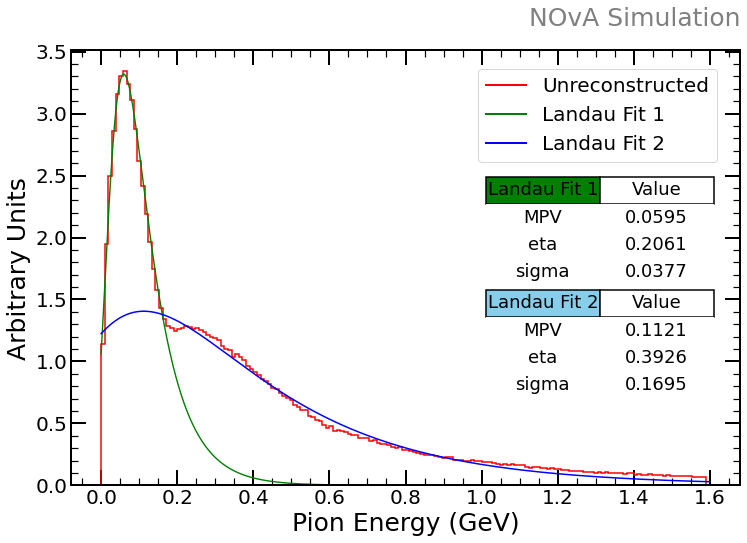

Landau Fit 1 - Most Probable Value (MPV): 0.05952191053316215, Normalization Constant (eta): 0.20605333321955185, Scale Parameter (sigma): 0.03766438460116295
Landau Fit 2 - Most Probable Value (MPV): 0.112113783896244, Normalization Constant (eta): 0.39259347663214544, Scale Parameter (sigma): 0.1694659131689654


In [33]:
#HERE IS THE LANDAU FITTING FOR THE UNRECONSTRUCTED ENERGIES

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.patches as mpatches

# Define Landau distribution function
def landau(x, mpv, eta, sigma):
    return (eta / sigma) * np.exp(-((x - mpv) / sigma + np.exp(-(x - mpv) / sigma)) / 2)


# Define the ranges for the Landau fits
fit1_min = 0
fit1_max = 0.190
fit2_min = 0.18
fit2_max = 1.6

# Plot histogram
plt.figure(figsize=(12, 8))
bins = autobins(epiNTshift_part2, 0, 1.6)
counts, bin_edges, _ = plt.hist(epiNTshift_part2, bins=bins, edgecolor='red', linewidth=1.5, histtype='step', label='True Energy', density=True)

# Get bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Select the ranges for fitting
mask1 = (bin_centers >= fit1_min) & (bin_centers <= fit1_max)
fit_bin_centers1 = bin_centers[mask1]
fit_counts1 = counts[mask1]

mask2 = (bin_centers >= fit2_min) & (bin_centers <= fit2_max)
fit_bin_centers2 = bin_centers[mask2]
fit_counts2 = counts[mask2]

# Fit Landau to the first selected section of the histogram
popt1, _ = curve_fit(landau, fit_bin_centers1, fit_counts1, p0=[(fit1_min + fit1_max) / 2, 1, 0.1])

# Fit Landau to the second selected section of the histogram
popt2, _ = curve_fit(landau, fit_bin_centers2, fit_counts2, p0=[(fit2_min + fit2_max) / 2, 1, 0.1])

# Plot Landau fits
x = np.linspace(0, 1.6, 1000)
plt.plot(x, landau(x, *popt1), 'g-', linewidth=1.4,label='Landau Fit 1')
plt.plot(x, landau(x, *popt2), color='blue', label='Landau Fit 2')

# Add tables with Landau parameters
table_data1 = [
    ["MPV", f"{popt1[0]:.4f}"],
    ["eta", f"{popt1[1]:.4f}"],
    ["sigma", f"{popt1[2]:.4f}"]
]

table_data2 = [
    ["MPV", f"{popt2[0]:.4f}"],
    ["eta", f"{popt2[1]:.4f}"],
    ["sigma", f"{popt2[2]:.4f}"]
]

# Plot table for the first fit
table1 = plt.table(cellText=table_data1, colLabels=["Landau Fit 1", "Value"], loc="upper left", cellLoc="center", bbox=[0.62, 0.46, 0.34, 0.25], colColours=["green", "white"])
table1.auto_set_font_size(False)
table1.set_fontsize(18)
for key, cell in table1.get_celld().items():
    cell.set_linewidth(0)  # Remove internal lines
    if key[0] == 0 or key[1] == -1:
        cell.set_linewidth(1.5)  # Keep outer lines

# Plot table for the second fit
table2 = plt.table(cellText=table_data2, colLabels=["Landau Fit 2", "Value"], loc="upper right", cellLoc="center", bbox=[0.62, 0.2, 0.34, 0.25], colColours=["skyblue", "white"])
table2.auto_set_font_size(False)
table2.set_fontsize(18)
for key, cell in table2.get_celld().items():
    cell.set_linewidth(0)  # Remove internal lines
    if key[0] == 0 or key[1] == -1:
        cell.set_linewidth(1.5)  # Keep outer lines

plt.xlabel('Pion Energy (GeV)', fontsize=25)
plt.ylabel('Arbitrary Units', fontsize=25)
set_plot_style()
labels=['Unreconstructed','Landau Fit 1','Landau Fit 2']
handles = [Line2D([0], [0], color='red', lw=2), Line2D([0], [0], color='green', lw=2), Line2D([0], [0], color='blue', lw=2)]
plt.legend(handles=handles, labels=labels, fontsize=20, loc='upper right', bbox_to_anchor=(0.98, 0.98))
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/energy_shifted_simulated_with_landau_part2_total.png', bbox_inches='tight')
plt.show()

# Print Landau parameters
mpv1, eta1, sigma1 = popt1
mpv2, eta2, sigma2 = popt2
print(f"Landau Fit 1 - Most Probable Value (MPV): {mpv1}, Normalization Constant (eta): {eta1}, Scale Parameter (sigma): {sigma1}")
print(f"Landau Fit 2 - Most Probable Value (MPV): {mpv2}, Normalization Constant (eta): {eta2}, Scale Parameter (sigma): {sigma2}")


In [ ]:
#--------------------------------------------------------------------------------

In [16]:
#This is for the full un analysised pions energy

start_time = time.time()


folders=['Res','DIS','QE','MEC']

nupiNT_Res=[]
nupiNT_QE=[]
nupiNT_MEC=[]
nupiNT_DIS=[]


for folder in folders:
    
    temp0=read_file2(folder, 'nuevarsNT_total')
    if folder=='Res':
        for event in temp0:
            l=len(event)
            for i in range(l):
                nupiNT_Res.append(float(event[i]))
    
    if folder=='DIS':
        for event in temp0:
            l=len(event)
            for i in range(l):
                nupiNT_DIS.append(float(event[i]))
            
    if folder=='MEC':
        for event in temp0:
            l=len(event)
            for i in range(l):
                nupiNT_MEC.append(float(event[i]))
            
    if folder=='QE':
        for event in temp0:
            l=len(event)
            for i in range(l):
                nupiNT_QE.append(float(event[i]))
    
        
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 1.9349827766418457 seconds


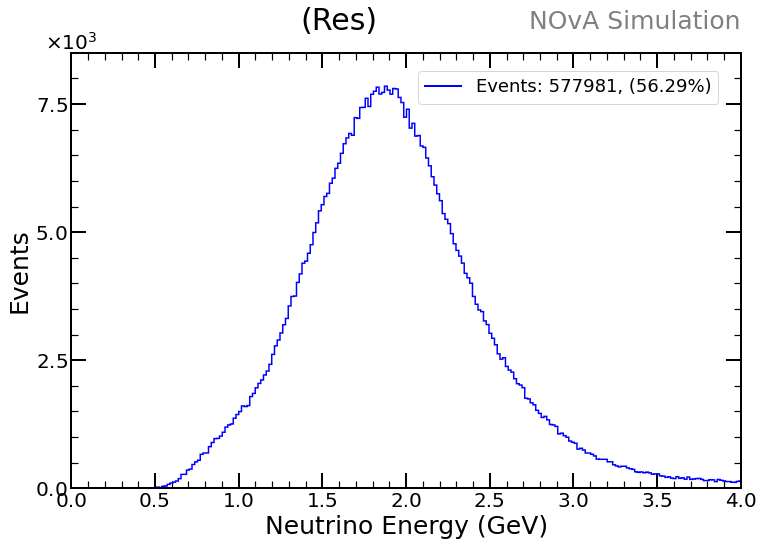

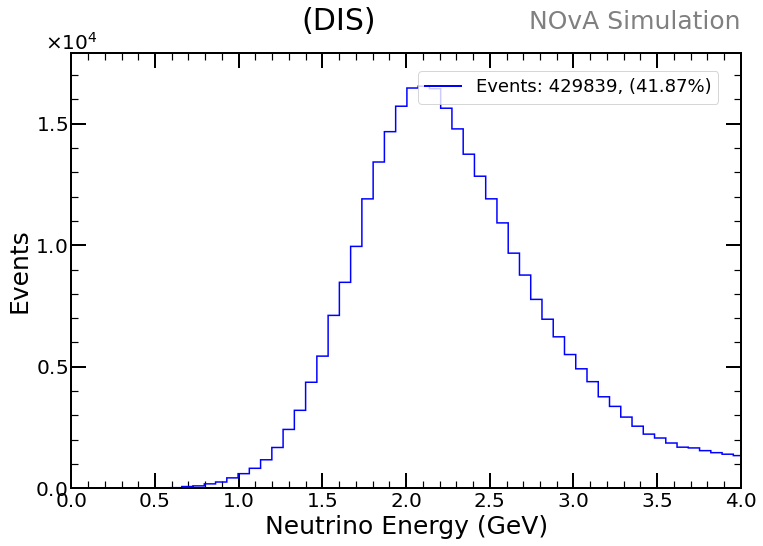

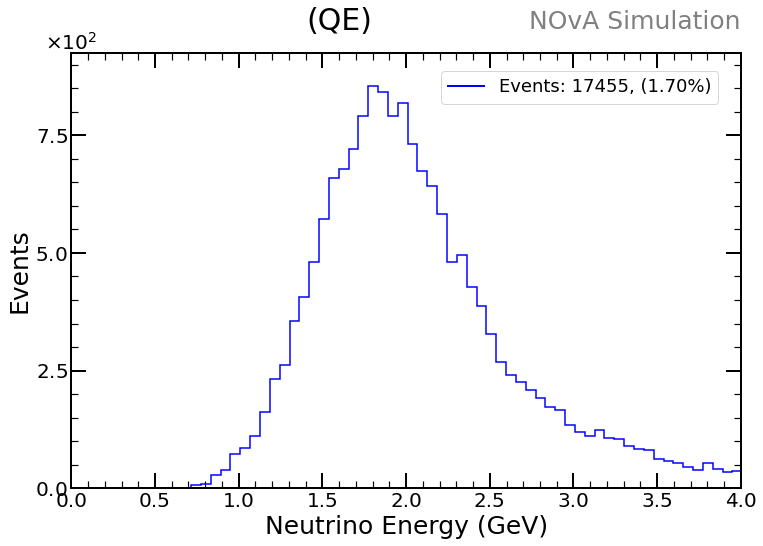

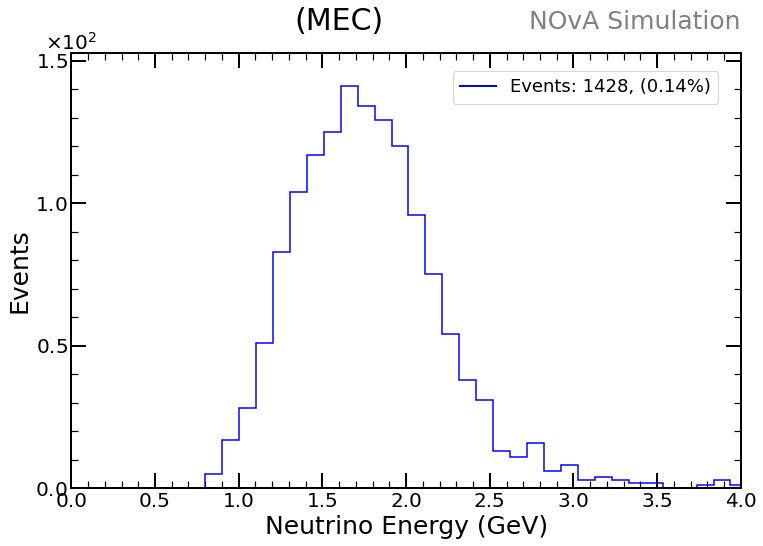

In [22]:
totnu=len(nupiNT_Res)+len(nupiNT_DIS)+len(nupiNT_MEC)+len(nupiNT_QE)
percentage=len(nupiNT_Res)*100/totnu
plt.figure(figsize=(12, 8)) 
#plt.hist(epiNT, bins=autobins(epiNT,0,2), edgecolor='black', linewidth=1.5, histtype='step', label='total')

plt.hist(nupiNT_Res, bins=autobins(nupiNT_Res), edgecolor='blue', histtype='step', linewidth=1.5)
plt.xlabel('Neutrino Energy (GeV)', fontsize=25)
plt.ylabel('Events', fontsize=25)
plt.title(f'(Res)',x=0.4,y=1.04, fontsize=30)
# plt.legend(fontsize=13, title_fontsize=13,loc='upper right', bbox_to_anchor=(0.98, 0.98))
set_plot_style()
set_sn2()


#change the number of ticks in the y axis
plt.locator_params(axis='y', nbins=4)
plt.xlim(0,4)

handles = [Line2D([0], [0], color='blue', lw=2)]
plt.legend(handles=handles, labels=[fr'Events: {len(nupiNT_Res)}, ({percentage:.2f}%)'], fontsize=18, loc='upper right', bbox_to_anchor=(0.98, 0.98))


# plt.savefig(f"{folder}/images/energiesperpionNT_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/nuenergies_NT_Res.png', bbox_inches='tight')
plt.show()   


percentage=len(nupiNT_DIS)*100/totnu
plt.figure(figsize=(12, 8)) 
#plt.hist(epiNT, bins=autobins(epiNT,0,2), edgecolor='black', linewidth=1.5, histtype='step', label='total')

plt.hist(nupiNT_DIS, bins=autobins(nupiNT_DIS), edgecolor='blue', histtype='step', linewidth=1.5)
plt.xlabel('Neutrino Energy (GeV)', fontsize=25)
plt.ylabel('Events', fontsize=25)
plt.title(f'(DIS)',x=0.4,y=1.04, fontsize=30)
# plt.legend(fontsize=13, title_fontsize=13,loc='upper right', bbox_to_anchor=(0.98, 0.98))
set_plot_style()
set_sn2()


#change the number of ticks in the y axis
plt.locator_params(axis='y', nbins=4)
plt.xlim(0,4)

handles = [Line2D([0], [0], color='blue', lw=2)]
plt.legend(handles=handles, labels=[fr'Events: {len(nupiNT_DIS)}, ({percentage:.2f}%)'], fontsize=18, loc='upper right', bbox_to_anchor=(0.98, 0.98))


# plt.savefig(f"{folder}/images/energiesperpionNT_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/nuenergies_NT_DIS.png', bbox_inches='tight')
plt.show() 


percentage=len(nupiNT_QE)*100/totnu
plt.figure(figsize=(12, 8)) 
#plt.hist(epiNT, bins=autobins(epiNT,0,2), edgecolor='black', linewidth=1.5, histtype='step', label='total')

plt.hist(nupiNT_QE, bins=autobins(nupiNT_QE), edgecolor='blue', histtype='step', linewidth=1.5)
plt.xlabel('Neutrino Energy (GeV)', fontsize=25)
plt.ylabel('Events', fontsize=25)
plt.title(f'(QE)',x=0.4,y=1.04, fontsize=30)
# plt.legend(fontsize=13, title_fontsize=13,loc='upper right', bbox_to_anchor=(0.98, 0.98))
set_plot_style()
set_sn2()


#change the number of ticks in the y axis
plt.locator_params(axis='y', nbins=4)
plt.xlim(0,4)

handles = [Line2D([0], [0], color='blue', lw=2)]
plt.legend(handles=handles, labels=[fr'Events: {len(nupiNT_QE)}, ({percentage:.2f}%)'], fontsize=18, loc='upper right', bbox_to_anchor=(0.98, 0.98))


# plt.savefig(f"{folder}/images/energiesperpionNT_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/nuenergies_NT_QE.png', bbox_inches='tight')
plt.show() 



percentage=len(nupiNT_MEC)*100/totnu
plt.figure(figsize=(12, 8)) 
#plt.hist(epiNT, bins=autobins(epiNT,0,2), edgecolor='black', linewidth=1.5, histtype='step', label='total')

plt.hist(nupiNT_MEC, bins=autobins(nupiNT_MEC), edgecolor='blue', histtype='step', linewidth=1.5)
plt.xlabel('Neutrino Energy (GeV)', fontsize=25)
plt.ylabel('Events', fontsize=25)
plt.title(f'(MEC)',x=0.4,y=1.04, fontsize=30)
# plt.legend(fontsize=13, title_fontsize=13,loc='upper right', bbox_to_anchor=(0.98, 0.98))
set_plot_style()
set_sn2()


#change the number of ticks in the y axis
plt.locator_params(axis='y', nbins=4)
plt.xlim(0,4)

handles = [Line2D([0], [0], color='blue', lw=2)]
plt.legend(handles=handles, labels=[fr'Events: {len(nupiNT_MEC)}, ({percentage:.2f}%)'], fontsize=18, loc='upper right', bbox_to_anchor=(0.98, 0.98))


# plt.savefig(f"{folder}/images/energiesperpionNT_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/nuenergies_NT_MEC.png', bbox_inches='tight')
plt.show() 

In [109]:

#This is for the full un analysised pions energy

start_time = time.time()


folders=['Res','DIS','QE','MEC']

epiNT_Res=[]
epiNT_QE=[]
epiNT_MEC=[]
epiNT_DIS=[]
epi1NT=[]
epi2NT=[]
epi3NT=[]
epi4NT=[]
epi5NT=[]
epi6NT=[]



for folder in folders:
    
    temp0=read_file(folder, 'energiesvarsNT_total')
    if folder=='Res':
        for event in temp0:
            event=event[1:-1]
            l=len(event)
            for i in range(l):
                epiNT_Res.append(float(event[i])-0.139)
    
    if folder=='DIS':
        for event in temp0:
            event=event[1:-1]
            l=len(event)
            for i in range(l):
                epiNT_DIS.append(float(event[i])-0.139)
            
    if folder=='MEC':
        for event in temp0:
            event=event[1:-1]
            l=len(event)
            for i in range(l):
                epiNT_MEC.append(float(event[i])-0.139)
            
    if folder=='QE':
        for event in temp0:
            event=event[1:-1]
            l=len(event)
            for i in range(l):
                epiNT_QE.append(float(event[i])-0.139)

    temp1=read_file(folder, 'energies1varsNT_total')
    for event in temp1:
        event = event[1:-1]
        l = len(event)
        for i in range(l):
            epi1NT.append(float(event[i])-0.139)
    temp2=read_file(folder, 'energies2varsNT_total')
    for event in temp2:
        event = event[1:-1]
        l = len(event)
        for i in range(l):
            epi2NT.append(float(event[i])-0.139)
    temp3=read_file(folder, 'energies3varsNT_total')
    for event in temp3:
        event = event[1:-1]
        l = len(event)
        for i in range(l):
            epi3NT.append(float(event[i])-0.139)
    temp4=read_file(folder, 'energies4varsNT_total')
    for event in temp4:
        event = event[1:-1]
        l = len(event)
        for i in range(l):
            epi4NT.append(float(event[i])-0.139)
    temp5=read_file(folder, 'energies5varsNT_total')
    for event in temp5:
        event = event[1:-1]
        l = len(event)
        for i in range(l):
            epi5NT.append(float(event[i])-0.139)
    temp6=read_file(folder, 'energies6varsNT_total')
    for event in temp6:
        event = event[1:-1]
        l = len(event)
        for i in range(l):
            epi6NT.append(float(event[i])-0.139)
    
#     epi1NT.extend([float(element)-0.139 for sublist in temp for element in sublist])
#     temp2=read_file(folder, 'analysisfiles/nue_part1')
#     epi2NT.extend([float(element)-0.139 for sublist in temp for element in sublist])
#     temp3=read_file(folder, 'analysisfiles/nue_part1')
#     epi3NT.extend([float(element)-0.139 for sublist in temp for element in sublist])
#     temp4=read_file(folder, 'analysisfiles/nue_part1')
#     epi4NT.extend([float(element)-0.139 for sublist in temp for element in sublist])
#     temp5=read_file(folder, 'analysisfiles/nue_part1')
#     epi5NT.extend([float(element)-0.139 for sublist in temp for element in sublist])
#     temp6=read_file(folder, 'analysisfiles/nue_part1')
#     epi6NT.extend([float(element)-0.139 for sublist in temp for element in sublist])
    
        
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 6.933849096298218 seconds


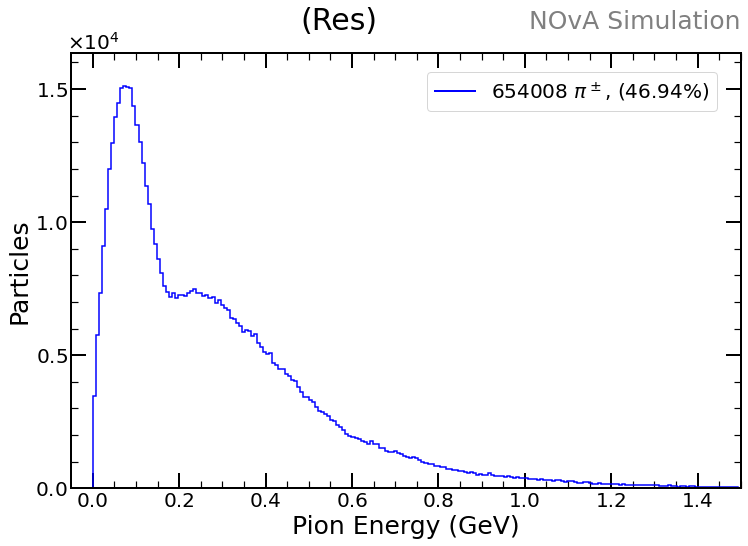

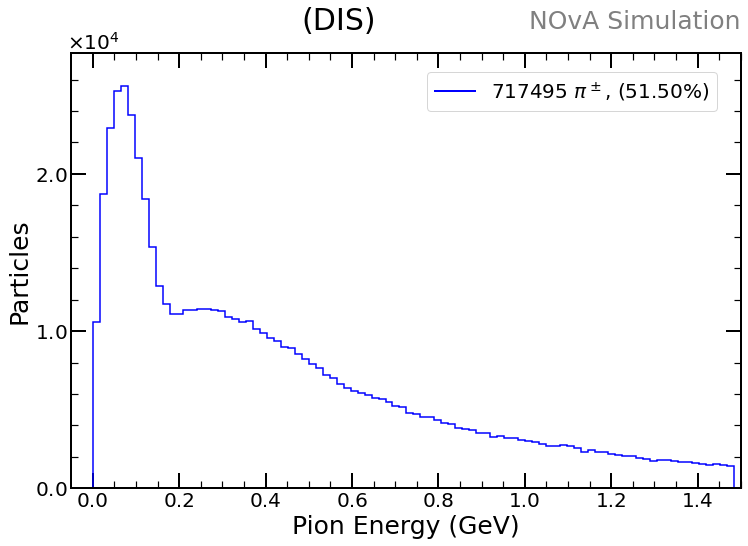

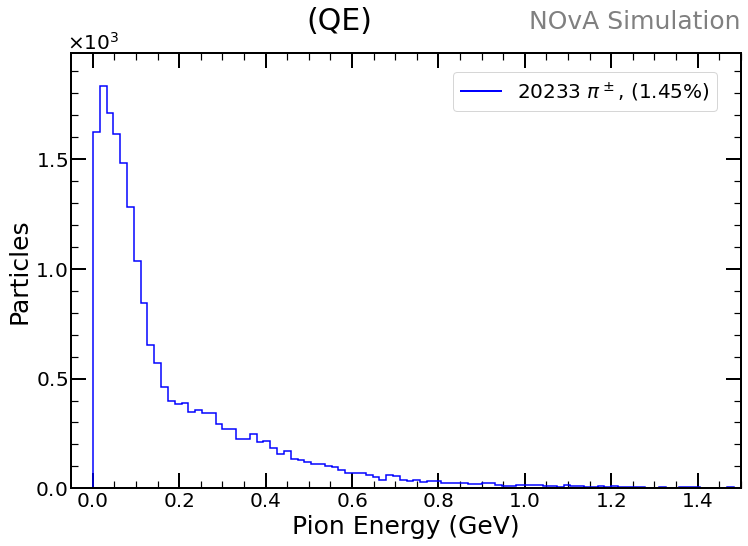

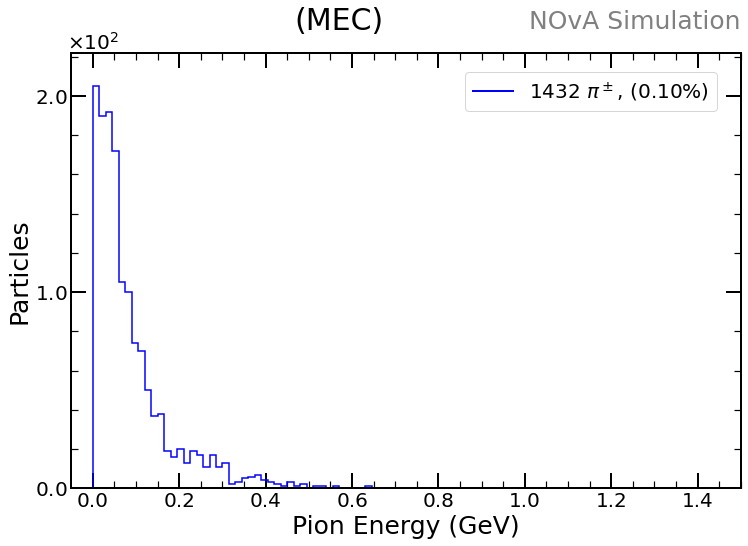

In [111]:
# plot individual energy spectras:

totpi=len(epiNT_Res)+len(epiNT_DIS)+len(epiNT_MEC)+len(epiNT_QE)
percentage=len(epiNT_Res)*100/totpi
plt.figure(figsize=(12, 8)) 
#plt.hist(epiNT, bins=autobins(epiNT,0,2), edgecolor='black', linewidth=1.5, histtype='step', label='total')

plt.hist(epiNT_Res, bins=autobins(epiNT_Res,0,1.5), edgecolor='blue', histtype='step', linewidth=1.5)
plt.xlabel('Pion Energy (GeV)', fontsize=25)
plt.ylabel('Particles', fontsize=25)
plt.title('(Res)',x=0.4,y=1.04, fontsize=30)
set_plot_style()
set_sn2()


#change the number of ticks in the y axis
plt.locator_params(axis='y', nbins=4)
plt.xlim(-0.05,1.5)
handles = [Line2D([0], [0], color='blue', lw=2)]
plt.legend(handles=handles, labels=[fr'{len(epiNT_Res)} $\pi^\pm$, ({percentage:.2f}%)'], fontsize=20, loc='upper right', bbox_to_anchor=(0.98, 0.98))

# plt.legend(title='Pions / Event', fontsize=13, title_fontsize=13)
# plt.legend(fontsize=13, title_fontsize=13,loc='upper right', bbox_to_anchor=(0.98, 0.98))

# plt.savefig(f"{folder}/images/energiesperpionNT_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/pion_energy_Res.png', bbox_inches='tight')
plt.show()   





percentage=len(epiNT_DIS)*100/totpi
plt.figure(figsize=(12, 8)) 
#plt.hist(epiNT, bins=autobins(epiNT,0,2), edgecolor='black', linewidth=1.5, histtype='step', label='total')

plt.hist(epiNT_DIS, bins=autobins(epiNT_DIS,0,1.5), edgecolor='blue', histtype='step', linewidth=1.5)
plt.xlabel('Pion Energy (GeV)', fontsize=25)
plt.ylabel('Particles', fontsize=25)
plt.title('(DIS)',x=0.4,y=1.04, fontsize=30)
set_plot_style()
set_sn2()


#change the number of ticks in the y axis
plt.locator_params(axis='y', nbins=4)
plt.xlim(-0.05,1.5)


handles = [Line2D([0], [0], color='blue', lw=2)]
plt.legend(handles=handles, labels=[fr'{len(epiNT_DIS)} $\pi^\pm$, ({percentage:.2f}%)'], fontsize=20, loc='upper right', bbox_to_anchor=(0.98, 0.98))

# plt.savefig(f"{folder}/images/energiesperpionNT_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/pion_energy_DIS.png', bbox_inches='tight')
plt.show()   





percentage=len(epiNT_QE)*100/totpi
plt.figure(figsize=(12, 8)) 
#plt.hist(epiNT, bins=autobins(epiNT,0,2), edgecolor='black', linewidth=1.5, histtype='step', label='total')

plt.hist(epiNT_QE, bins=autobins(epiNT_QE,0,1.5), edgecolor='blue', histtype='step', linewidth=1.5)
plt.xlabel('Pion Energy (GeV)', fontsize=25)
plt.ylabel('Particles', fontsize=25)
plt.title('(QE)',x=0.4,y=1.04, fontsize=30)
set_plot_style()
set_sn2()


#change the number of ticks in the y axis
plt.locator_params(axis='y', nbins=4)
plt.xlim(-0.05,1.5)


handles = [Line2D([0], [0], color='blue', lw=2)]
plt.legend(handles=handles, labels=[fr'{len(epiNT_QE)} $\pi^\pm$, ({percentage:.2f}%)'], fontsize=20, loc='upper right', bbox_to_anchor=(0.98, 0.98))


# plt.savefig(f"{folder}/images/energiesperpionNT_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/pion_energy_QE.png', bbox_inches='tight')
plt.show()   





percentage=len(epiNT_MEC)*100/totpi
plt.figure(figsize=(12, 8)) 
#plt.hist(epiNT, bins=autobins(epiNT,0,2), edgecolor='black', linewidth=1.5, histtype='step', label='total')

plt.hist(epiNT_MEC, bins=autobins(epiNT_MEC,0,1.5), edgecolor='blue', histtype='step', linewidth=1.5)
plt.xlabel('Pion Energy (GeV)', fontsize=25)
plt.ylabel('Particles', fontsize=25)
plt.title('(MEC)',x=0.4,y=1.04, fontsize=30)
# plt.legend(fontsize=13, title_fontsize=13,loc='upper right', bbox_to_anchor=(0.98, 0.98))
set_plot_style()
set_sn2()


#change the number of ticks in the y axis
plt.locator_params(axis='y', nbins=4)
plt.xlim(-0.05,1.5)

handles = [Line2D([0], [0], color='blue', lw=2)]
plt.legend(handles=handles, labels=[fr'{len(epiNT_MEC)} $\pi^\pm$, ({percentage:.2f}%)'], fontsize=20, loc='upper right', bbox_to_anchor=(0.98, 0.98))


# plt.savefig(f"{folder}/images/energiesperpionNT_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/pion_energy_MEC.png', bbox_inches='tight')
plt.show()   


#now also the heatmaps





In [40]:


# Calculate histograms and find max values
hist1, bins1 = np.histogram(epi1NT, bins=autobins(epi1NT, 0, 1.5))
hist2, bins2 = np.histogram(epi2NT, bins=autobins(epi1NT, 0, 1.5))
hist3, bins3 = np.histogram(epi3NT, bins=autobins(epi1NT, 0, 1.5))
hist4, bins4 = np.histogram(epi4NT, bins=autobins(epi1NT, 0, 1.5))
hist5, bins5 = np.histogram(epi5NT, bins=autobins(epi1NT, 0, 1.5))
hist6, bins6 = np.histogram(epi6NT, bins=autobins(epi1NT, 0, 1.5))

peak1 = bins1[np.argmax(hist1)]
peak2 = bins2[np.argmax(hist2)]
peak3 = bins3[np.argmax(hist3)]
peak4 = bins4[np.argmax(hist4)]
peak5 = bins5[np.argmax(hist5)]
peak6 = bins6[np.argmax(hist6)]

print(f'Peak value of histogram for epi1NT: {peak1}')
print(f'Peak value of histogram for epi2NT: {peak2}')
print(f'Peak value of histogram for epi3NT: {peak3}')
print(f'Peak value of histogram for epi4NT: {peak4}')
print(f'Peak value of histogram for epi5NT: {peak5}')
print(f'Peak value of histogram for epi6NT: {peak6}')


def calculate_percentage(data, threshold):
    below_threshold = np.sum(np.array(data) < threshold)
    above_threshold = np.sum(np.array(data) >= threshold)
    total = len(data)
    return (below_threshold / total) * 100, (above_threshold / total) * 100

percent_below_0_2_1, percent_above_0_2_1 = calculate_percentage(epi1NT, 0.18)
percent_below_0_2_2, percent_above_0_2_2 = calculate_percentage(epi2NT, 0.18)
percent_below_0_2_3, percent_above_0_2_3 = calculate_percentage(epi3NT, 0.18)
percent_below_0_2_4, percent_above_0_2_4 = calculate_percentage(epi4NT, 0.18)
percent_below_0_2_5, percent_above_0_2_5 = calculate_percentage(epi5NT, 0.18)
percent_below_0_2_6, percent_above_0_2_6 = calculate_percentage(epi6NT, 0.18)

print(f'Percentage of data below 0.2 for epi1NT: {percent_below_0_2_1:.2f}%')
print(f'Percentage of data above 0.2 for epi1NT: {percent_above_0_2_1:.2f}%')
print(f'Percentage of data below 0.2 for epi2NT: {percent_below_0_2_2:.2f}%')
print(f'Percentage of data above 0.2 for epi2NT: {percent_above_0_2_2:.2f}%')
print(f'Percentage of data below 0.2 for epi3NT: {percent_below_0_2_3:.2f}%')
print(f'Percentage of data above 0.2 for epi3NT: {percent_above_0_2_3:.2f}%')
print(f'Percentage of data below 0.2 for epi4NT: {percent_below_0_2_4:.2f}%')
print(f'Percentage of data above 0.2 for epi4NT: {percent_above_0_2_4:.2f}%')
print(f'Percentage of data below 0.2 for epi5NT: {percent_below_0_2_5:.2f}%')
print(f'Percentage of data above 0.2 for epi5NT: {percent_above_0_2_5:.2f}%')
print(f'Percentage of data below 0.2 for epi6NT: {percent_below_0_2_6:.2f}%')
print(f'Percentage of data above 0.2 for epi6NT: {percent_above_0_2_6:.2f}%')


# Concatenate all data into a single array
all_data = np.concatenate([epi1NT, epi2NT, epi3NT, epi4NT, epi5NT, epi6NT])

# Calculate percentage of data below and above 0.2 for all combined data

percent_below_0_2_all, percent_above_0_2_all = calculate_percentage(all_data, 0.18)

print(f'Percentage of combined data below 0.2: {percent_below_0_2_all:.2f}%')
print(f'Percentage of combined data above 0.2: {percent_above_0_2_all:.2f}%')


Peak value of histogram for epi1NT: 0.07894736842105263
Peak value of histogram for epi2NT: 0.06140350877192982
Peak value of histogram for epi3NT: 0.05263157894736842
Peak value of histogram for epi4NT: 0.05263157894736842
Peak value of histogram for epi5NT: 0.07017543859649122
Peak value of histogram for epi6NT: 0.06140350877192982
Percentage of data below 0.2 for epi1NT: 35.81%
Percentage of data above 0.2 for epi1NT: 64.19%
Percentage of data below 0.2 for epi2NT: 41.03%
Percentage of data above 0.2 for epi2NT: 58.97%
Percentage of data below 0.2 for epi3NT: 33.29%
Percentage of data above 0.2 for epi3NT: 66.71%
Percentage of data below 0.2 for epi4NT: 28.43%
Percentage of data above 0.2 for epi4NT: 71.57%
Percentage of data below 0.2 for epi5NT: 25.55%
Percentage of data above 0.2 for epi5NT: 74.45%
Percentage of data below 0.2 for epi6NT: 25.55%
Percentage of data above 0.2 for epi6NT: 74.45%
Percentage of combined data below 0.2: 36.07%
Percentage of combined data above 0.2: 63.

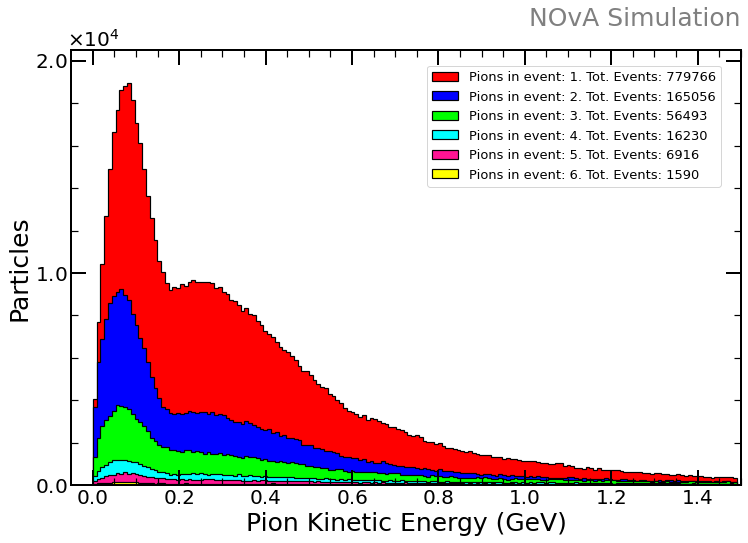

In [14]:
# Define histogram parameters
#bin_size = 0.025
#bin_edges = np.arange(0, 1.7, bin_size) 
    
#Epi for PNG nocvn
plt.figure(figsize=(12, 8)) 
#plt.hist(epiNT, bins=autobins(epiNT,0,2), edgecolor='black', linewidth=1.5, histtype='step', label='total')

plt.hist(epi1NT, bins=autobins(epi1NT,0,1.5), edgecolor='black', histtype='stepfilled', linewidth=1.2, alpha=1, label=f'Pions in event: 1. Tot. Events: {len(epi1NT)+6}', color='red')
plt.hist(epi2NT, bins=autobins(epi1NT,0,1.5), edgecolor='black', histtype='stepfilled', linewidth=1.2, alpha=1, label=f'Pions in event: 2. Tot. Events: {int(len(epi2NT)/2)}', color='blue')
plt.hist(epi3NT, bins=autobins(epi1NT,0,1.5), edgecolor='black', histtype='stepfilled', linewidth=1.2, alpha=1, label=f'Pions in event: 3. Tot. Events: {int(len(epi3NT)/3)}', color='lime')
plt.hist(epi4NT, bins=autobins(epi1NT,0,1.5), edgecolor='black', histtype='stepfilled', linewidth=1.2, alpha=1, label=f'Pions in event: 4. Tot. Events: {int(len(epi4NT)/4)}', color='cyan')
plt.hist(epi5NT, bins=autobins(epi1NT,0,1.5), edgecolor='black', histtype='stepfilled', linewidth=1.2, alpha=1, label=f'Pions in event: 5. Tot. Events: {int(len(epi5NT)/5)}', color='deeppink')
plt.hist(epi6NT, bins=autobins(epi1NT,0,1.5), edgecolor='black', histtype='stepfilled', linewidth=1.2, alpha=1, label=f'Pions in event: 6. Tot. Events: {int(len(epi6NT)/6)}', color='yellow')
plt.xlabel('Pion Kinetic Energy (GeV)', fontsize=25)
plt.ylabel('Particles', fontsize=25)
#plt.title('True energy of charged pions', fontsize=30)
set_plot_style()
set_sn2()


#change the number of ticks in the y axis
plt.locator_params(axis='y', nbins=4)
plt.xlim(-0.05,1.5)


# plt.legend(title='Pions / Event', fontsize=13, title_fontsize=13)
plt.legend(fontsize=13, title_fontsize=13,loc='upper right', bbox_to_anchor=(0.98, 0.98))

# plt.savefig(f"{folder}/images/energiesperpionNT_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/energiesperpionNT_total.png', bbox_inches='tight')
plt.show()   


In [11]:
#now the full un cut neutrino energy
start_time = time.time()
folders=['Res','DIS','QE','MEC']

numpis=[]
#store the list of NT original numpi
#store the list of Reco numpi
for folder in folders:
    temp=read_file(folder, 'pdgntvars_total')
    for event in temp:
        npi=0
        for x in event:
            if x == '211' or x == '-211':
                npi = npi+1
        numpis.append(npi)

nuEfull = []
for folder in folders:
    temp1=read_file(folder, 'nuevarsNT_total')
    for event in temp1:
        nuEfull.append(float(event[1]))
    
    
nuesAllpion = []

nues = [[] for _ in range(6)]

pos =0
for npi in numpis:
    if npi >= 1:
        nuesAllpion.append(nuEfull[pos])
    if npi <= 5:
        nues[npi].append(nuEfull[pos])
    pos = pos + 1

    

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 6.490821599960327 seconds


In [12]:
#filling all the lists with equal number of data to normalize it.
import random

#Save original len 
numpi=[]

for i in range(len(nues)):
    numpi.append(len(nues[i]))

maxim=len(nues[1])
for i, lists in enumerate(nues):
    if len(lists) != 0:
        if len(lists) < maxim:
            n = maxim - len(lists)
            for _ in range(n):
                nues[i].append(random.uniform(3.7, 5))

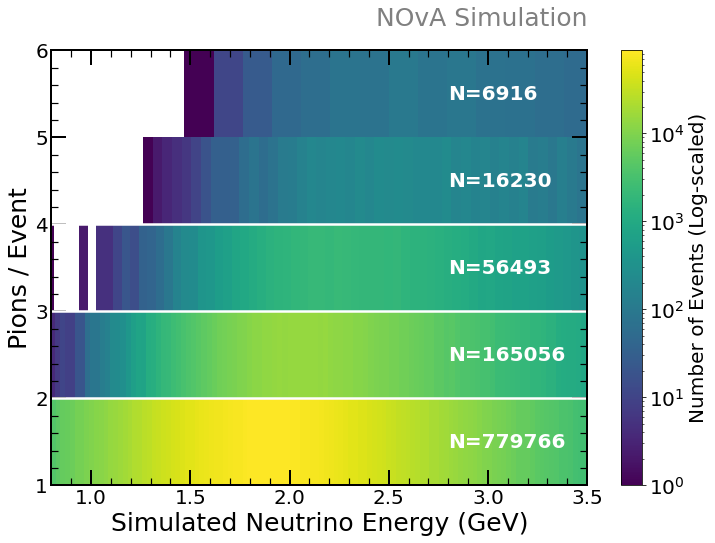

In [13]:
#heatmap with normalization
from matplotlib.colors import LogNorm
xstart=0
xend=5

bbins = []

bbins.append(np.linspace(xstart, xend, 100))
bbins.append(np.linspace(xstart, xend, numbins(nues[1],0, 3.5)))
bbins.append(np.linspace(xstart, xend, numbins(nues[2],0, 3.5)))
bbins.append(np.linspace(xstart, xend, numbins(nues[3],0, 1.8)))
bbins.append(np.linspace(xstart, xend, numbins(nues[4],0, 1.5)))
bbins.append(np.linspace(xstart, xend, numbins(nues[5],0, 0.5)))
# print(len(bbins[1]))
# print(lensR[1])
# print(len(bbins[2]))
# print(lensR[2])
# print(len(bbins[3]))
# print(lensR[3])
# print(len(bbins[4]))
# print(lensR[4])
# for i in range(len(episnt)):
#     if i==0:
#         bbins.append(np.linspace(xstart, xend, 100))
#     else:
#         bbins.append(np.linspace(xstart, xend, numbins(episnt[i],0, 1.6)))

# Define y values
y_values = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

# Define number of pions per event
num_pions_per_event = [len(nue) for nue in nues]

plt.figure(figsize=(12,8)) 

# Plot each histogram
for i, (nue, y_value, num_pions, bbin) in enumerate(zip(nues, y_values, num_pions_per_event, bbins), start=1):
    plt.hist2d(nue, np.zeros_like(nue)+y_value, bins=[bbin, 1], cmap='viridis',norm=LogNorm())
#     if i > 1:
#         cbar = plt.colorbar()
    if i!=1:
        plt.text(2.8, y_value, f'N={int(numpi[i-1]*(i-1)/(i-1))}', color='white', fontsize=20, ha='left', va='center', fontweight='bold')
#         plt.text(1.38, y_value, f'N={lensR[i-1]}', color='white', fontsize=20, ha='left', va='center', fontweight='bold')

colorbar= plt.colorbar(label='Number of Events (Log-scaled)')
colorbar.ax.yaxis.label.set_fontsize(20) 
colorbar.ax.tick_params(labelsize=20)
# Add NOνA Simulation text inside the plot square at the title position
#plt.text(1.0, 1.05, 'NOvA Simulation', fontsize=30, color='gray', ha='right', va='top', transform=plt.gca().transAxes)

#change the number of ticks in the y axis

#plt.tick_params(axis='both', which='major', length=20, width=1.5, direction='in')
set_plot_style()
plt.locator_params(axis='y', nbins=6)

#plt.colorbar(label='Frequency')
plt.xlabel('Simulated Neutrino Energy (GeV)', fontsize=25)
plt.ylabel('Pions / Event',fontsize=25)
plt.ylim(1, 6)
plt.xlim(0.8,3.5)
# plt.title(f'ND',x=0.4, y=1.03,fontsize=30)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)
plt.axhline(y=2, color='white', linewidth=2.5)
plt.axhline(y=3, color='white', linewidth=2.5)
plt.axhline(y=4, color='white', linewidth=2.5)
# Add the image
# image_path = 'novastyle.png'  # Specify the path to your image file
# plt.figimage(plt.imread(image_path), 345, 505, alpha=1)
# plt.savefig(f"poster/heatmapTotal_true_Energy_NoRecoPions.png", bbox_inches='tight')
# plt.savefig(f"poster/heatmapTotal_true_Energy_NoRecoPions.pdf", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/heatmapNeutrinoEnergyperevent_total.png', bbox_inches='tight')
plt.show()

In [14]:
#lets extract the heatmaps for neutrinos full
#EXTRACTING THE NEUTRINO ENERGY FOR THE EVENTS WITH DETECTED PIONS
#Here Im looking that the same amount of nt events are in reco events to avoid counting unidentified pions.

start_time = time.time()


folders=['Res','DIS','QE','MEC']

nue_d=[]
numpiNT = []
numpiReco = []
#store the list of NT original numpi
#store the list of Reco numpi
for folder in folders:
    temp=read_file(folder, 'analysisfiles/nue_part1')
    nue_d.extend([float(element) for sublist in temp for element in sublist])
    temp2=read_file(folder, 'analysisfiles/numpiNT_part1')
    numpiNT.extend([int(element) for sublist in temp2 for element in sublist])
    temp3=read_file(folder, 'analysisfiles/numpiReco_part1')
    numpiReco.extend([int(element) for sublist in temp3 for element in sublist])


    
    
#then I'll save 2 lists, one with only the info of the 1to1 pions and other with same numpi in NT and Reco

j=0
nue_d_1pion = []
for event in nue_d:
    if numpiNT[j] == 1 and numpiReco[j] == 1:
        nue_d_1pion.append(event)
    j = j+1
    
    
#save the info of the nu energies per number of pion in event   
nues = [[] for _ in range(4)]
j=0
nue_d_pi2pi = []
for i, event in enumerate(nue_d):
    if numpiNT[i] < len(nues):
        if numpiNT[i] == numpiReco[i]:
            #append in the all pi2pi list
            nue_d_pi2pi.append(event)
            #then append in the separate numpi list for the heatmap
            #this list is keeping only the cases where all neutrinos are reconstructed. 
            nues[numpiReco[i]].append(event)


end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 1.5331425666809082 seconds


In [15]:
#filling all the lists with equal number of data to normalize it.
import random

#Save original len 
numpi=[]

for i in range(len(nues)):
    numpi.append(len(nues[i]))

maxim=len(nues[1])
for i, lists in enumerate(nues):
    if len(lists) != 0:
        if len(lists) < maxim:
            n = maxim - len(lists)
            for _ in range(n):
                nues[i].append(random.uniform(3.7, 5))

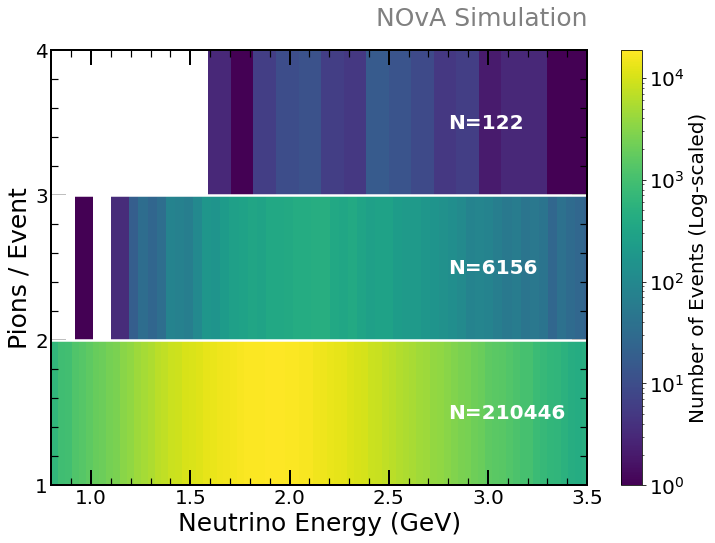

In [16]:
#heatmap with normalization
from matplotlib.colors import LogNorm
xstart=0
xend=5

bbins = []

bbins.append(np.linspace(xstart, xend, 100))
bbins.append(np.linspace(xstart, xend, numbins(nues[1],0, 3.5)))
bbins.append(np.linspace(xstart, xend, numbins(nues[2],0, 2.5)))
bbins.append(np.linspace(xstart, xend, numbins(nues[3],0, 1)))
# bbins.append(np.linspace(xstart, xend, numbins(nues[4],0, 1.5)))
# bbins.append(np.linspace(xstart, xend, numbins(nues[5],0, 0.5)))
# print(len(bbins[1]))
# print(lensR[1])
# print(len(bbins[2]))
# print(lensR[2])
# print(len(bbins[3]))
# print(lensR[3])
# print(len(bbins[4]))
# print(lensR[4])
# for i in range(len(episnt)):
#     if i==0:
#         bbins.append(np.linspace(xstart, xend, 100))
#     else:
#         bbins.append(np.linspace(xstart, xend, numbins(episnt[i],0, 1.6)))

# Define y values
y_values = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

# Define number of pions per event
num_pions_per_event = [len(nue) for nue in nues]

plt.figure(figsize=(12,8)) 

# Plot each histogram
for i, (nue, y_value, num_pions, bbin) in enumerate(zip(nues, y_values, num_pions_per_event, bbins), start=1):
    plt.hist2d(nue, np.zeros_like(nue)+y_value, bins=[bbin, 1], cmap='viridis',norm=LogNorm())
#     if i > 1:
#         cbar = plt.colorbar()
    if i!=1:
        plt.text(2.8, y_value, f'N={int(numpi[i-1]*(i-1)/(i-1))}', color='white', fontsize=20, ha='left', va='center', fontweight='bold')
        
#     if i!=1:
#         plt.text(1.1, y_value, f'N={(i-1)*num_pions}', color='white', fontsize=20, ha='left', va='center', fontweight='bold')
#         plt.text(1.38, y_value, f'N={lensR[i-1]}', color='white', fontsize=20, ha='left', va='center', fontweight='bold')

colorbar= plt.colorbar(label='Number of Events (Log-scaled)')
colorbar.ax.yaxis.label.set_fontsize(20) 
colorbar.ax.tick_params(labelsize=20)
# Add NOνA Simulation text inside the plot square at the title position
#plt.text(1.0, 1.05, 'NOvA Simulation', fontsize=30, color='gray', ha='right', va='top', transform=plt.gca().transAxes)

#change the number of ticks in the y axis

#plt.tick_params(axis='both', which='major', length=20, width=1.5, direction='in')
set_plot_style()
plt.locator_params(axis='y', nbins=4)

#plt.colorbar(label='Frequency')
plt.xlabel('Neutrino Energy (GeV)', fontsize=25)
plt.ylabel('Pions / Event',fontsize=25)
plt.ylim(1, 4)
plt.xlim(0.8,3.5)
# plt.title(f'ND',x=0.4, y=1.03,fontsize=30)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)
plt.axhline(y=2, color='white', linewidth=2.5)
plt.axhline(y=3, color='white', linewidth=2.5)
# plt.savefig(f"/analysisfiles/images/hetamapNeutrinoEnergy_fordetectedPions_part1.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/hetamapNeutrinoEnergy_fordetectedPions_part1_total.png', bbox_inches='tight')

plt.show()

In [17]:
#EXTRACTING THE NEUTRINO ENERGY FOR THE EVENTS WITH UNDETECTED PIONS
start_time = time.time()


start_time = time.time()


folders=['Res','DIS','QE','MEC']

nue_u=[]
numpint = []
numpiReco = []
#store the list of NT original numpi
#store the list of Reco numpi
for folder in folders:
    temp=read_file(folder, 'analysisfiles/nue_part2')
    nue_u.extend([float(element) for sublist in temp for element in sublist])
    temp2=read_file(folder, 'analysisfiles/numpiNT_part2')
    numpint.extend([int(element) for sublist in temp2 for element in sublist])
    temp3=read_file(folder, 'analysisfiles/numpiReco_part2')
    numpiReco.extend([int(element) for sublist in temp3 for element in sublist])

    

    
#save the info of the nu energies per number of pion in event   
nues = [[] for _ in range(7)]
j=0
nue_u_pi2Nopi = []
for i, event in enumerate(nue_u):
    if numpint[i] < len(nues):
        if numpiReco[i] == 0:
            #append in the all pi2pi list
            nue_u_pi2Nopi.append(event)
            #then append in the separate numpi list for the heatmap
            nues[numpint[i]].append(event)


#save the info of the nu energies per number of pion in event   
#nues = [[] for _ in range(15)]

#pos=0
#for element in numpint:
#    nues[element].append(nue_u[pos])
#    pos=pos+1
    
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 3.6823244094848633 seconds


In [18]:
#filling all the lists with equal number of data to normalize it.
import random

#Save original len 
numpi=[]

for i in range(len(nues)):
    numpi.append(len(nues[i]))
    
    
maxim=len(nues[1])
for i, lists in enumerate(nues):
    if len(lists) != 0:
        if len(lists) < maxim:
            n = maxim - len(lists)
            for _ in range(n):
                nues[i].append(random.uniform(3.7, 5))

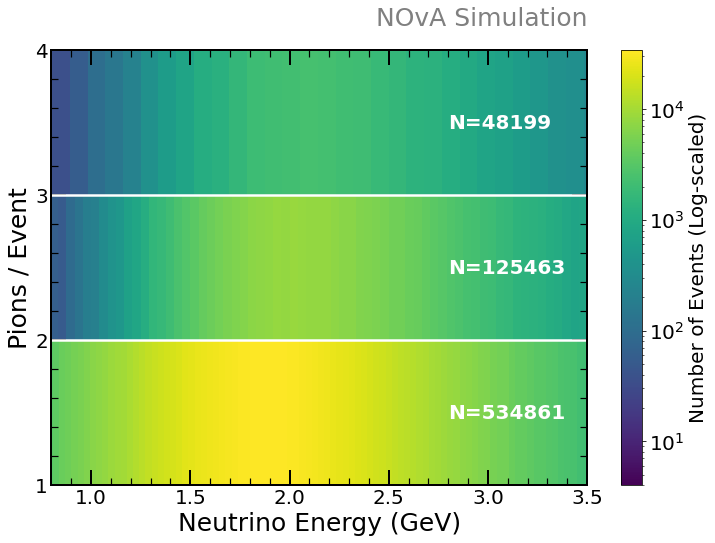

In [19]:
#heatmap with normalization
from matplotlib.colors import LogNorm
xstart=0
xend=5

bbins = []

bbins.append(np.linspace(xstart, xend, 100))
bbins.append(np.linspace(xstart, xend, numbins(nues[1],0, 3.5)))
bbins.append(np.linspace(xstart, xend, numbins(nues[2],0, 2.5)))
bbins.append(np.linspace(xstart, xend, numbins(nues[3],0, 1)))
# bbins.append(np.linspace(xstart, xend, numbins(nues[4],0, 1.5)))
# bbins.append(np.linspace(xstart, xend, numbins(nues[5],0, 0.5)))
# print(len(bbins[1]))
# print(lensR[1])
# print(len(bbins[2]))
# print(lensR[2])
# print(len(bbins[3]))
# print(lensR[3])
# print(len(bbins[4]))
# print(lensR[4])
# for i in range(len(episnt)):
#     if i==0:
#         bbins.append(np.linspace(xstart, xend, 100))
#     else:
#         bbins.append(np.linspace(xstart, xend, numbins(episnt[i],0, 1.6)))

# Define y values
y_values = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

# Define number of pions per event
num_pions_per_event = [len(nue) for nue in nues]

plt.figure(figsize=(12,8)) 

# Plot each histogram
for i, (nue, y_value, num_pions, bbin) in enumerate(zip(nues, y_values, num_pions_per_event, bbins), start=1):
    plt.hist2d(nue, np.zeros_like(nue)+y_value, bins=[bbin, 1], cmap='viridis',norm=LogNorm())
#     if i > 1:
#         cbar = plt.colorbar()
    if i!=1:
        plt.text(2.8, y_value, f'N={int(numpi[i-1]*(i-1)/(i-1))}', color='white', fontsize=20, ha='left', va='center', fontweight='bold')
#     if i!=1:
#         plt.text(1.1, y_value, f'N={(i-1)*num_pions}', color='white', fontsize=20, ha='left', va='center', fontweight='bold')
#         plt.text(1.38, y_value, f'N={lensR[i-1]}', color='white', fontsize=20, ha='left', va='center', fontweight='bold')

colorbar= plt.colorbar(label='Number of Events (Log-scaled)')
colorbar.ax.yaxis.label.set_fontsize(20) 
colorbar.ax.tick_params(labelsize=20)
# Add NOνA Simulation text inside the plot square at the title position
#plt.text(1.0, 1.05, 'NOvA Simulation', fontsize=30, color='gray', ha='right', va='top', transform=plt.gca().transAxes)

#change the number of ticks in the y axis

#plt.tick_params(axis='both', which='major', length=20, width=1.5, direction='in')
set_plot_style()
plt.locator_params(axis='y', nbins=4)

#plt.colorbar(label='Frequency')
plt.xlabel('Neutrino Energy (GeV)', fontsize=25)
plt.ylabel('Pions / Event',fontsize=25)
plt.ylim(1, 4)
plt.xlim(0.8,3.5)
# plt.title(f'ND',x=0.4, y=1.03,fontsize=30)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)
plt.axhline(y=2, color='white', linewidth=2.5)
plt.axhline(y=3, color='white', linewidth=2.5)
#plt.savefig(f"{folder}/analysisfiles/images/hetamapNeutrinoEnergy_fornodetectedPions_part2.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/hetamapNeutrinoEnergy_fornodetectedPions_part2_total.png', bbox_inches='tight')

plt.show()

In [75]:
#LETS DO THE VVN VS ENERGIES FOR THE WHOLE DATASET
start_time = time.time()

folders=['Res','DIS','MEC','QE']


energiesnt=[]
calenergies=[]
cvn=[]

for folder in folders:
    temp1=[]
    temp2=[]
    temp3=[]
    temp1=read_file(folder, 'analysisfiles/energiesNT_part1')
    energiesnt.extend([float(element)-0.138 for sublist in temp1 for element in sublist])  
    temp2=read_file(folder, 'analysisfiles/calenergies_part1')
    calenergies.extend([float(element) for sublist in temp2 for element in sublist]) 
    temp3=read_file(folder, 'analysisfiles/CVN_part1')
    cvn.extend([float(element) for sublist in temp3 for element in sublist])
            
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 2.414531946182251 seconds


In [42]:
print(max(energiesnt))

16.2765


In [77]:
#in this case, the region if interest is for values between cvn 0.8 and 1, and for 0.2 and 0.65
count=0
for i, element in enumerate(energiesnt):
    if 0.2 < element < 0.65:
        if 0.8 < cvn[i] < 1:
            count=count +1
            
percentage=count*100/len(energiesnt)
print(f'The amount of data in this region is: {count}, representing: {percentage:.2f}%')
#and for cvn below 0.25
count=0
for i, element in enumerate(energiesnt):
    if 0.2 < element < 0.65:
        if 0 < cvn[i] < 0.25:
            count=count +1
percentage=count*100/len(energiesnt)
print(f'The amount of data in this region is: {count}, representing: {percentage:.2f}%')


#in this case, the region if interest is for values between cvn 0.8 and 1, and for 0.2 and 0.6
count=0
for i, element in enumerate(calenergies):
    if 0.1 < element < 0.5:
        if 0.8 < cvn[i] < 1:
            count=count +1
            
percentage=count*100/len(calenergies)
print(f'The amount of data cale in this region is: {count}, representing: {percentage:.2f}%')

#and for cvn below 0.25
count=0
for i, element in enumerate(calenergies):
    if 0.1 < element < 0.5:
        if 0 < cvn[i] < 0.25:
            count=count +1
            
percentage=count*100/len(calenergies)
print(f'The amount of data cale in this region is: {count}, representing: {percentage:.2f}%')

The amount of data in this region is: 89682, representing: 29.28%
The amount of data in this region is: 13489, representing: 4.40%
The amount of data cale in this region is: 96176, representing: 31.40%
The amount of data cale in this region is: 14982, representing: 4.89%


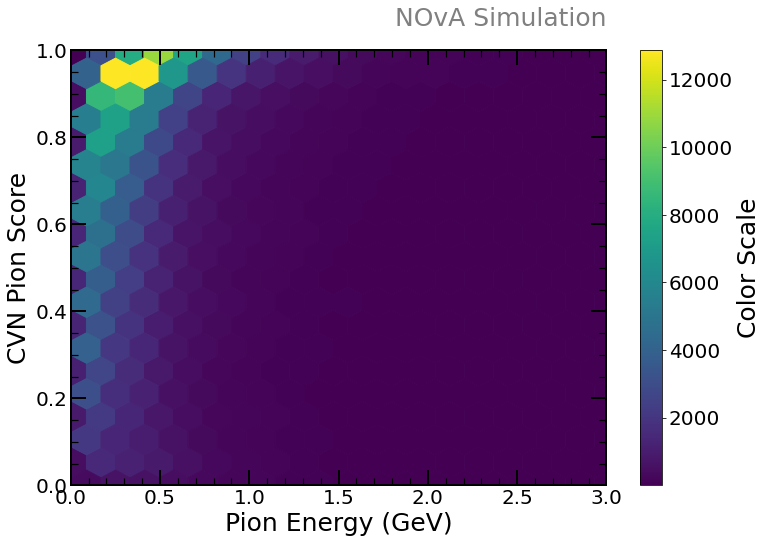

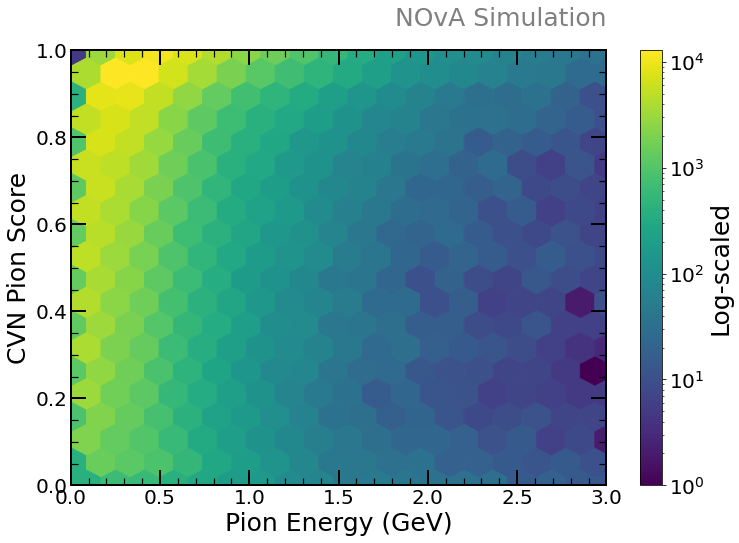

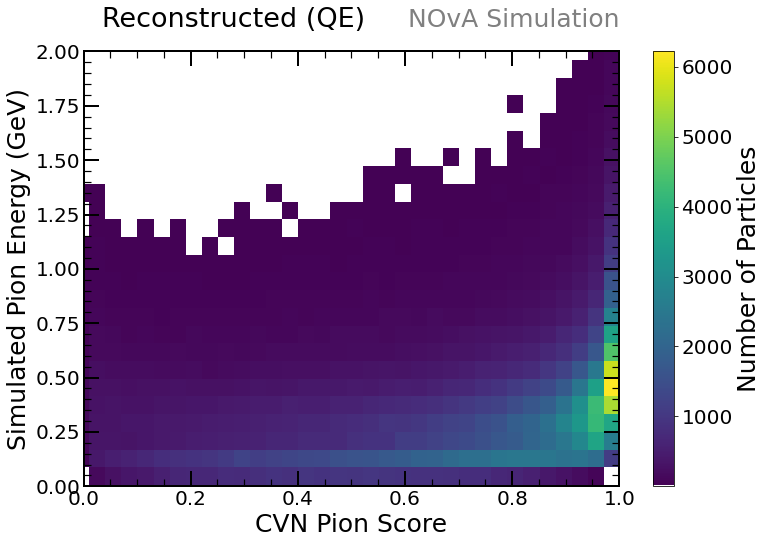

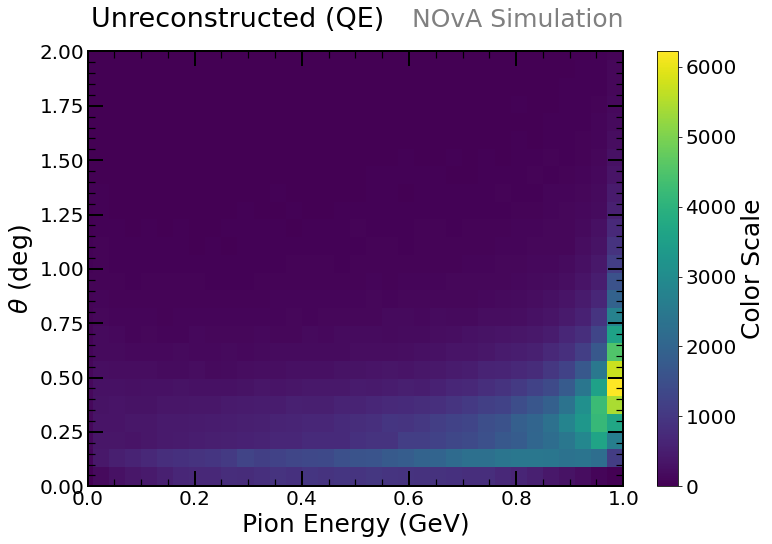

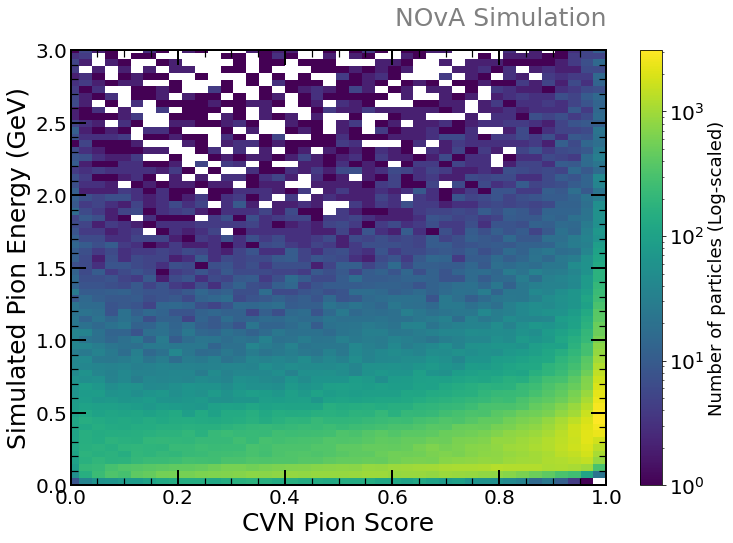

In [56]:
# Ensure energies and theta2 are numpy arrays
energies_hb = np.array(energiesnt)
theta_hb = np.array(cvn)

# Sample the data
# sample_size = 500000  # Sample 100,000 points
# indices = np.random.choice(len(energies_hb), sample_size, replace=False)
# sampled_energies = energies_hb[indices]
# sampled_theta2 = theta2_hb[indices]

# Create the plot
plt.figure(figsize=(12, 8))

# Create a hexbin plot with sampled data
hb = plt.hexbin(energies_hb, theta_hb, gridsize=100, cmap='viridis', mincnt=1)

# Add color bar
cb = plt.colorbar(hb)
cb.set_label('Color Scale', fontsize=25)
cb.ax.tick_params(labelsize=20) 


# Set labels and title
plt.xlabel('Pion Energy (GeV)', fontsize=25)
plt.ylabel('CVN Pion Score', fontsize=25)
# plt.title(f'({folder})', x=0.4,y=1.042,fontsize=27)
set_plot_style()
plt.ylim(0, 1)
plt.xlim(0,3)
# plt.savefig(f"{folder}/analysisfiles/images/pionenergy_vs_cvn_normal_part1_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/pionenergy_vs_cvn_normal_part1_total.png', bbox_inches='tight')

plt.show()

plt.figure(figsize=(12, 8))

# Create a hexbin plot with sampled data
hb = plt.hexbin(energies_hb, theta_hb, gridsize=100, cmap='viridis', mincnt=1, norm=mcolors.LogNorm())

# Add color bar
cb = plt.colorbar(hb)
cb.set_label('Log-scaled', fontsize=25)
cb.ax.tick_params(labelsize=20) 


# Set labels and title
plt.xlabel('Pion Energy (GeV)', fontsize=25)
plt.ylabel('CVN Pion Score', fontsize=25)
# plt.title(f'({folder})', x=0.4,y=1.042,fontsize=27)
set_plot_style()
plt.ylim(0, 1)
plt.xlim(0,3)
# plt.savefig(f"{folder}/analysisfiles/images/pionenergy_vs_cvn_logscaled_part1_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/pionenergy_vs_cvn_logscaled_part1_total.png', bbox_inches='tight')

plt.show()


plt.figure(figsize=(12, 8))

# Create a 2D histogram with square bins
counts, xedges, yedges = np.histogram2d(theta_hb, energies_hb, bins=(200, 200))

# Define a custom colormap with white for zero counts
colors = plt.cm.viridis(np.linspace(0, 1, 256))
colors[0] = [1, 1, 1, 1]  # Set the first color to white
cmap = ListedColormap(colors)

# Create the norm
norm = mcolors.Normalize(vmin=0.1, vmax=np.max(counts))

# Plot the histogram with the custom colormap
plt.imshow(counts.T, origin='lower', cmap=cmap, norm=norm, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto')

# Add color bar
cb = plt.colorbar()
cb.set_label('Number of Particles', fontsize=25)
cb.ax.tick_params(labelsize=20)

# Set labels and title
plt.xlabel('CVN Pion Score', fontsize=25)
plt.ylabel('Simulated Pion Energy (GeV)', fontsize=25)
plt.title(f'Reconstructed ({folder})', x=0.28, y=1.042, fontsize=27)
set_plot_style()
plt.xlim(0, 1)
plt.ylim(0,2)

# Save the plot
# plt.savefig(f"/Users/ASUS/Downloads/yo/FreezingMoonV/Chap5/scatter_E_alpha_normal_part2_{folder}.png", bbox_inches='tight')
# plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/pionenergy_vs_cvn_logscaled_part1_total_v2.png', bbox_inches='tight')
plt.show()


plt.figure(figsize=(12, 8))

# Create another 2D histogram with square bins
hb = plt.hist2d(theta_hb,energies_hb , bins=(200, 200), cmap='viridis')

# Add color bar
cb = plt.colorbar(hb[3])
cb.set_label('Color Scale', fontsize=25)
cb.ax.tick_params(labelsize=20) 

# Set labels and title
plt.xlabel('Pion Energy (GeV)', fontsize=25)
plt.ylabel(r'$\theta$ (deg)', fontsize=25)
plt.title(f'Unreconstructed ({folder})', x=0.28, y=1.042, fontsize=27)
set_plot_style()
plt.xlim(0, 1)
plt.ylim(0,2)

# Save the plot
# plt.savefig(f"/Users/ASUS/Downloads/yo/FreezingMoonV/Chap5/scatter_E_theta_normal_part2_{folder}.png", bbox_inches='tight')

plt.show()


# Apply mask to energies and theta2
mask = energies_hb <= 7
energies_hb_mask = energies_hb[mask]
theta_hb_mask = theta_hb[mask]

# Create the plot
plt.figure(figsize=(12, 8))

# Create a 2D histogram with square bins
hb = plt.hist2d(theta_hb_mask,energies_hb_mask , bins=(250, 150), cmap='viridis', norm=mcolors.LogNorm())

# Add color bar
cb = plt.colorbar(hb[3])
cb.set_label('Number of particles (Log-scaled)', fontsize=18)
cb.ax.tick_params(labelsize=20) 

# Set labels and title
plt.xlabel('CVN Pion Score', fontsize=25)
plt.ylabel('Simulated Pion Energy (GeV)', fontsize=25)
set_plot_style()
plt.xlim(0, 1)
plt.ylim(0,3)

# Save the plot
# plt.savefig(f"/Users/ASUS/Downloads/yo/FreezingMoonV/Chap5/scatter_E_theta_part2_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/pionenergy_vs_cvn_logscaled_part1_total_v2.png', bbox_inches='tight')

plt.show()

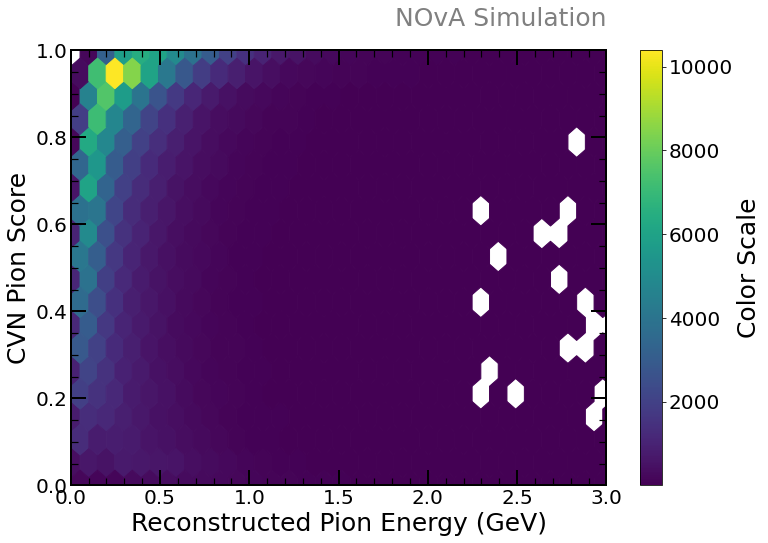

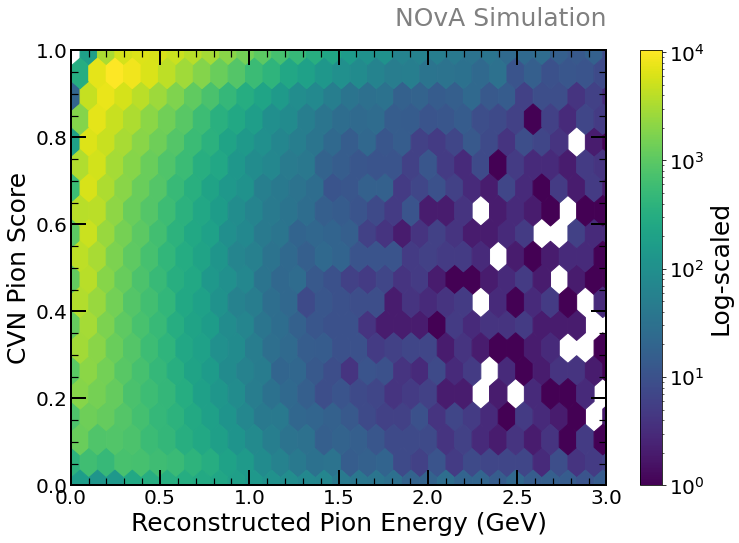

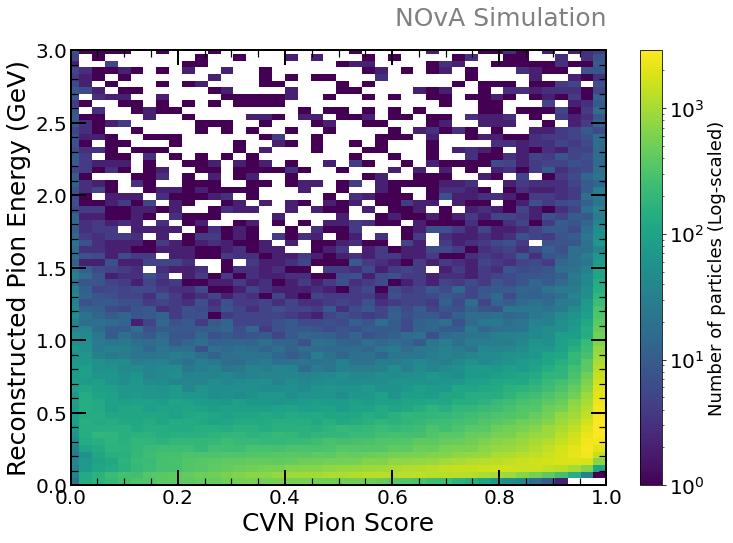

In [58]:
# Ensure energies and theta2 are numpy arrays
energies_hb = np.array(calenergies)
theta_hb = np.array(cvn)

# Sample the data
# sample_size = 500000  # Sample 100,000 points
# indices = np.random.choice(len(energies_hb), sample_size, replace=False)
# sampled_energies = energies_hb[indices]
# sampled_theta2 = theta2_hb[indices]

# Create the plot
plt.figure(figsize=(12, 8))

# Create a hexbin plot with sampled data
hb = plt.hexbin(energies_hb, theta_hb, gridsize=100, cmap='viridis', mincnt=1)

# Add color bar
cb = plt.colorbar(hb)
cb.set_label('Color Scale', fontsize=25)
cb.ax.tick_params(labelsize=20) 


# Set labels and title
plt.xlabel('Reconstructed Pion Energy (GeV)', fontsize=25)
plt.ylabel('CVN Pion Score', fontsize=25)
# plt.title(f'({folder})', x=0.4,y=1.042,fontsize=27)
set_plot_style()
plt.ylim(0, 1)
plt.xlim(0,3)
# plt.savefig(f"{folder}/analysisfiles/images/pionenergy_vs_cvn_normal_part1_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/recopionenergy_vs_cvn_normal_part1_total.png', bbox_inches='tight')

plt.show()

plt.figure(figsize=(12, 8))

# Create a hexbin plot with sampled data
hb = plt.hexbin(energies_hb, theta_hb, gridsize=100, cmap='viridis', mincnt=1, norm=mcolors.LogNorm())

# Add color bar
cb = plt.colorbar(hb)
cb.set_label('Log-scaled', fontsize=25)
cb.ax.tick_params(labelsize=20) 


# Set labels and title
plt.xlabel('Reconstructed Pion Energy (GeV)', fontsize=25)
plt.ylabel('CVN Pion Score', fontsize=25)
# plt.title(f'({folder})', x=0.4,y=1.042,fontsize=27)
set_plot_style()
plt.ylim(0, 1)
plt.xlim(0,3)
# plt.savefig(f"{folder}/analysisfiles/images/pionenergy_vs_cvn_logscaled_part1_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/recopionenergy_vs_cvn_logscaled_part1_total.png', bbox_inches='tight')


plt.show()

# Apply mask to energies and theta2
mask = energies_hb <= 7
energies_hb_mask = energies_hb[mask]
theta_hb_mask = theta_hb[mask]

# Create the plot
plt.figure(figsize=(12, 8))

# Create a 2D histogram with square bins
hb = plt.hist2d(theta_hb_mask,energies_hb_mask , bins=(250, 150), cmap='viridis', norm=mcolors.LogNorm())

# Add color bar
cb = plt.colorbar(hb[3])
cb.set_label('Number of particles (Log-scaled)', fontsize=18)
cb.ax.tick_params(labelsize=20) 

# Set labels and title
plt.xlabel('CVN Pion Score', fontsize=25)
plt.ylabel('Reconstructed Pion Energy (GeV)', fontsize=25)
set_plot_style()
plt.xlim(0, 1)
plt.ylim(0,3)

# Save the plot
# plt.savefig(f"/Users/ASUS/Downloads/yo/FreezingMoonV/Chap5/scatter_E_theta_part2_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/recopionenergy_vs_cvn_logscaled_part1_total_v2.png', bbox_inches='tight')

plt.show()

In [78]:
#NOW CHECVK THE CVN VS THE ANGLES
start_time = time.time()

folders=['Res','DIS','MEC','QE']


theta=[]
alpha=[]
cvn=[]


for folder in folders:
    temp1=[]
    temp1=read_file(folder, 'analysisfiles/theta_part1')
    theta.extend([float(element)*(180 / math.pi) for sublist in temp1 for element in sublist])
    
    temp2=[]
    temp2=read_file(folder, 'analysisfiles/alpha_part1') 
    for event in temp2:
        l = len(event)
        num =int(l/3)-1
        mm=0
        for i in range(num):
            mm=mm+3
            vector1 = np.array([float(event[0]), float(event[1]), float(event[2])])
            vector2 = np.array([float(event[mm]), float(event[mm+1]), float(event[mm+2])])
            dot_product = np.dot(vector1, vector2)
            magnitude_product = np.linalg.norm(vector1) * np.linalg.norm(vector2)
            cosine_theta = dot_product / magnitude_product
            #save the cosine
            #alpha.append(cosine_theta)
            angle_radians = np.arccos(cosine_theta)
            degrees_angle = angle_radians * (180 / math.pi)
            #alpha.append(angle_radians)
            alpha.append(degrees_angle)
            
    temp3=read_file(folder, 'analysisfiles/CVN_part1')
    cvn.extend([float(element) for sublist in temp3 for element in sublist])
            
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 7.465996980667114 seconds


In [79]:
#in this case, the region if interest is for values between cvn 0.8 and 1, and for alpha 50 and 75 and for theta between 15 and 45
count=0
for i, element in enumerate(cvn):
    if 0.8 < element < 1:
        if 30 < alpha[i] < 100:
            count=count +1
            
percentage=count*100/len(cvn)
print(f'For alpha, The amount of data in this region is: {count}, representing: {percentage:.2f}%')

#cvn below 0.25
count=0
for i, element in enumerate(cvn):
    if 0 < element < 0.25:
        if 30 < alpha[i] < 100:
            count=count +1
            
percentage=count*100/len(cvn)
print(f'For alpha, The amount of data in this region is: {count}, representing: {percentage:.2f}%')


count=0
for i, element in enumerate(cvn):
    if 0.8 < element < 1:
        if 5 < theta[i] < 65:
            count=count +1
            
percentage=count*100/len(cvn)
print(f'For theta, The amount of data in this region is: {count}, representing: {percentage:.2f}%')

count=0
for i, element in enumerate(cvn):
    if 0 < element < 0.25:
        if 5 < theta[i] < 65:
            count=count +1
            
percentage=count*100/len(cvn)
print(f'For theta, The amount of data in this region is: {count}, representing: {percentage:.2f}%')

For alpha, The amount of data in this region is: 104596, representing: 34.14%
For alpha, The amount of data in this region is: 18735, representing: 6.12%
For theta, The amount of data in this region is: 115952, representing: 37.85%
For theta, The amount of data in this region is: 20359, representing: 6.65%


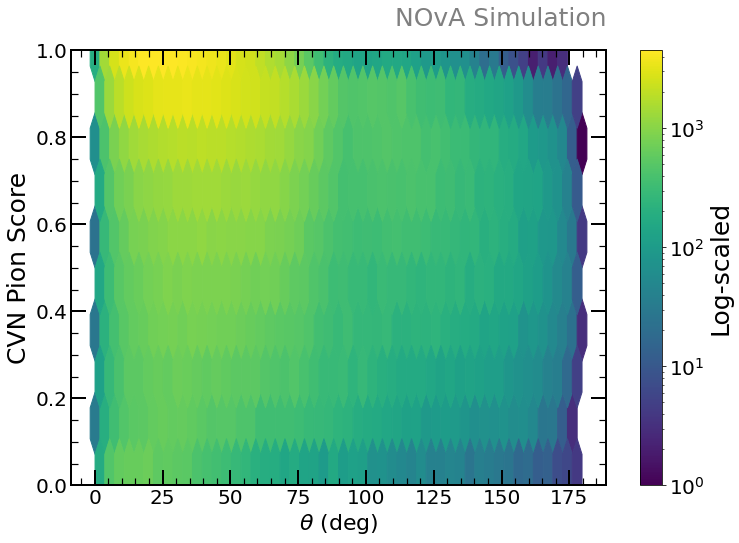

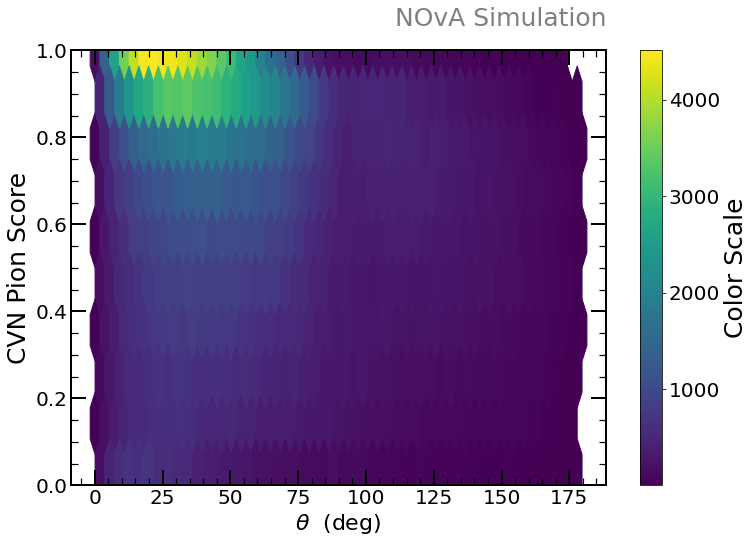

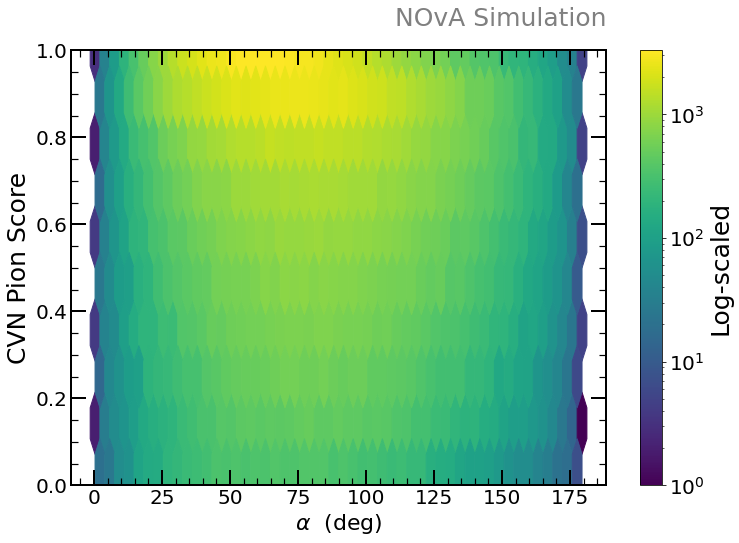

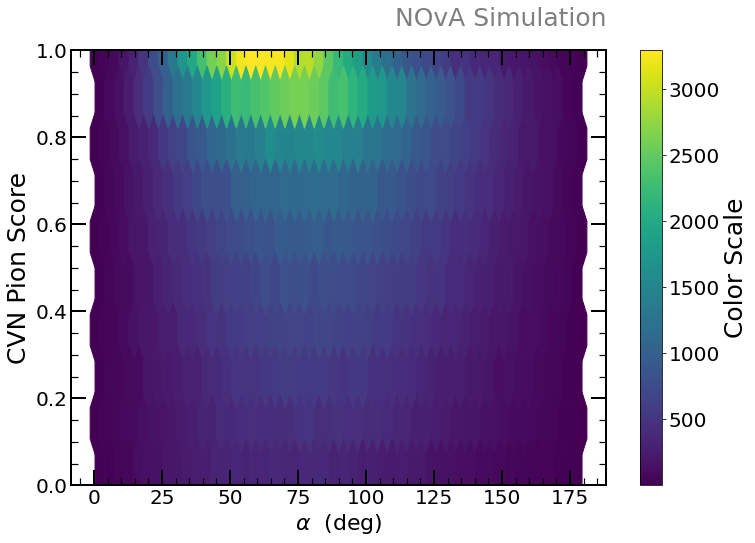

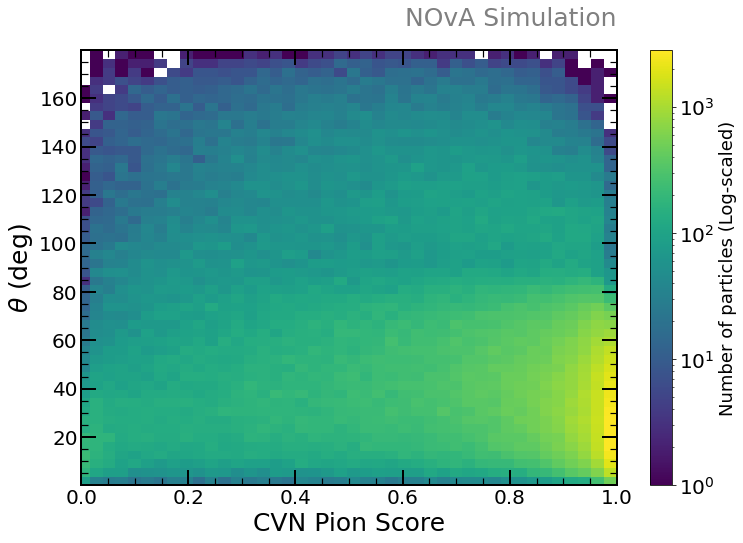

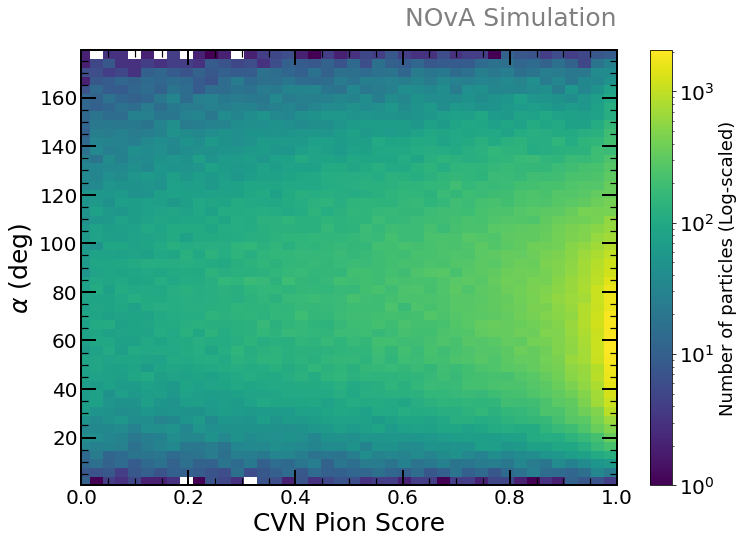

In [65]:
cvn_hb = np.array(cvn)
theta_hb = np.array(theta)

plt.figure(figsize=(12, 8))

# Create a hexbin plot with sampled data
hb = plt.hexbin(theta_hb, cvn_hb, gridsize=50, cmap='viridis', mincnt=1, norm=mcolors.LogNorm())

# Add color bar
cb = plt.colorbar(hb)
cb.set_label('Log-scaled', fontsize=25)
cb.ax.tick_params(labelsize=20) 


# Set labels and title
plt.xlabel(fr'$\theta$ (deg)', fontsize=22)
plt.ylabel('CVN Pion Score', fontsize=25)
# plt.title(f'({folder})', x=0.4,y=1.042,fontsize=27)
set_plot_style()
plt.ylim(0, 1)
# plt.savefig(f"{folder}/analysisfiles/images/heatmap_cvn_vs_theta_logscaled_{folder}_part1.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/heatmap_cvn_vs_theta_logscaled_part1_total.png', bbox_inches='tight')

plt.show()


plt.figure(figsize=(12, 8))

# Create a hexbin plot with sampled data
hb = plt.hexbin(theta_hb, cvn_hb, gridsize=50, cmap='viridis', mincnt=1)

# Add color bar
cb = plt.colorbar(hb)
cb.set_label('Color Scale', fontsize=25)
cb.ax.tick_params(labelsize=20) 


# Set labels and title
plt.xlabel(fr'$\theta$  (deg)', fontsize=22)
plt.ylabel('CVN Pion Score', fontsize=25)
# plt.title(f'({folder})', x=0.4,y=1.042,fontsize=27)
set_plot_style()
plt.ylim(0, 1)
# plt.savefig(f"{folder}/analysisfiles/images/heatmap_cvn_vs_theta_normal_{folder}_part1.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/heatmap_cvn_vs_theta_normal_part1_total.png', bbox_inches='tight')

plt.show()



cvn_hb = np.array(cvn)
alpha_hb = np.array(alpha)

plt.figure(figsize=(12, 8))

# Create a hexbin plot with sampled data #Blues
hb = plt.hexbin(alpha_hb, cvn_hb, gridsize=50, cmap='viridis', mincnt=1, norm=mcolors.LogNorm())

# Add color bar
cb = plt.colorbar(hb)
cb.set_label('Log-scaled', fontsize=25)
cb.ax.tick_params(labelsize=20) 


# Set labels and title
plt.xlabel(fr'$\alpha$  (deg)', fontsize=22)
plt.ylabel('CVN Pion Score', fontsize=25)
# plt.title(f'({folder})', x=0.4,y=1.042,fontsize=27)
set_plot_style()
plt.ylim(0, 1)
# plt.savefig(f"{folder}/analysisfiles/images/heatmap_cvn_vs_alpha_logscaled_{folder}_part1.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/heatmap_cvn_vs_alpha_logscaled_part1_total.png', bbox_inches='tight')

plt.show()


plt.figure(figsize=(12, 8))

# Create a hexbin plot with sampled data
hb = plt.hexbin(alpha_hb, cvn_hb, gridsize=50, cmap='viridis', mincnt=1)

# Add color bar
cb = plt.colorbar(hb)
cb.set_label('Color Scale', fontsize=25)
cb.ax.tick_params(labelsize=20) 


# Set labels and title
plt.xlabel(fr'$\alpha$  (deg)', fontsize=22)
plt.ylabel('CVN Pion Score', fontsize=25)
# plt.title(f'({folder})', x=0.4,y=1.042,fontsize=27)
set_plot_style()
plt.ylim(0, 1)
# plt.savefig(f"{folder}/analysisfiles/images/heatmap_cvn_vs_alpha_normal_{folder}_part1.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/heatmap_cvn_vs_alpha_normal_part1_total.png', bbox_inches='tight')

plt.show()



# Create the plot
plt.figure(figsize=(12, 8))

# Create a 2D histogram with square bins
hb = plt.hist2d(cvn_hb ,theta_hb , bins=(250, 50), cmap='viridis', norm=mcolors.LogNorm())

# Add color bar
cb = plt.colorbar(hb[3])
cb.set_label('Number of particles (Log-scaled)', fontsize=18)
cb.ax.tick_params(labelsize=20) 

# Set labels and title
plt.xlabel('CVN Pion Score', fontsize=25)
plt.ylabel(r'$\theta$ (deg)', fontsize=25)
set_plot_style()
plt.xlim(0, 1)
# plt.ylim(0,3)

# Save the plot
# plt.savefig(f"/Users/ASUS/Downloads/yo/FreezingMoonV/Chap5/scatter_E_theta_part2_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/heatmap_cvn_vs_theta_logscaled_part1_total_v2.png', bbox_inches='tight')

plt.show()


# Create the plot
plt.figure(figsize=(12, 8))

# Create a 2D histogram with square bins
hb = plt.hist2d(cvn_hb ,alpha_hb , bins=(250, 50), cmap='viridis', norm=mcolors.LogNorm())

# Add color bar
cb = plt.colorbar(hb[3])
cb.set_label('Number of particles (Log-scaled)', fontsize=18)
cb.ax.tick_params(labelsize=20) 

# Set labels and title
plt.xlabel('CVN Pion Score', fontsize=25)
plt.ylabel(r'$\alpha$ (deg)', fontsize=25)
set_plot_style()
plt.xlim(0, 1)
# plt.ylim(0,3)

# Save the plot
# plt.savefig(f"/Users/ASUS/Downloads/yo/FreezingMoonV/Chap5/scatter_E_theta_part2_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/heatmap_cvn_vs_alpha_logscaled_part1_total_v2.png', bbox_inches='tight')

plt.show()

In [80]:
#NOW CHECVK THE CVN VS THE ANGLES
start_time = time.time()

folders=['Res','DIS','MEC','QE']



length=[]
hits=[]
cvn=[]

for folder in folders:
    temp=[]
    temp=read_file(folder,'analysisfiles/length_part1')
    length.extend([float(element) for sublist in temp for element in sublist])
    
    temp2=[]
    temp2=read_file(folder,'analysisfiles/numhits_part1')
    hits.extend([float(element) for sublist in temp2 for element in sublist])
            
    temp3=read_file(folder, 'analysisfiles/CVN_part1')
    cvn.extend([float(element) for sublist in temp3 for element in sublist])
            
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 1.9569189548492432 seconds


In [81]:
#for hits between 10 and 35 and for length between 40 and 160 
count=0
for i, element in enumerate(cvn):
    if 0.8 < element < 1:
        if 5 < hits[i] < 30:
            count=count +1
            
percentage=count*100/len(cvn)
print(f'The amount of data for hits in this region is: {count}, representing: {percentage:.2f}%')

count=0
for i, element in enumerate(cvn):
    if 0 < element < 0.25:
        if 5 < hits[i] < 30:
            count=count +1
            
percentage=count*100/len(cvn)
print(f'The amount of data for hits in this region is: {count}, representing: {percentage:.2f}%')

count=0
for i, element in enumerate(cvn):
    if 0.8 < element < 1:
        if 25 < length[i] < 200:
            count=count +1
            
percentage=count*100/len(cvn)
print(f'The amount of data for length in this region is: {count}, representing: {percentage:.2f}%')

count=0
for i, element in enumerate(cvn):
    if 0 < element < 0.25:
        if 25 < length[i] < 200:
            count=count +1
            
percentage=count*100/len(cvn)
print(f'The amount of data for length in this region is: {count}, representing: {percentage:.2f}%')

The amount of data for hits in this region is: 106957, representing: 34.92%
The amount of data for hits in this region is: 14807, representing: 4.83%
The amount of data for length in this region is: 116415, representing: 38.00%
The amount of data for length in this region is: 19410, representing: 6.34%


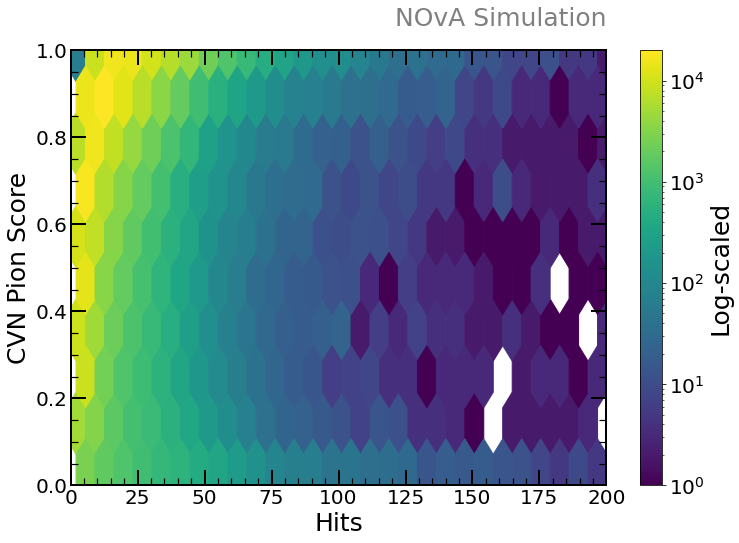

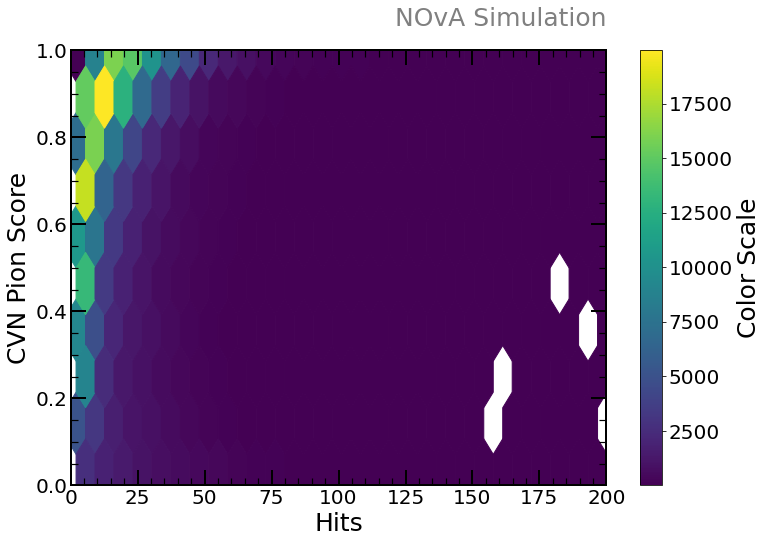

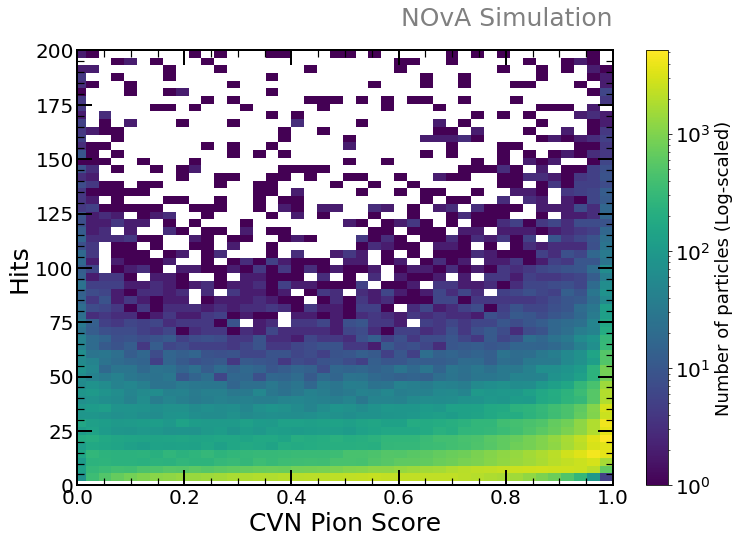

In [72]:
cvn_hb = np.array(cvn)
hits_hb = np.array(hits)

plt.figure(figsize=(12, 8))


# Create a mask 
# mask = hits_hb <= 1500

# Apply the mask to all arrays
# cvn_hb_mask = cvn_hb[mask]
# hits_hb_mask = length_hb[mask]

# Create a hexbin plot with sampled data
hb = plt.hexbin(hits_hb, cvn_hb, gridsize=50, cmap='viridis', mincnt=1, norm=mcolors.LogNorm())

# Add color bar
cb = plt.colorbar(hb)
cb.set_label('Log-scaled', fontsize=25)
cb.ax.tick_params(labelsize=20) 


# Set labels and title
plt.xlabel('Hits', fontsize=25)
plt.ylabel('CVN Pion Score', fontsize=25)
# plt.title(f'({folder})', x=0.4,y=1.042,fontsize=27)
set_plot_style()
plt.ylim(0, 1)
plt.xlim(0, 200)
# plt.savefig(f"{folder}/analysisfiles/images/cvn_vs_hits_logscaled_{folder}_part1.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/cvn_vs_hits_logscaled_part1_total.png', bbox_inches='tight')

plt.show()


plt.figure(figsize=(12, 8))

# Create a hexbin plot with sampled data
hb = plt.hexbin(hits_hb, cvn_hb, gridsize=50, cmap='viridis', mincnt=1)

# Add color bar
cb = plt.colorbar(hb)
cb.set_label('Color Scale', fontsize=25)
cb.ax.tick_params(labelsize=20) 


# Set labels and title
plt.xlabel('Hits', fontsize=25)
plt.ylabel('CVN Pion Score', fontsize=25)
# plt.title(f'Reconstructed ({folder})', x=0.28,y=1.042,fontsize=27)
set_plot_style()
plt.ylim(0, 1)
plt.xlim(0, 200)
# plt.savefig(f"{folder}/analysisfiles/images/cvn_vs_hits_normal_{folder}_part1.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/cvn_vs_hits_normal_part1_total.png', bbox_inches='tight')

plt.show()


# Create the plot
plt.figure(figsize=(12, 8))

# Create a 2D histogram with square bins
hb = plt.hist2d(cvn_hb ,hits_hb, bins=(250, 100), cmap='viridis', norm=mcolors.LogNorm())

# Add color bar
cb = plt.colorbar(hb[3])
cb.set_label('Number of particles (Log-scaled)', fontsize=18)
cb.ax.tick_params(labelsize=20) 

# Set labels and title
plt.xlabel('CVN Pion Score', fontsize=25)
plt.ylabel('Hits', fontsize=25)
set_plot_style()
plt.xlim(0, 1)
plt.ylim(0,200)

# Save the plot
# plt.savefig(f"/Users/ASUS/Downloads/yo/FreezingMoonV/Chap5/scatter_E_theta_part2_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/cvn_vs_hits_logscaled_part1_total_v2.png', bbox_inches='tight')

plt.show()


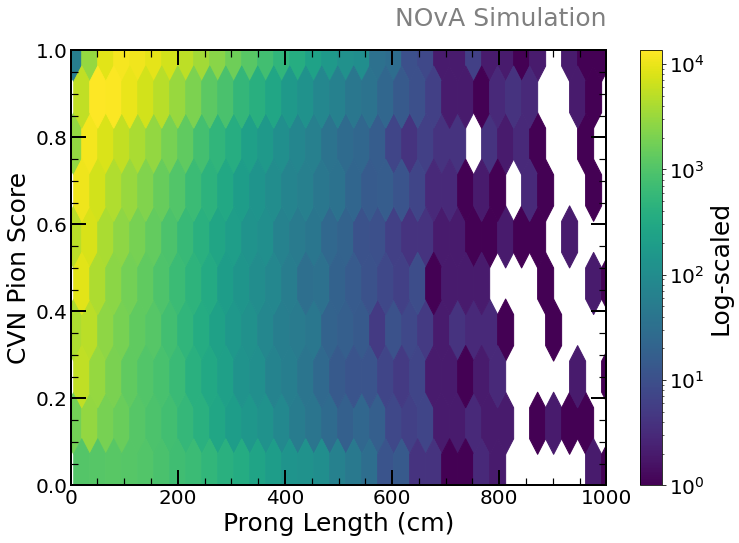

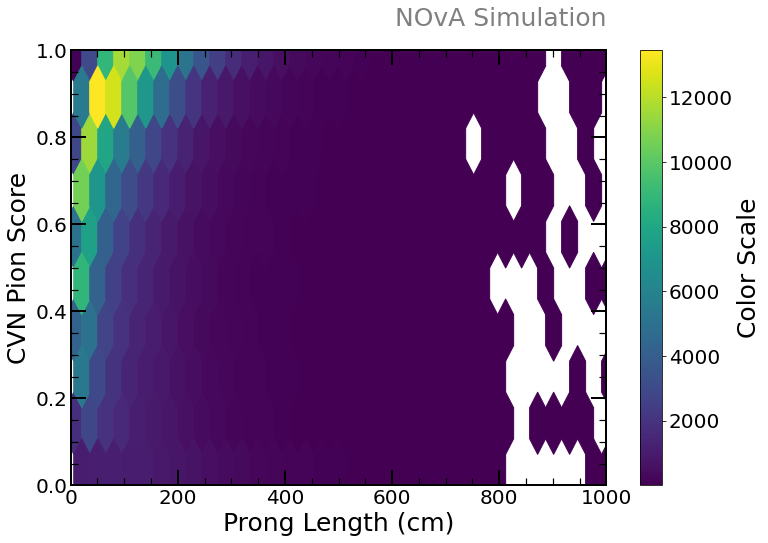

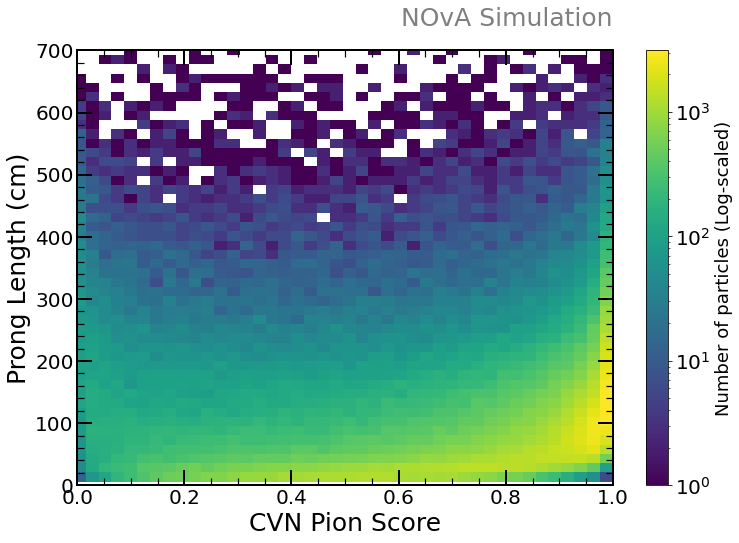

In [74]:

cvn_hb = np.array(cvn)
length_hb = np.array(length)

plt.figure(figsize=(12, 8))

# Create a mask for cvn values >= 0
mask = length_hb <= 1500

# Apply the mask to all arrays
cvn_hb_mask = cvn_hb[mask]
length_hb_mask = length_hb[mask]



# Create a hexbin plot with sampled data
hb = plt.hexbin(length_hb_mask, cvn_hb_mask, gridsize=50, cmap='viridis', mincnt=1, norm=mcolors.LogNorm())

# Add color bar
cb = plt.colorbar(hb)
cb.set_label('Log-scaled', fontsize=25)
cb.ax.tick_params(labelsize=20) 


# Set labels and title
plt.xlabel('Prong Length (cm)', fontsize=25)
plt.ylabel('CVN Pion Score', fontsize=25)
# plt.title(f'({folder})', x=0.4,y=1.042,fontsize=27)
set_plot_style()
plt.xlim(0, 1000)
plt.ylim(0,1)
# plt.savefig(f"{folder}/analysisfiles/images/cvn_vs_length_normal_{folder}_part1.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/cvn_vs_length_logscaled_part1_total.png', bbox_inches='tight')

plt.show()


plt.figure(figsize=(12, 8))

# Create a hexbin plot with sampled data
hb = plt.hexbin(length_hb_mask, cvn_hb_mask, gridsize=50, cmap='viridis', mincnt=1)

# Add color bar
cb = plt.colorbar(hb)
cb.set_label('Color Scale', fontsize=25)
cb.ax.tick_params(labelsize=20) 


# Set labels and title
plt.xlabel('Prong Length (cm)', fontsize=25)
plt.ylabel('CVN Pion Score', fontsize=25)
# plt.title(f'({folder})', x=0.4,y=1.042,fontsize=27)
set_plot_style()
plt.xlim(0, 1000)
plt.ylim(0,1)
# plt.savefig(f"{folder}/analysisfiles/images/cvn_vs_length_normal_{folder}_part1.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/cvn_vs_length_normal_part1_total.png', bbox_inches='tight')

plt.show()


# Create the plot
plt.figure(figsize=(12, 8))

# Create a 2D histogram with square bins
hb = plt.hist2d(cvn_hb_mask ,length_hb_mask, bins=(250, 100), cmap='viridis', norm=mcolors.LogNorm())

# Add color bar
cb = plt.colorbar(hb[3])
cb.set_label('Number of particles (Log-scaled)', fontsize=18)
cb.ax.tick_params(labelsize=20) 

# Set labels and title
plt.xlabel('CVN Pion Score', fontsize=25)
plt.ylabel('Prong Length (cm)', fontsize=25)
set_plot_style()
plt.xlim(0, 1)
plt.ylim(0,700)

# Save the plot
# plt.savefig(f"/Users/ASUS/Downloads/yo/FreezingMoonV/Chap5/scatter_E_theta_part2_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/cvn_vs_length_logscaled_part1_total_v2.png', bbox_inches='tight')

plt.show()

In [82]:
#checking the cvn value of the identified pions

start_time = time.time()

folders=['Res','DIS','MEC','QE']



cvn=[]
energies=[]

for folder in folders:
    temp=[]
    temp=read_file(folder,'analysisfiles/energiesNT_part1')
    energies.extend([float(element)-0.138 for sublist in temp for element in sublist])
    temp3=[]
    temp3=read_file(folder, 'analysisfiles/CVN_part1')
    cvn.extend([float(element) for sublist in temp3 for element in sublist])
            
#after that, lets see how is the behavior of the cvn values with respect to ranges of energy.

energy_ranges = [(0, 0.2), (0.2, 0.5), (0.5, 1), (1, 1.5), (1.5, 2)]

# Initialize a list to store filtered runs for each energy range
cvns = [[] for _ in range(len(energy_ranges))] 

for j, event in enumerate(energies):
    for i, (start, end) in enumerate(energy_ranges):
        if start <= event < end:
            cvns[i].append(cvn[j])

        
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 1.7053723335266113 seconds


In [71]:
#check the percentages distributions above and below the 0.8 peak in the 0 to 0.2 GeV region

def calculate_percentages(data, thresholds):
    percentages = {}
    total = len(data)
    for threshold in thresholds:
        below_threshold = np.sum(np.array(data) < threshold)
        above_threshold = np.sum(np.array(data) >= threshold)
        percentages[threshold] = {
            'below': (below_threshold / total) * 100,
            'above': (above_threshold / total) * 100
        }
    return percentages


thresholds = [0.25]  # Define your own thresholds
percentages1 = calculate_percentages(cvns[4], thresholds)
len1=len(cvns[1])
for threshold, perc in percentages1.items():
    below_t1=(percentages1[threshold]['below']/100)*len1
    print(f'Threshold {threshold}: Below {perc["below"]:.2f}%, {below_t1}, Above {perc["above"]:.2f}%, {len1-below_t1}')
    

Threshold 0.25: Below 13.38%, 17378.176056338027, Above 86.62%, 112500.82394366198


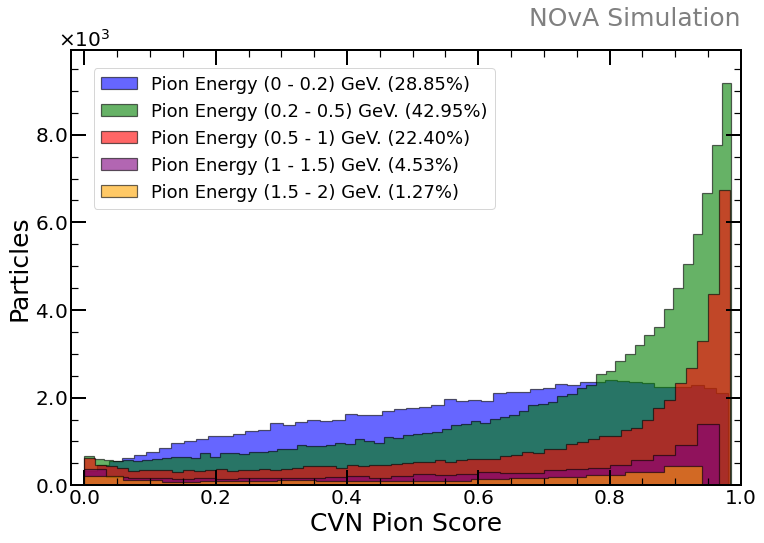

In [83]:
# Define colors for each histogram
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create a combined histogram subplot
plt.figure(figsize=(12, 8)) 
combined_subplot = plt.subplot(111)

totlen=0

for i in range(len(cvns)):
    totlen=totlen+len(cvns[i])

# Plot individual histograms with specified colors
for i, (start, end) in enumerate(energy_ranges):
    percentage = len(cvns[i]) * 100 / totlen
    plt.hist(cvns[i], bins=autobins(cvns[i],0,1), edgecolor='black', linewidth=1.2, histtype = 'stepfilled',alpha=0.6, label=f'Pion Energy ({start} - {end}) GeV. ({percentage:.2f}%)', color=colors[i])#{len(cvns[i])} events', color=colors[i])

plt.xlabel('CVN Pion Score', fontsize=25)
plt.ylabel('Particles', fontsize=25)
plt.xlim(-0.02,1)
# plt.title(f'Pion CVN Score for pion energy ranges', fontsize=30)
set_plot_style()
set_sn2()
plt.legend(fontsize=18, loc='upper left',bbox_to_anchor=(0.02, 0.98))

#plt.savefig(f"{folder}/analysisfiles/images/cvn_combined_energy_ranges_part1_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/cvn_combined_energy_ranges_part1_total.png', bbox_inches='tight')

# plt.savefig(f"/Users/ASUS/Downloads/yo/FreezingMoonV/Chap5/cvn_combined_energy_ranges_part1_total.png", bbox_inches='tight')

plt.show()

In [89]:
start_time = time.time()

folders=['Res','DIS','MEC','QE']


cvn=[]
cvn_nopi=[]

for folder in folders:
    temp=[]
    temp=read_file(folder,'analysisfiles/CVN_part1')
    cvn.extend([float(element) for sublist in temp for element in sublist])
    temp2=[]
    temp2=read_file2(folder,'analysisfiles/cvns_perevent_nonpion_part1')
    cvn_nopi.extend([float(element) for sublist in temp2 for element in sublist])


end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 1.9883692264556885 seconds


In [90]:
#check the percentages distributions above and below the valley here

def calculate_percentages(data, thresholds):
    percentages = {}
    total = len(data)
    for threshold in thresholds:
        below_threshold = np.sum(np.array(data) < threshold)
        above_threshold = np.sum(np.array(data) >= threshold)
        percentages[threshold] = {
            'below': (below_threshold / total) * 100,
            'above': (above_threshold / total) * 100
        }
    return percentages


thresholds = [0.35,0.4,0.42,0.45,0.48]  # Define your own thresholds
percentages1 = calculate_percentages(cvn, thresholds)
len1=len(cvn)
print('for cvn:')
for threshold, perc in percentages1.items():
    below_t1=(percentages1[threshold]['below']/100)*len1
    print(f'Threshold {threshold}: Below {perc["below"]:.2f}%, {below_t1}, Above {perc["above"]:.2f}%, {len1-below_t1}')
    

percentages2 = calculate_percentages(cvn_nopi, thresholds)
len2=len(cvn_nopi)
print('for cvn_nopi:')
for threshold, perc in percentages2.items():
    below_t2=(percentages2[threshold]['below']/100)*len2
    print(f'Threshold {threshold}: Below {perc["below"]:.2f}%, {below_t2}, Above {perc["above"]:.2f}%, {len2-below_t2}')

for cvn:
Threshold 0.35: Below 15.18%, 46515.0, Above 84.82%, 259819.0
Threshold 0.4: Below 18.07%, 55367.0, Above 81.93%, 250967.0
Threshold 0.42: Below 19.32%, 59184.0, Above 80.68%, 247150.0
Threshold 0.45: Below 21.20%, 64941.0, Above 78.80%, 241393.0
Threshold 0.48: Below 23.16%, 70940.0, Above 76.84%, 235394.0
for cvn_nopi:
Threshold 0.35: Below 69.47%, 434609.0, Above 30.53%, 190994.0
Threshold 0.4: Below 72.77%, 455225.99999999994, Above 27.23%, 170377.00000000006
Threshold 0.42: Below 74.01%, 463016.0, Above 25.99%, 162587.0
Threshold 0.45: Below 75.82%, 474352.0, Above 24.18%, 151251.0
Threshold 0.48: Below 77.56%, 485203.0, Above 22.44%, 140400.0


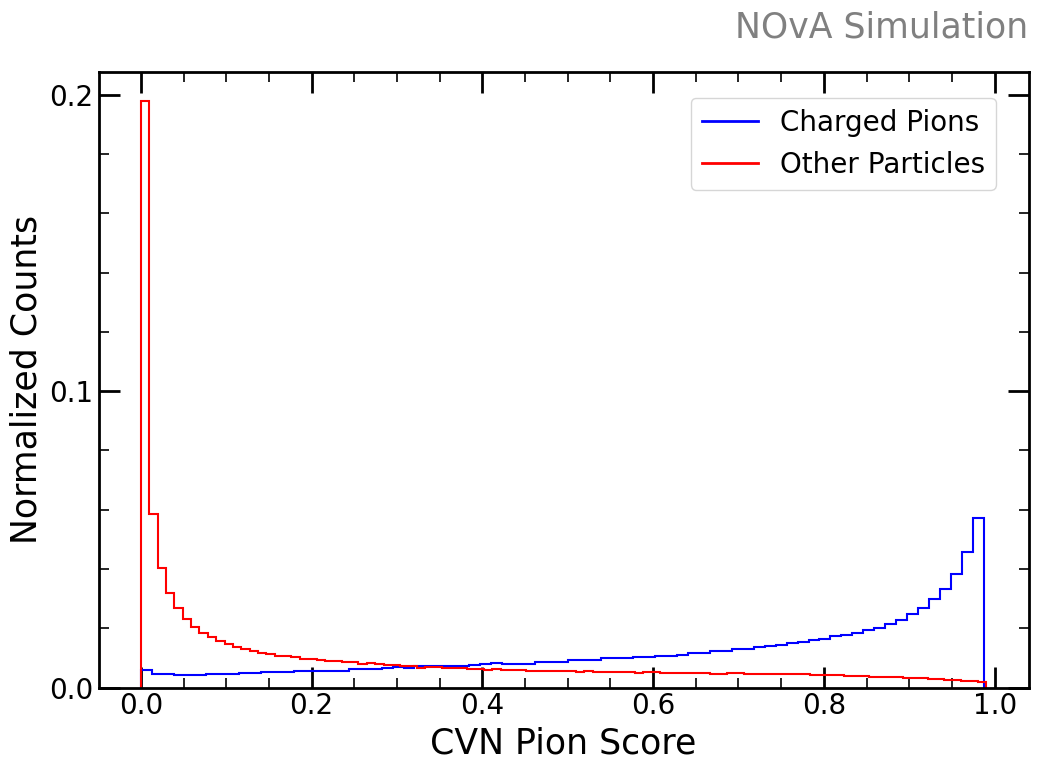

In [57]:
#plot normalized comparison between cvn for pi and no pi

# Calculate histograms
weights = np.ones_like(cvn) / len(cvn)
weights2 = np.ones_like(cvn_nopi) / len(cvn_nopi)

plt.figure(figsize=(12, 8)) 
plt.hist(cvn, bins=autobins(cvn,0,1), edgecolor='blue', linewidth=1.5, histtype='step', label='Pions (Signal)', weights=weights)
plt.hist(cvn_nopi, bins=autobins(cvn_nopi,0,1), edgecolor='red', linewidth=1.5, histtype='step', label='Other particles (Background)', weights=weights2)

plt.xlabel('CVN Pion Score', fontsize=25)
plt.ylabel('Normalized Counts', fontsize=25)
# plt.title('Pion CVN Score for identified particles', fontsize=30)
plt.legend(fontsize=20)

set_plot_style()
labels=['Charged Pions','Other Particles']
handles = [Line2D([0], [0], color='blue', lw=2), Line2D([0], [0], color='red', lw=2)]
plt.legend(handles=handles, labels=labels, fontsize=20, loc='upper right',bbox_to_anchor=(0.98, 0.98))
#change the number of ticks in the y axis
plt.locator_params(axis='y', nbins=4)

#plt.savefig(f"{folder}/images/cvn_pion_no_pion_total_part1_{folder}.png", bbox_inches='tight')
#plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/cvn_pion_no_pion_total_part1_total.png', bbox_inches='tight')

plt.savefig(f"/Users/ASUS/Downloads/yo/FreezingMoonV/Chap5/cvn_pion_no_pion_total_part1_total.png", bbox_inches='tight')
plt.show()

In [102]:
#SAVES THE VALEUS OF THE PION SCORE FOR EACH OF THE PARTICLES AND PRINTS THE DISTRIBUTION OF THE SCORE IN EACH ONE

start_time = time.time()


folders=['Res','DIS','MEC','QE']


pdg=[]
cvn=[]

for folder in folders:
    temp=[]
    temp=read_file2(folder,'pdgpngvars_total')
    pdg.extend([float(element) for sublist in temp for element in sublist])
    temp2=[]
    temp2=read_file2(folder,'cvnvars_total')
    cvn.extend([float(element) for sublist in temp2 for element in sublist])

#print(bkg)

em = [] #11
ep = [] #-11
mm = [] # 13
mp = [] #-13
gmm = [] #22
pp = [] #211
pm = [] #-211
kp = [] #321
km = [] #-321
pr = [] #2212

code_lists = {
    11: em,
    -11: ep,
    13: mm,
    -13: mp,
    22: gmm,
    211: pp,
    -211: pm,
    321: kp,
    -321: km,
    2212: pr,
}

i1=0
i2=0


for i, element in enumerate(pdg):
    if element < 3000:
        if int(element) in code_lists:
            code_lists[int(element)].append(cvn[i])
#for event in pdgs:
#        # Ignore the first and last entries
#        event = event[1:-1]
#        i2=1
#        for element in event:
#            if float(element) < 3000:
#                if int(element) in code_lists:
#                    code_lists[int(element)].append(cvns[i1][i2])
#            i2=i2+1
#        i1=i1+1
        
        
# Original lists
original_lists = [em, ep, pm, pp, mm, mp, gmm, kp, km, pr]

# List of round lists and corresponding titles
round_lists = []
titles = ['Electron', 'Positron', 'Negative pion', 'Positive pion', 'Negative muon', 'Positive muon', 'Gamma', 'Positive kaon', 'Negative kaon', 'Proton']

#for data in original_lists:
#    round_data = [custom_round(float(num)) for num in data]
#    round_lists.append(round_data)

for data in original_lists:
    round_data = [float(num) for num in data]
    round_lists.append(round_data)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 9.671783208847046 seconds


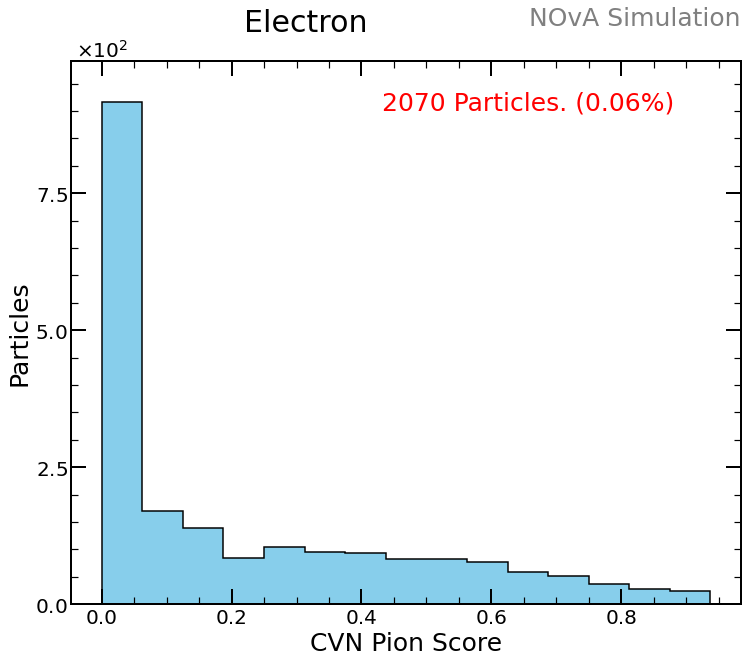

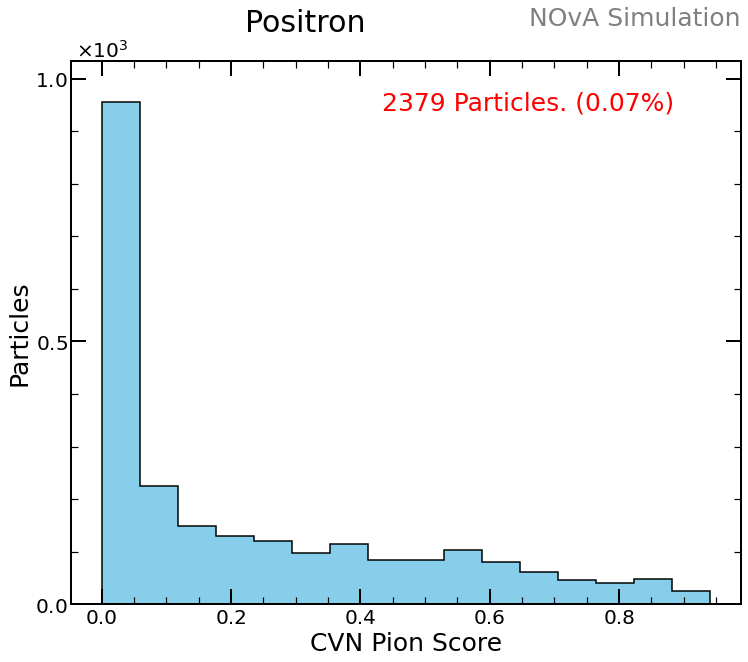

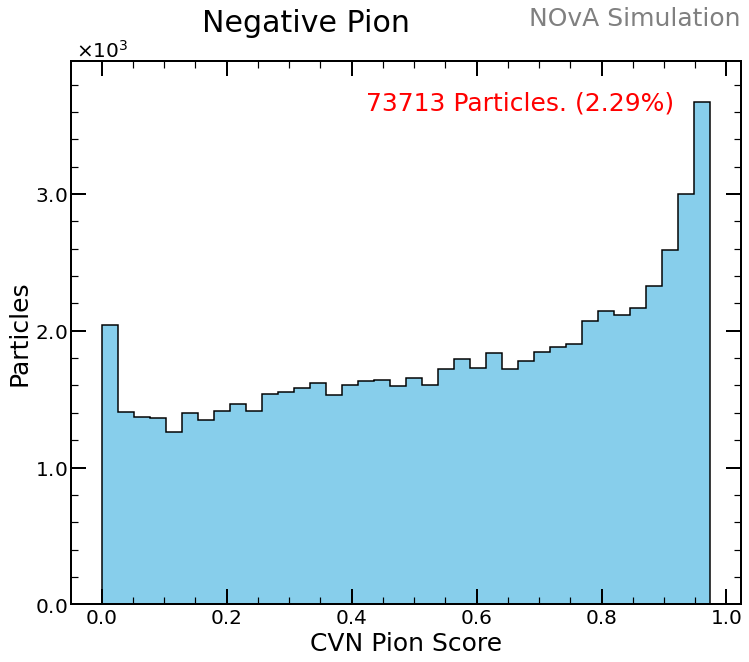

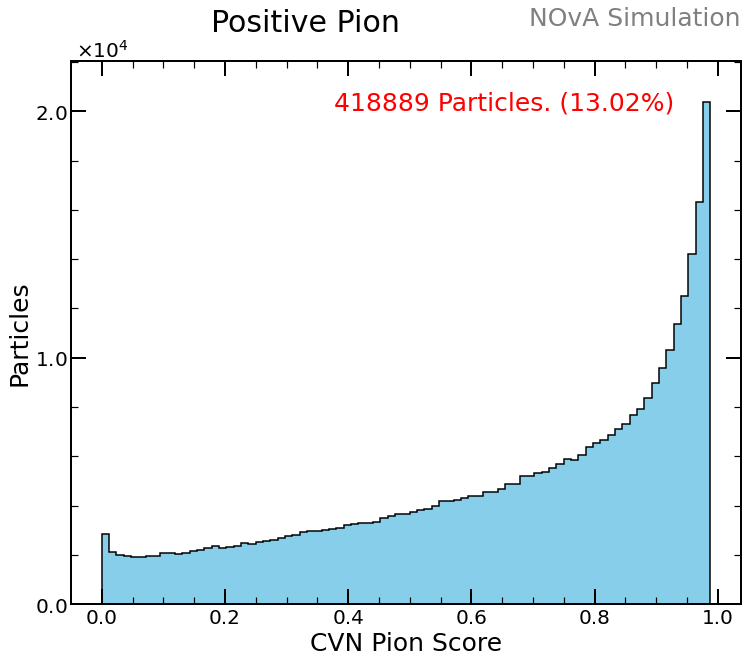

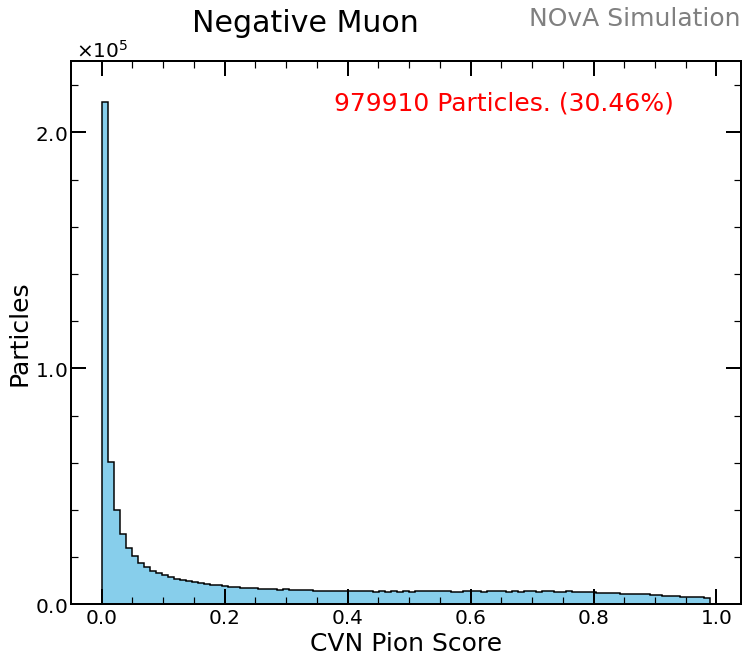

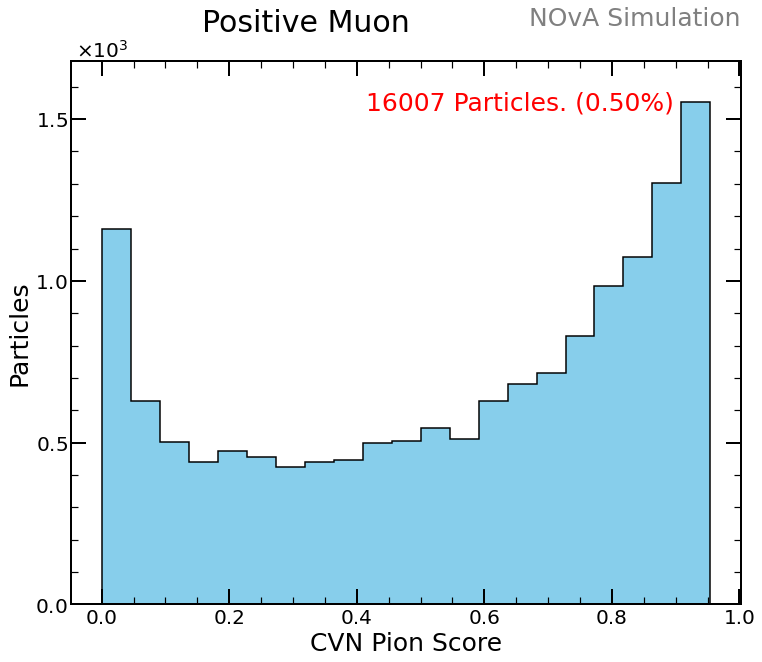

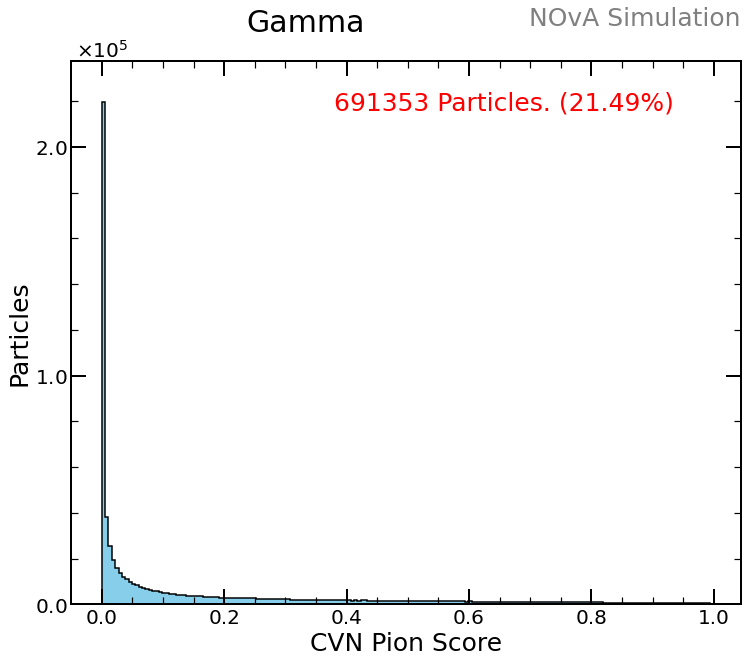

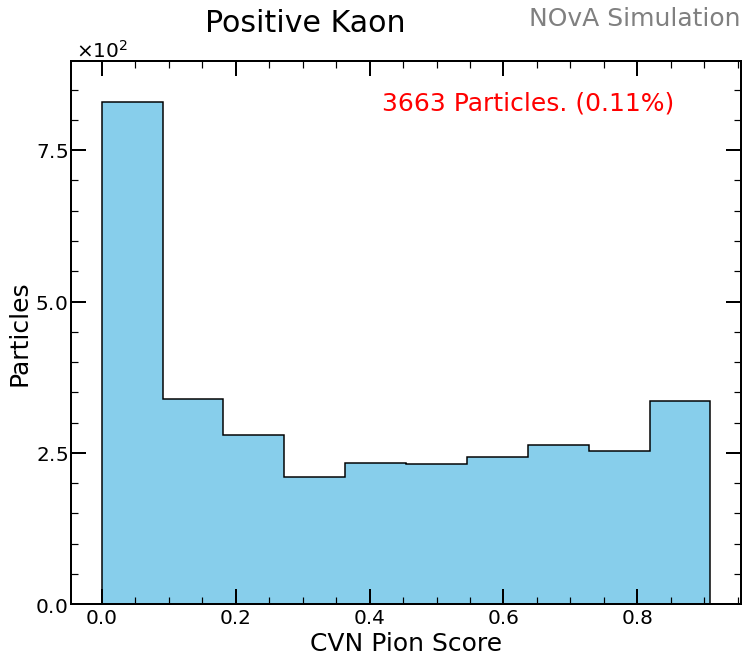

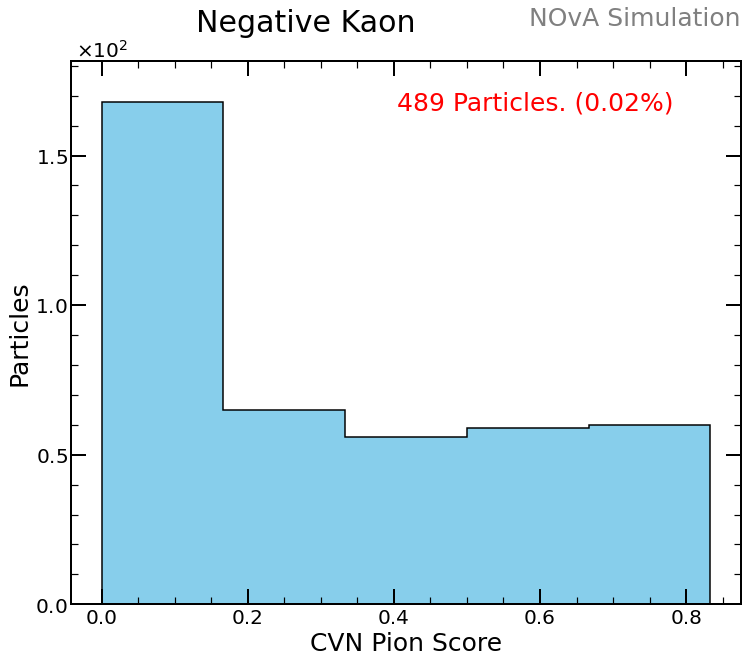

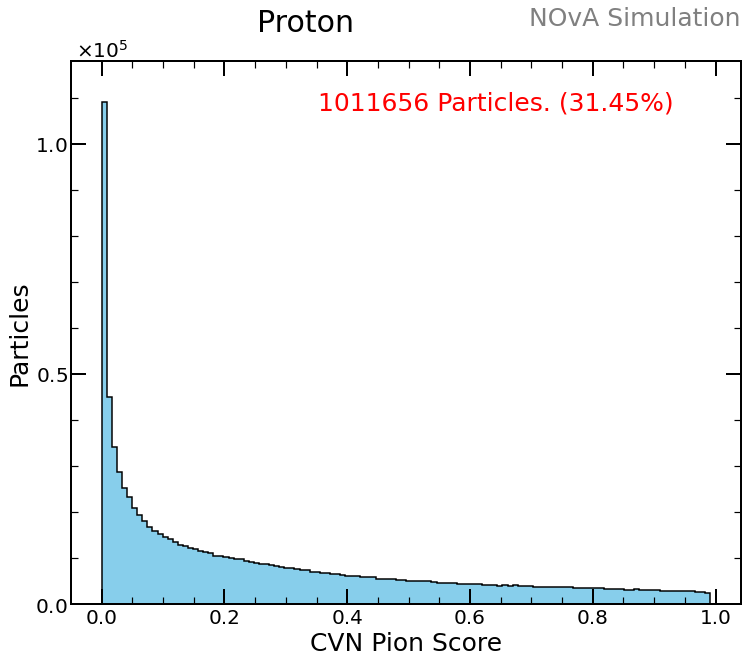

In [103]:
# Define your lists and corresponding titles
titles = ['Electron', 'Positron', 'Negative Pion', 'Positive Pion', 'Negative Muon', 'Positive Muon', 'Gamma', 'Positive Kaon', 'Negative Kaon', 'Proton']

totlen=len(cvn)

# Iterate through the lists and titles
for data, title in zip(round_lists, titles):
    percentage = len(data) * 100 / totlen
#     print(percentage)
    # Plot histogram
    plt.figure(figsize=(12, 10)) 
    plt.hist(data, bins=autobins(data,0,1), color='skyblue', histtype='stepfilled', edgecolor='black',linewidth=1.5)
    plt.xlabel('CVN Pion Score',fontsize=25)
    plt.ylabel('Particles',fontsize=25)
    plt.text(0.9, 0.9, f'{len(data)} Particles. ({percentage:.2f}%)', ha='right', va='bottom',fontsize=25, color='red', transform=plt.gca().transAxes)
#     plt.text(n_value + 0.005, plt.ylim()[1] * 0.9, f'{total_percent_before_line:.2f}% below', ha='left', va='bottom', fontsize=15, color='red')
#     ({percentage:.2f}%)
    # Set title
    plt.title(f'{title}', x=0.35, y=1.044,fontsize=30)
    set_plot_style()
    set_sn2()
    plt.locator_params(axis='y', nbins=4)
    # Save the plot
    #plt.savefig(f"{folder}/analysisfiles/images/histogram_cvn_for_{title}_{folder}.png", bbox_inches='tight')
    plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/histogram_cvn_for_{title}_total.png', bbox_inches='tight')
    
    # Display the plot
    plt.show()

In [15]:
#lets examine the pions whose cvn value is less that 0.3 and check its properties

start_time = time.time()


folders=['Res','DIS','MEC','QE']


cvn=[]
energies=[]
calenergies=[]
hits=[]
length=[]
theta=[]
alpha=[]



        

for folder in folders:
    temp=[]
    temp=read_file(folder,'analysisfiles/CVN_part1')
    cvn.extend([float(element) for sublist in temp for element in sublist])
    temp2=[]
    temp2=read_file(folder,'analysisfiles/energiesNT_part1')
    energies.extend([float(element)-0.139 for sublist in temp2 for element in sublist])
    temp3=[]
    temp3=read_file(folder,'analysisfiles/calenergies_part1')
    calenergies.extend([float(element) for sublist in temp3 for element in sublist])
    temp4=[]
    temp4=read_file(folder,'analysisfiles/numhits_part1')
    hits.extend([int(element) for sublist in temp4 for element in sublist])
    temp5=[]
    temp5=read_file(folder,'analysisfiles/length_part1')
    length.extend([float(element) for sublist in temp5 for element in sublist])
    temp6=[]
    temp6=read_file(folder,'analysisfiles/theta_part1')
    theta.extend([float(element)*(180 / math.pi) for sublist in temp6 for element in sublist])
    temp7=[]
    temp7=read_file(folder,'analysisfiles/alpha_part1')
    for event in temp7:
        l = len(event)
        num =int(l/3)-1
        mm=0
        for i in range(num):
            mm=mm+3
            vector1 = np.array([float(event[0]), float(event[1]), float(event[2])])
            vector2 = np.array([float(event[mm]), float(event[mm+1]), float(event[mm+2])])
            dot_product = np.dot(vector1, vector2)
            magnitude_product = np.linalg.norm(vector1) * np.linalg.norm(vector2)
            cosine_theta = dot_product / magnitude_product
            #save the cosine
            #alpha.append(cosine_theta)
            angle_radians = np.arccos(cosine_theta)
            degrees_angle = angle_radians * (180 / math.pi)
            #alpha.append(angle_radians)
            alpha.append(degrees_angle)
    
            
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")    
    
    


Elapsed time: 7.996044635772705 seconds


In [16]:
energies_cvn=[]
calenergies_cvn=[]
hits_cvn=[]
length_cvn=[]
alpha_cvn=[]
theta_cvn=[]

threshold=0.25


for i,element in enumerate(cvn):
    if element < threshold:
        energies_cvn.append(energies[i])
        calenergies_cvn.append(calenergies[i])
        hits_cvn.append(hits[i])
        alpha_cvn.append(alpha[i])
        theta_cvn.append(theta[i])
        length_cvn.append(length[i])


In [106]:
#How maby pions are below threshold?
npions=len(energies_cvn)
npionstot=len(energies)
percentage=npions*100/npionstot
print(f'below threshold {threshold}, are {npions}, representing {percentage:.2f}%')



below threshold 0.25, are 30514, representing 9.96%


In [153]:
mean1=0
suma=0
for element in hits:
    suma=suma+element
averagehits1=suma/len(hits)

mean2=0
suma2=0
for element in hits_cvn:
    suma2=suma2+element
averagehits2=suma2/len(hits_cvn)

print(f'para hits 1: {averagehits1}, y para hits cvn: {averagehits2}')

#find the average amount of pions with low hitting in both distributions.

lowhit1=0
for element in hits:
    if element <6:
        lowhit1=lowhit1+1
averagelowhit1=lowhit1/len(hits)*100

lowhit2=0
for element in hits_cvn:
    if element <6:
        lowhit2=lowhit2+1
averagelowhit2=lowhit2/len(hits_cvn)*100


print(f'para hits: {averagelowhit1} y para hitscv: {averagelowhit2}')

para hits 1: 17.474234006019575, y para hits cvn: 18.26853247689585
para hits: 20.70746309583657 y para hitscv: 31.539621157501475


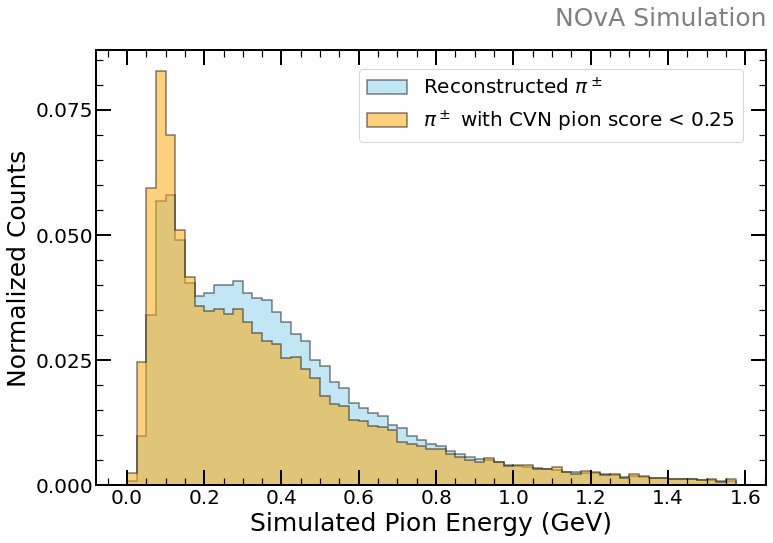

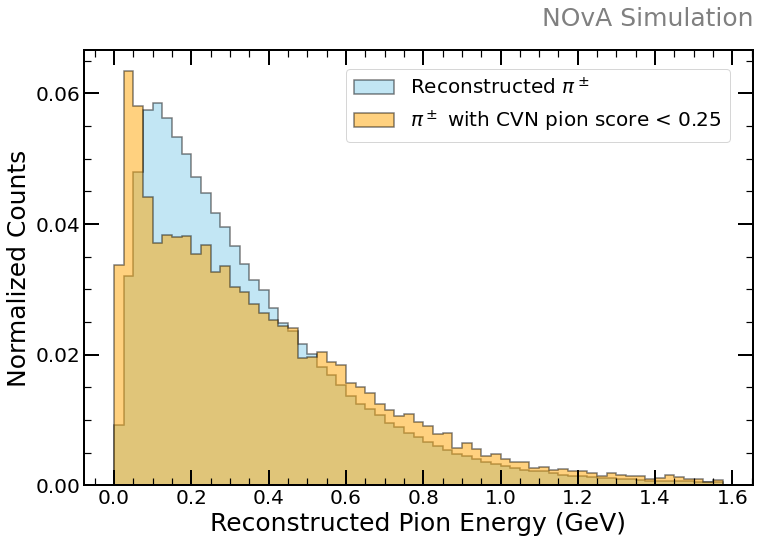

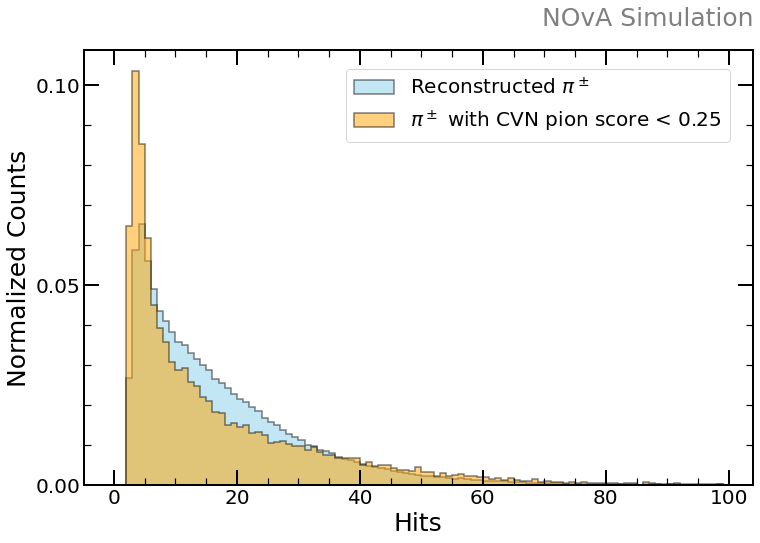

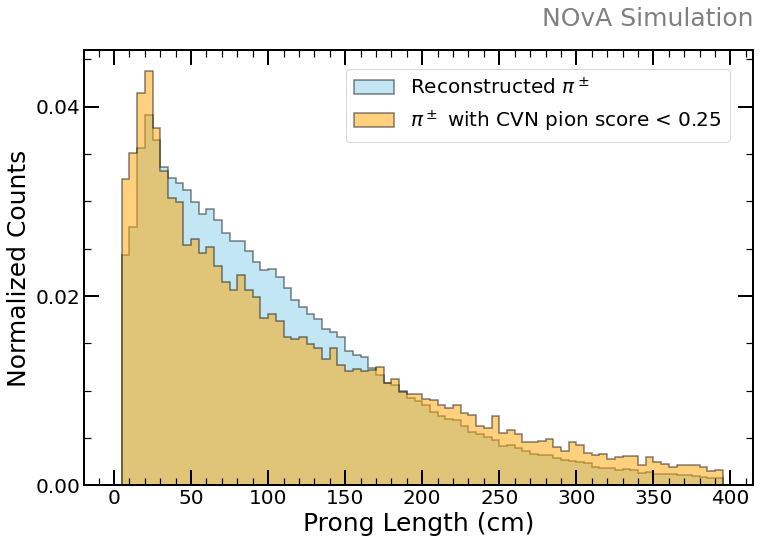

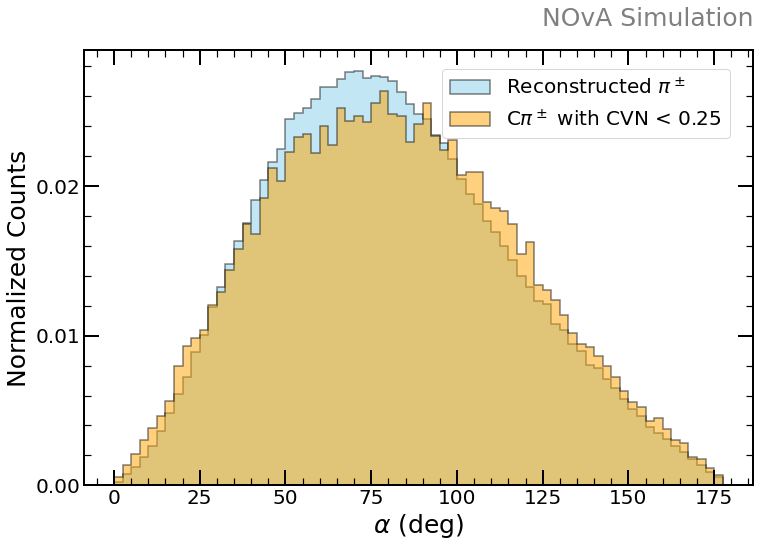

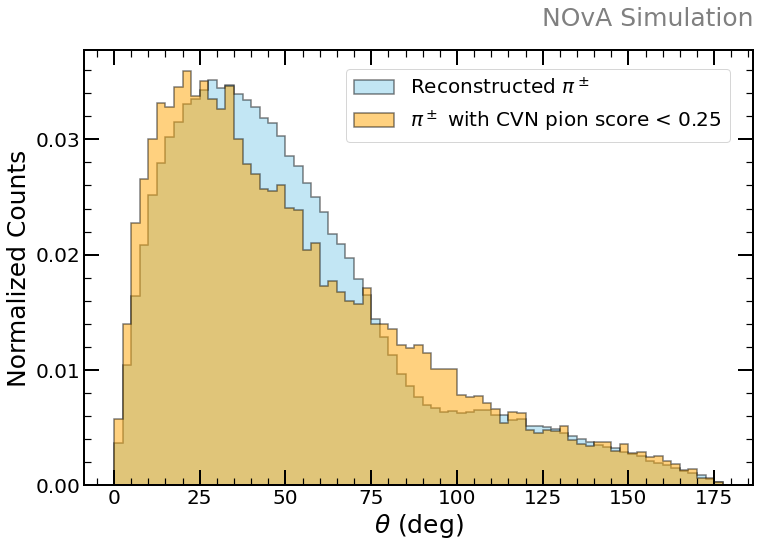

In [19]:

#energy
weights = np.ones_like(energies) / len(energies)
weights2 = np.ones_like(energies_cvn) / len(energies_cvn)
plt.figure(figsize=(12, 8)) 
bin_edges=np.arange(0,1.6,0.025)
# bins=autobins(energies,0,1.5)
plt.hist(energies, bins=bin_edges, color='skyblue', alpha=0.5,label=fr'Reconstructed $\pi^\pm$', histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights)
plt.hist(energies_cvn, bins=bin_edges, color='orange',label=fr'$\pi^\pm$ with CVN pion score < {threshold}', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights2)
plt.xlabel('Simulated Pion Energy (GeV)',fontsize=25)
plt.ylabel('Normalized Counts',fontsize=25)
# plt.title(f'Simulated Energy', x=0.35, y=1.044, fontsize=30)
plt.legend(fontsize=20, loc='upper right',bbox_to_anchor=(0.98, 0.98))
set_plot_style()
plt.locator_params(axis='y', nbins=4)
# Save the plot
#plt.savefig(f"{folder}/analysisfiles/images/histogram_cvn_for_{title}_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/energy_for_cvn_with_treshold_total.png', bbox_inches='tight')
# Display the plot
plt.show()

#calenergy
weights = np.ones_like(calenergies) / len(calenergies)
weights2 = np.ones_like(calenergies_cvn) / len(calenergies_cvn)
plt.figure(figsize=(12, 8)) 
# autobins(calenergies,0,1.5)
plt.hist(calenergies, bins=bin_edges, color='skyblue',label=fr'Reconstructed $\pi^\pm$',alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights)
plt.hist(calenergies_cvn, bins=bin_edges, color='orange',label=fr'$\pi^\pm$ with CVN pion score < {threshold}', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights2)
plt.xlabel('Reconstructed Pion Energy (GeV)',fontsize=25)
plt.ylabel('Normalized Counts',fontsize=25)
plt.legend(fontsize=20, loc='upper right',bbox_to_anchor=(0.98, 0.98))
#     plt.title(f'{title}', x=0.35, y=1.044,fontsize=30)
set_plot_style()
plt.locator_params(axis='y', nbins=4)
# Save the plot
#plt.savefig(f"{folder}/analysisfiles/images/histogram_cvn_for_{title}_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/calenergy_for_cvn_with_treshold_total.png', bbox_inches='tight')

# Display the plot
plt.show()

#hits
weights = np.ones_like(hits) / len(hits)
weights2 = np.ones_like(hits_cvn) / len(hits_cvn)
bin_size=1
bin_edges = np.arange(0, 100, bin_size)
plt.figure(figsize=(12, 8)) 
plt.hist(hits, bins=bin_edges, color='skyblue',label=fr'Reconstructed $\pi^\pm$', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights)
plt.hist(hits_cvn, bins=bin_edges, color='orange', label=fr'$\pi^\pm$ with CVN pion score < {threshold}',alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights2)
plt.xlabel('Hits',fontsize=25)
plt.ylabel('Normalized Counts',fontsize=25)
plt.legend(fontsize=20, loc='upper right',bbox_to_anchor=(0.98, 0.98))
#     plt.title(f'{title}', x=0.35, y=1.044,fontsize=30)
set_plot_style()
#     set_sn2()
plt.locator_params(axis='y', nbins=4)
# Save the plot
#plt.savefig(f"{folder}/analysisfiles/images/histogram_cvn_for_{title}_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/hits_for_cvn_with_treshold_total.png', bbox_inches='tight')

# Display the plot
plt.show()


#length
weights = np.ones_like(length) / len(length)
weights2 = np.ones_like(length_cvn) / len(length_cvn)
plt.figure(figsize=(12, 8)) 
bin_edges=np.arange(0,400,5)
# autobins(length,0,450)
plt.hist(length, bins=bin_edges, color='skyblue',label=fr'Reconstructed $\pi^\pm$', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights)
plt.hist(length_cvn, bins=bin_edges, color='orange', label=fr'$\pi^\pm$ with CVN pion score < {threshold}',alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights2)
plt.xlabel('Prong Length (cm)',fontsize=25)
plt.ylabel('Normalized Counts',fontsize=25)
plt.legend(fontsize=20, loc='upper right',bbox_to_anchor=(0.98, 0.98))
# Set title
#     plt.title(f'{title}', x=0.35, y=1.044,fontsize=30)
set_plot_style()
#     set_sn2()
plt.locator_params(axis='y', nbins=4)
# Save the plot
#plt.savefig(f"{folder}/analysisfiles/images/histogram_cvn_for_{title}_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/length_for_cvn_with_treshold_total.png', bbox_inches='tight')

# Display the plot
plt.show()

#alpha
weights = np.ones_like(alpha) / len(alpha)
weights2 = np.ones_like(alpha_cvn) / len(alpha_cvn)
bin_edges=np.arange(0,180,2.5)
plt.figure(figsize=(12, 8)) 
# autobins(alpha)
plt.hist(alpha, bins=bin_edges, color='skyblue',label=fr'Reconstructed $\pi^\pm$', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights)
plt.hist(alpha_cvn, bins=bin_edges, color='orange', label=fr'C$\pi^\pm$ with CVN < {threshold}',alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights2)
plt.xlabel(fr'$\alpha$ (deg)',fontsize=25)
plt.ylabel('Normalized Counts',fontsize=25)
plt.legend(fontsize=20, loc='upper right',bbox_to_anchor=(0.98, 0.98))
#     plt.title(f'{title}', x=0.35, y=1.044,fontsize=30)
set_plot_style()
#     set_sn2()
plt.locator_params(axis='y', nbins=4)
# Save the plot
#plt.savefig(f"{folder}/analysisfiles/images/histogram_cvn_for_{title}_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/alpha_for_cvn_with_treshold_total.png', bbox_inches='tight')

# Display the plot
plt.show()


#theta
weights = np.ones_like(theta) / len(theta)
weights2 = np.ones_like(theta_cvn) / len(theta_cvn)
plt.figure(figsize=(12, 8)) 
plt.hist(theta, bins=bin_edges, color='skyblue',label=fr'Reconstructed $\pi^\pm$', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights)
plt.hist(theta_cvn, bins=bin_edges, color='orange',label=fr'$\pi^\pm$ with CVN pion score < {threshold}', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights2)
plt.xlabel(fr'$\theta$ (deg)',fontsize=25)
plt.ylabel('Normalized Counts',fontsize=25)
plt.legend(fontsize=20, loc='upper right',bbox_to_anchor=(0.98, 0.98))
#     plt.title(f'{title}', x=0.35, y=1.044,fontsize=30)
set_plot_style()
#     set_sn2()
plt.locator_params(axis='y', nbins=4)
# Save the plot
#plt.savefig(f"{folder}/analysisfiles/images/histogram_cvn_for_{title}_{folder}.png", bbox_inches='tight')
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/theta_for_cvn_with_treshold_total.png', bbox_inches='tight')

# Display the plot
plt.show()

In [3]:
#here i want to check the behavior ofbackground particles with high cvn score value to see if there are some hints there.
start_time = time.time()


folders=['Res','DIS','MEC','QE']


pdg=[]
cvn=[]
cale=[]
hits=[]
length=[]

for folder in folders:
    temp=[]
    temp=read_file2(folder,'pdgpngvars_total')
    pdg.extend([float(element) for sublist in temp for element in sublist])
    temp2=[]
    temp2=read_file2(folder,'cvnvars_total')
    cvn.extend([float(element) for sublist in temp2 for element in sublist])
    temp3=[]
    temp3=read_file2(folder,'calenergiesvars_total')
    cale.extend([float(element) for sublist in temp3 for element in sublist])
    temp4=[]
    temp4=read_file2(folder,'pronghitshvars_total')
    hits.extend([int(element) for sublist in temp4 for element in sublist])
    temp5=[]
    temp5=read_file2(folder,'pronglengthvars_total')
    length.extend([float(element) for sublist in temp5 for element in sublist])
    
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 14.248315334320068 seconds


In [4]:
particle_data = {
    13: {'E_full': [], 'H_full': [], 'L_full': [],'E_cvn': [], 'H_cvn': [], 'L_cvn': []},  # Muon
    2212: {'E_full': [], 'H_full': [], 'L_full': [],'E_cvn': [], 'H_cvn': [], 'L_cvn': []},  # Proton
    22: {'E_full': [], 'H_full': [], 'L_full': [],'E_cvn': [], 'H_cvn': [], 'L_cvn': []},  # Gamma
    -13: {'E_full': [], 'H_full': [], 'L_full': [],'E_cvn': [], 'H_cvn': [], 'L_cvn': []},  # Positron
    211: {'E_full': [], 'H_full': [], 'L_full': [],'E_cvn': [], 'H_cvn': [], 'L_cvn': []},  # ALL C pions
    # Add other particle types here as needed
}

threshold=0.75
# Loop through the particles and fill the dictionaries
for j, element in enumerate(pdg):
    if int(element) == -211:
            particle_data[211]['E_full'].append(cale[j])
            particle_data[211]['H_full'].append(hits[j])
            particle_data[211]['L_full'].append(length[j])
    if int(element) in particle_data:
        particle_data[int(element)]['E_full'].append(cale[j])
        particle_data[int(element)]['H_full'].append(hits[j])
        particle_data[int(element)]['L_full'].append(length[j])
        
# same but apply cvn cut
for j, element in enumerate(pdg):
    if cvn[j] > threshold:
        if int(element) == -211:
            particle_data[211]['E_cvn'].append(cale[j])
            particle_data[211]['H_cvn'].append(hits[j])
            particle_data[211]['L_cvn'].append(length[j])
        if int(element) in particle_data:
            particle_data[int(element)]['E_cvn'].append(cale[j])
            particle_data[int(element)]['H_cvn'].append(hits[j])
            particle_data[int(element)]['L_cvn'].append(length[j])

# Example of accessing the data for a specific particle
# print("Muon E_full:", particle_data[13]['E_full'])
# print("Proton E_full:", particle_data[2212]['E_full'])

In [29]:
percentage=len(particle_data[13]['E_cvn'])*100/len(particle_data[13]['E_full'])
lenn=len(particle_data[13]['E_cvn'])
print(f'muons count: {lenn}, corresponding to {percentage:.2f}%')

lenn=len(particle_data[2212]['E_cvn'])
percentage=len(particle_data[2212]['E_cvn'])*100/len(particle_data[2212]['E_full'])
print(f'protons count: {lenn}, corresponding to {percentage:.2f}%')

lenn=len(particle_data[22]['E_cvn'])
percentage=len(particle_data[22]['E_cvn'])*100/len(particle_data[22]['E_full'])
print(f'gammas count: {lenn}, corresponding to {percentage:.2f}%')

lenn=len(particle_data[211]['E_cvn'])
percentage=len(particle_data[211]['E_cvn'])*100/len(particle_data[211]['E_full'])
print(f'charged pions count: {lenn}, corresponding to {percentage:.2f}%')

muons count: 104823, corresponding to 10.70%
protons count: 94949, corresponding to 9.39%
gammas count: 31222, corresponding to 4.52%
charged pions count: 237740, corresponding to 48.26%


In [38]:
count=0
for element in particle_data[13]['E_full']:
    if 0.05 < element < 0.55:
        count=count+1
percentage=count*100/len(particle_data[13]['E_full'])
print(f'For muons original, the amount of data in between is {count}, representing {percentage:.2f}%')

count2=0
for element in particle_data[13]['E_cvn']:
    if 0.05 < element < 0.55:
        count2=count2+1
percentage=count2*100/len(particle_data[13]['E_cvn'])
print(f'For muons cvn, the amount of data in between is {count2}, representing {percentage:.2f}%')
p2=count2*100/count
print(f'which means, all cvn high reco muons in this regions are: {p2:.2f}%')

For muons original, the amount of data in between is 393813, representing 40.19%
For muons cvn, the amount of data in between is 74942, representing 71.49%
which means, all cvn high reco muons in this regions are: 19.03%


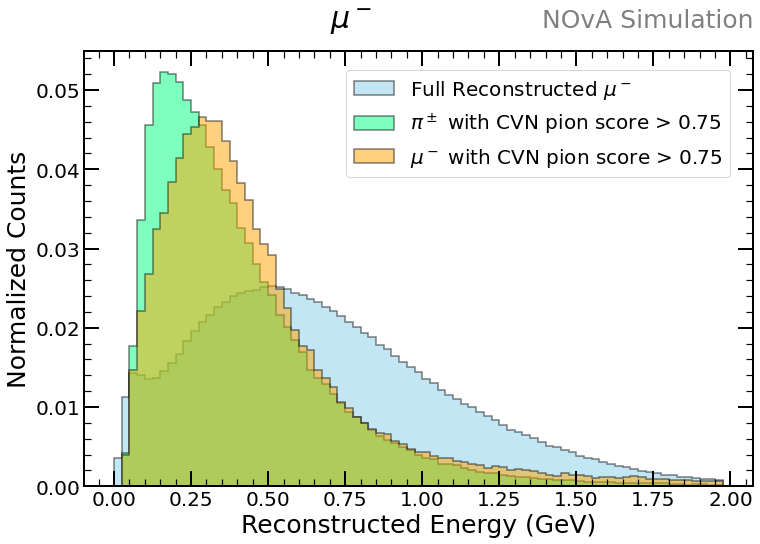

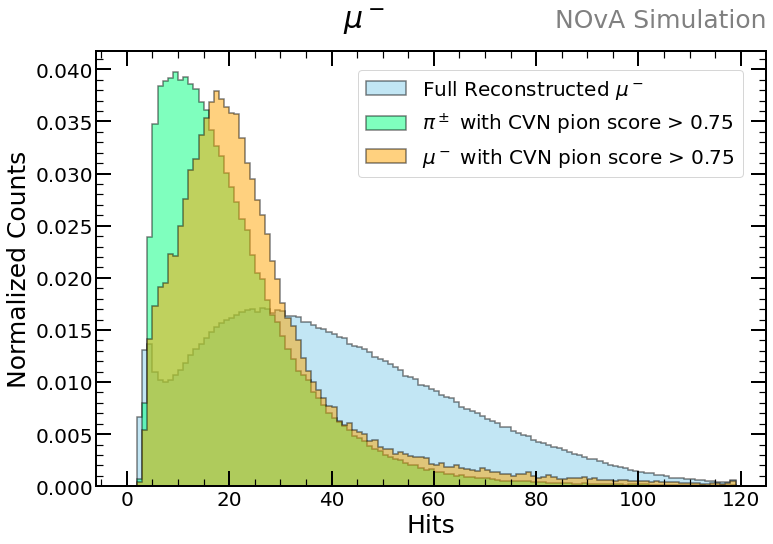

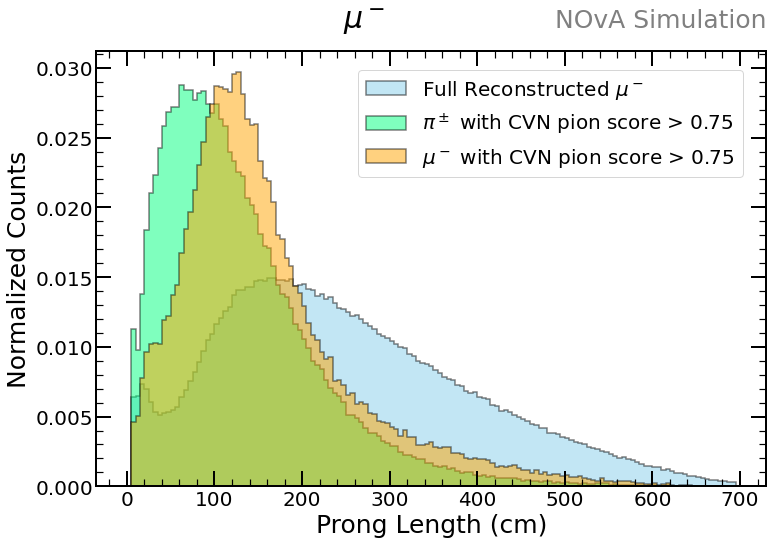

In [25]:
#muons

weights = np.ones_like(particle_data[13]['E_full']) / len(particle_data[13]['E_full'])
weights2 = np.ones_like(particle_data[13]['E_cvn']) / len(particle_data[13]['E_cvn'])

weights3 = np.ones_like(particle_data[211]['E_cvn']) / len(particle_data[211]['E_cvn'])
bin_edges=np.arange(0,2,0.025)
# bins=autobins(particle_data[13]['E_full'],0,2)
plt.figure(figsize=(12, 8))
plt.hist(particle_data[13]['E_full'], bins=bin_edges, label=fr'Full Reconstructed $\mu^-$',color='skyblue', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights)
plt.hist(particle_data[211]['E_cvn'], bins=bin_edges, label=fr'$\pi^\pm$ with CVN pion score > {threshold}',color='springgreen', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights3)

plt.hist(particle_data[13]['E_cvn'], bins=bin_edges, label=fr'$\mu^-$ with CVN pion score > {threshold}',color='orange', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights2)


plt.xlabel('Reconstructed Energy (GeV)',fontsize=25)
plt.ylabel('Normalized Counts',fontsize=25)
plt.title(fr'$\mu^-$',x=0.4,y=1.04,fontsize=30)
plt.legend(fontsize=20,loc='upper right',bbox_to_anchor=(0.98, 0.98))
set_plot_style()
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/mu_energy_for_cvn_with_treshold_total.png', bbox_inches='tight')
plt.show()

weights = np.ones_like(particle_data[13]['H_full']) / len(particle_data[13]['H_full'])
weights2 = np.ones_like(particle_data[13]['H_cvn']) / len(particle_data[13]['H_cvn'])
bin_edges=np.arange(0,120,1)
plt.figure(figsize=(12, 8))
plt.hist(particle_data[13]['H_full'], bins=bin_edges,label=fr'Full Reconstructed $\mu^-$', color='skyblue', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights)
plt.hist(particle_data[211]['H_cvn'], bins=bin_edges, label=fr'$\pi^\pm$ with CVN pion score > {threshold}',color='springgreen', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights3)
plt.hist(particle_data[13]['H_cvn'], bins=bin_edges, label=fr'$\mu^-$ with CVN pion score > {threshold}',color='orange', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights2)



plt.xlabel('Hits',fontsize=25)
plt.ylabel('Normalized Counts',fontsize=25)
plt.title(fr'$\mu^-$',x=0.4,y=1.04,fontsize=30)
plt.legend(fontsize=20,loc='upper right',bbox_to_anchor=(0.98, 0.98))
set_plot_style()
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/mu_hits_for_cvn_with_treshold_total.png', bbox_inches='tight')
plt.show()

weights = np.ones_like(particle_data[13]['L_full']) / len(particle_data[13]['L_full'])
weights2 = np.ones_like(particle_data[13]['L_cvn']) / len(particle_data[13]['L_cvn'])
bin_edges=np.arange(0,700,5)
# bins=autobins(particle_data[13]['L_full'],0,700)
plt.figure(figsize=(12, 8))
plt.hist(particle_data[13]['L_full'], bins=bin_edges,label=fr'Full Reconstructed $\mu^-$', color='skyblue', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights)
plt.hist(particle_data[211]['L_cvn'], bins=bin_edges,label=fr'$\pi^\pm$ with CVN pion score > {threshold}', color='springgreen', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights3)

plt.hist(particle_data[13]['L_cvn'], bins=bin_edges,label=fr'$\mu^-$ with CVN pion score > {threshold}', color='orange', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights2)


plt.xlabel('Prong Length (cm)',fontsize=25)
plt.ylabel('Normalized Counts',fontsize=25)
plt.title(fr'$\mu^-$',x=0.4,y=1.04,fontsize=30)
plt.legend(fontsize=20,loc='upper right',bbox_to_anchor=(0.98, 0.98))
set_plot_style()
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/mu_length_for_cvn_with_treshold_total.png', bbox_inches='tight')
# plt.show()





In [50]:
count=0
for element in particle_data[2212]['E_full']:
    if 0.25 < element < 0.50:
        count=count+1
percentage=count*100/len(particle_data[2212]['E_full'])
print(f'For muons original, the amount of data in between is {count}, representing {percentage:.2f}%')

count2=0
for element in particle_data[2212]['E_cvn']:
    if 0.25 < element < 0.50:
        count2=count2+1
percentage=count2*100/len(particle_data[2212]['E_cvn'])
print(f'For muons cvn, the amount of data in between is {count2}, representing {percentage:.2f}%')
p2=count2*100/count
print(f'which means, all cvn high reco muons in this regions are: {p2:.2f}%')

For muons original, the amount of data in between is 344059, representing 34.01%
For muons cvn, the amount of data in between is 38730, representing 40.79%
which means, all cvn high reco muons in this regions are: 11.26%
1011656


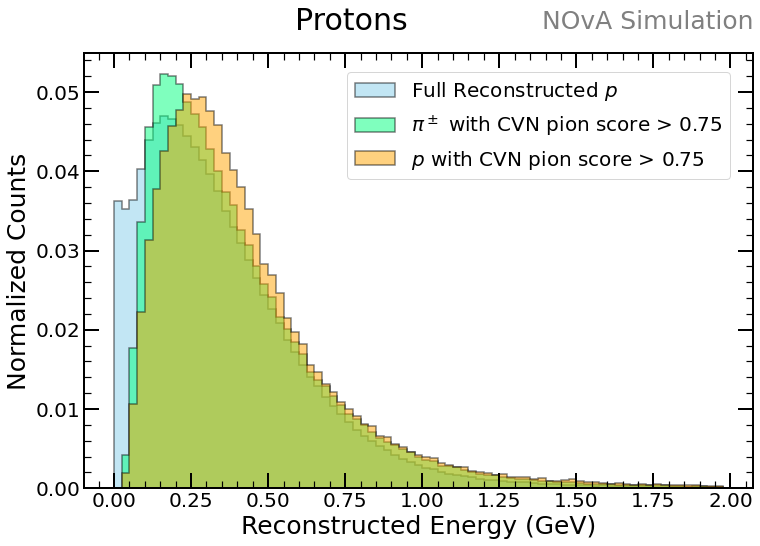

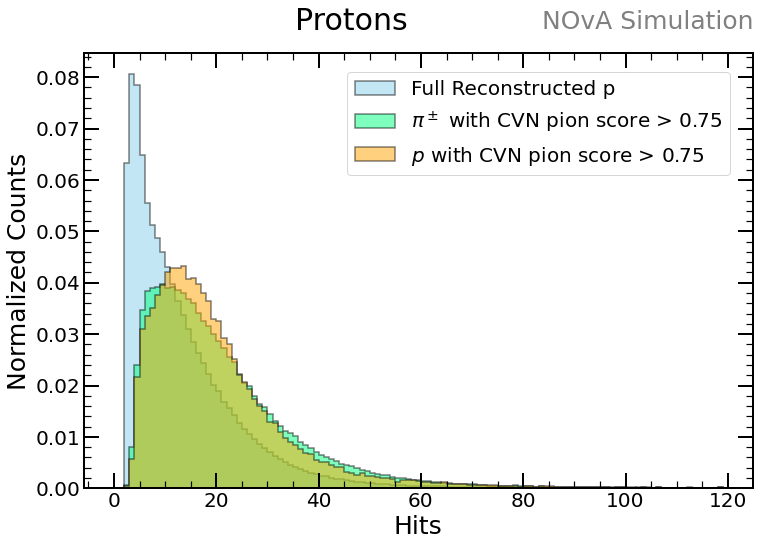

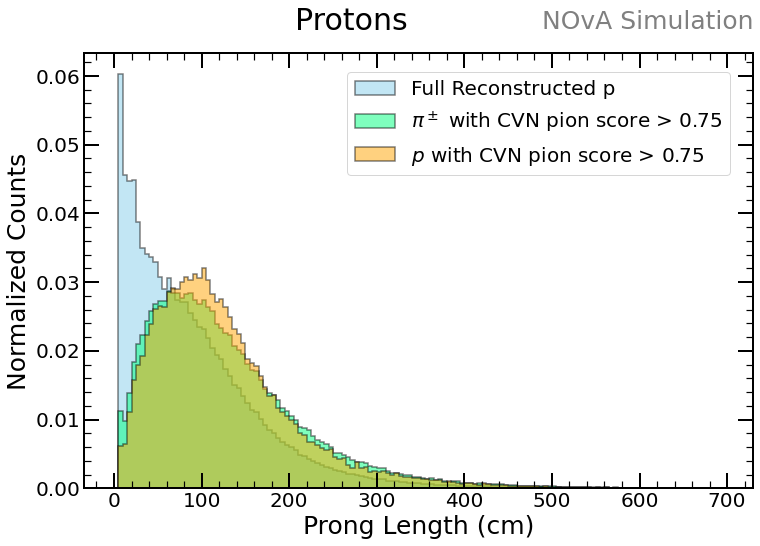

In [26]:
#protons

weights = np.ones_like(particle_data[2212]['E_full']) / len(particle_data[2212]['E_full'])
weights2 = np.ones_like(particle_data[2212]['E_cvn']) / len(particle_data[2212]['E_cvn'])
weights3 = np.ones_like(particle_data[211]['E_cvn']) / len(particle_data[211]['E_cvn'])
plt.figure(figsize=(12, 8))
bin_edges=np.arange(0,2,0.025)
# bins=autobins(particle_data[2212]['E_full'],0,2)
plt.hist(particle_data[2212]['E_full'], bins=bin_edges, label=fr'Full Reconstructed $p$',color='skyblue', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights)
plt.hist(particle_data[211]['E_cvn'], bins=bin_edges, label=fr'$\pi^\pm$ with CVN pion score > {threshold}',color='springgreen', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights3)

plt.hist(particle_data[2212]['E_cvn'], bins=bin_edges, label=fr'$p$ with CVN pion score > {threshold}',color='orange', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights2)



plt.xlabel('Reconstructed Energy (GeV)',fontsize=25)
plt.ylabel('Normalized Counts',fontsize=25)
plt.title(fr'Protons',x=0.4,y=1.04,fontsize=30)
plt.legend(fontsize=20,loc='upper right',bbox_to_anchor=(0.98, 0.98))
set_plot_style()
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/proton_energy_for_cvn_with_treshold_total.png', bbox_inches='tight')
plt.show()

weights = np.ones_like(particle_data[2212]['H_full']) / len(particle_data[2212]['H_full'])
weights2 = np.ones_like(particle_data[2212]['H_cvn']) / len(particle_data[2212]['H_cvn'])
bin_edges=np.arange(0,120,1)
plt.figure(figsize=(12, 8))
plt.hist(particle_data[2212]['H_full'], bins=bin_edges,label=fr'Full Reconstructed p', color='skyblue', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights)
plt.hist(particle_data[211]['H_cvn'], bins=bin_edges, label=fr'$\pi^\pm$ with CVN pion score > {threshold}',color='springgreen', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights3)

plt.hist(particle_data[2212]['H_cvn'], bins=bin_edges, label=fr'$p$ with CVN pion score > {threshold}',color='orange', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights2)


plt.xlabel('Hits',fontsize=25)
plt.ylabel('Normalized Counts',fontsize=25)
plt.title(fr'Protons',x=0.4,y=1.04,fontsize=30)
plt.legend(fontsize=20,loc='upper right',bbox_to_anchor=(0.98, 0.98))
set_plot_style()
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/proton_hits_for_cvn_with_treshold_total.png', bbox_inches='tight')
plt.show()

weights = np.ones_like(particle_data[2212]['L_full']) / len(particle_data[2212]['L_full'])
weights2 = np.ones_like(particle_data[2212]['L_cvn']) / len(particle_data[2212]['L_cvn'])
plt.figure(figsize=(12, 8))
bin_edges=np.arange(0,700,5)
# bins=autobins(particle_data[2212]['L_full'],0,700)
plt.hist(particle_data[2212]['L_full'], bins=bin_edges,label=fr'Full Reconstructed p', color='skyblue', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights)
plt.hist(particle_data[211]['L_cvn'], bins=bin_edges, label=fr'$\pi^\pm$ with CVN pion score > {threshold}',color='springgreen', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights3)

plt.hist(particle_data[2212]['L_cvn'], bins=bin_edges,label=fr'$p$ with CVN pion score > {threshold}', color='orange', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights2)


plt.xlabel('Prong Length (cm)',fontsize=25)
plt.ylabel('Normalized Counts',fontsize=25)
plt.title(fr'Protons',x=0.4,y=1.04,fontsize=30)
plt.legend(fontsize=20,loc='upper right',bbox_to_anchor=(0.98, 0.98))
set_plot_style()
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/proton_length_for_cvn_with_treshold_total.png', bbox_inches='tight')
plt.show()


In [43]:
count=0
for element in particle_data[22]['E_full']:
    if 0.2 < element < 0.75:
        count=count+1
percentage=count*100/len(particle_data[22]['E_full'])
print(f'For muons original, the amount of data in between is {count}, representing {percentage:.2f}%')

count2=0
for element in particle_data[22]['E_cvn']:
    if 0.2 < element < 0.75:
        count2=count2+1
percentage=count2*100/len(particle_data[22]['E_cvn'])
print(f'For muons cvn, the amount of data in between is {count2}, representing {percentage:.2f}%')
p2=count2*100/count
print(f'which means, all cvn high reco muons in this regions are: {p2:.2f}%')

For muons original, the amount of data in between is 253006, representing 36.60%
For muons cvn, the amount of data in between is 16893, representing 54.11%
which means, all cvn high reco muons in this regions are: 6.68%


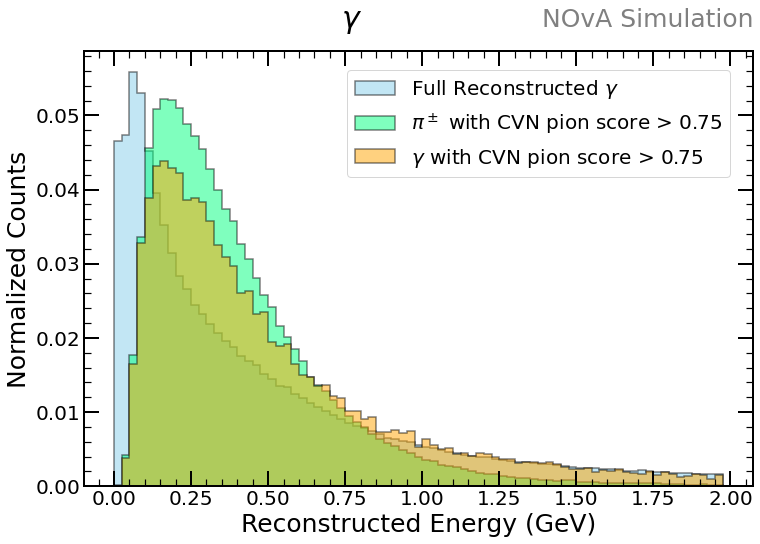

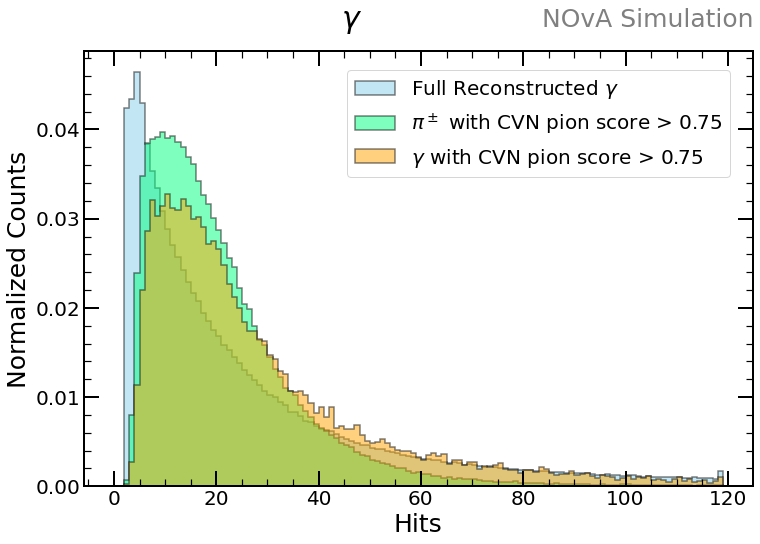

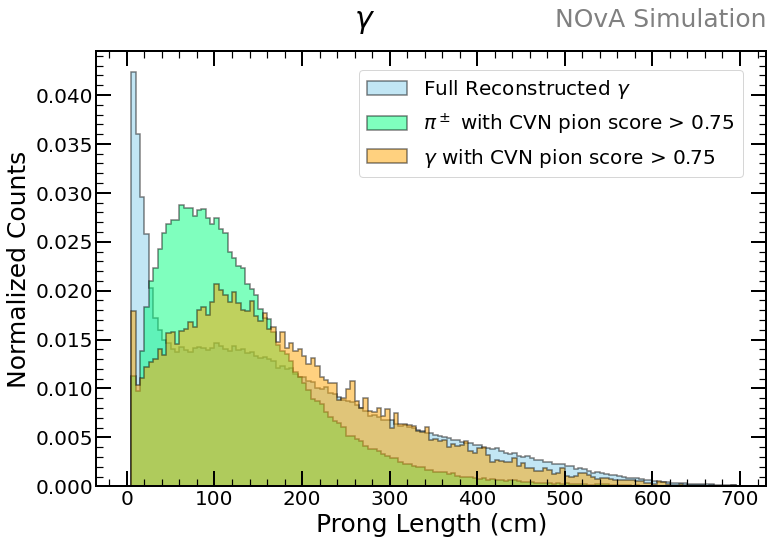

In [6]:
#gammas

weights = np.ones_like(particle_data[22]['E_full']) / len(particle_data[22]['E_full'])
weights2 = np.ones_like(particle_data[22]['E_cvn']) / len(particle_data[22]['E_cvn'])
weights3 = np.ones_like(particle_data[211]['E_cvn']) / len(particle_data[211]['E_cvn'])
# bins=autobins(particle_data[22]['E_full'],0,2)
bin_edges=np.arange(0,2,0.025)
plt.figure(figsize=(12, 8))
plt.hist(particle_data[22]['E_full'], bins=bin_edges, label=fr'Full Reconstructed $\gamma$',color='skyblue', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights)
plt.hist(particle_data[211]['E_cvn'], bins=bin_edges, label=fr'$\pi^\pm$ with CVN pion score > {threshold}',color='springgreen', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights3)

plt.hist(particle_data[22]['E_cvn'], bins=bin_edges, label=fr'$\gamma$ with CVN pion score > {threshold}',color='orange', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights2)


plt.xlabel('Reconstructed Energy (GeV)',fontsize=25)
plt.ylabel('Normalized Counts',fontsize=25)
plt.title(fr'$\gamma$',x=0.4,y=1.04,fontsize=30)
plt.legend(fontsize=20,loc='upper right',bbox_to_anchor=(0.98, 0.98))
set_plot_style()
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/gamma_energy_for_cvn_with_treshold_total.png', bbox_inches='tight')
plt.show()

weights = np.ones_like(particle_data[22]['H_full']) / len(particle_data[22]['H_full'])
weights2 = np.ones_like(particle_data[22]['H_cvn']) / len(particle_data[22]['H_cvn'])
bin_edges=np.arange(0,120,1)
plt.figure(figsize=(12, 8))
plt.hist(particle_data[22]['H_full'], bins=bin_edges,label=fr'Full Reconstructed $\gamma$', color='skyblue', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights)
plt.hist(particle_data[211]['H_cvn'], bins=bin_edges, label=fr'$\pi^\pm$ with CVN pion score > {threshold}',color='springgreen', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights3)

plt.hist(particle_data[22]['H_cvn'], bins=bin_edges, label=fr'$\gamma$ with CVN pion score > {threshold}',color='orange', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights2)


plt.xlabel('Hits',fontsize=25)
plt.ylabel('Normalized Counts',fontsize=25)
plt.title(fr'$\gamma$',x=0.4,y=1.04,fontsize=30)
plt.legend(fontsize=20,loc='upper right',bbox_to_anchor=(0.98, 0.98))
set_plot_style()
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/gamma_hits_for_cvn_with_treshold_total.png', bbox_inches='tight')
plt.show()

weights = np.ones_like(particle_data[22]['L_full']) / len(particle_data[22]['L_full'])
weights2 = np.ones_like(particle_data[22]['L_cvn']) / len(particle_data[22]['L_cvn'])
bin_edges=np.arange(0,700,5)
# bins=autobins(particle_data[22]['L_full'],0,700)
plt.figure(figsize=(12, 8))
plt.hist(particle_data[22]['L_full'], bins=bin_edges,label=fr'Full Reconstructed $\gamma$', color='skyblue', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights)
plt.hist(particle_data[211]['L_cvn'], bins=bin_edges, label=fr'$\pi^\pm$ with CVN pion score > {threshold}',color='springgreen', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights3)

plt.hist(particle_data[22]['L_cvn'], bins=bin_edges,label=fr'$\gamma$ with CVN pion score > {threshold}', color='orange', alpha=0.5,histtype='stepfilled', edgecolor='black',linewidth=1.5,weights=weights2)


plt.xlabel('Prong Length (cm)',fontsize=25)
plt.ylabel('Normalized Counts',fontsize=25)
plt.title(fr'$\gamma$',x=0.4,y=1.04,fontsize=30)
plt.legend(fontsize=20,loc='upper right',bbox_to_anchor=(0.98, 0.98))
set_plot_style()
plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/gamma_length_for_cvn_with_treshold_total.png', bbox_inches='tight')
plt.show()


In [94]:


# Calculate percentage in range
lower_bound = 0
upper_bound = 0.4

results = calculate_percentage_in_range(particle_data,13, 'E_full', lower_bound, upper_bound)
print(f"Percentage of 'E_full' values between {lower_bound} and {upper_bound}:", results)

results_cvn = calculate_percentage_in_range(particle_data,13, 'E_cvn', lower_bound, upper_bound)
print(f"Percentage of 'E_cvn' values between {lower_bound} and {upper_bound}:", results_cvn)

Percentage of 'E_full' values between 0 and 0.4: {13: 26.727964813095078, 2212: 65.12727646551792, 22: 53.743312027285626, -13: 55.46948210158056}
Percentage of 'E_cvn' values between 0 and 0.4: {13: 52.75941348749797, 2212: 56.40080464249229, 22: 50.903209275510854, -13: 65.57151589242054}


In [ ]:
HERE IM COMPUTING ALL PERCENTAGES USED IN THE SUMMARY TABLES.

In [10]:
#check the amount of unreconstructed pions in each mode to be under a certain value of energy
#DONT USE, INSTEAD KEEP TO THE NUMBERS IN THE FIGURE 5.10
folders=['Res','DIS','QE','MEC']
threshold=0.05
for folder in folders:
    count=0
    temp2=[]
    epiNTshift_part2=[]
    temp2=read_file(folder, 'analysisfiles/energiesNT_part2')
    epiNTshift_part2.extend([float(element)-0.139 for sublist in temp2 for element in sublist])
    for element in epiNTshift_part2:
        if element < threshold:
            count=count+1

    percentage=count*100/len(epiNTshift_part2)
    print(f'Percentage of pions under {threshold} GeV,  in {folder} mode is :{percentage:.2f}%')

Percentage of pions under 0.05 GeV,  in Res mode is :12.61%
Percentage of pions under 0.05 GeV,  in DIS mode is :9.08%
Percentage of pions under 0.05 GeV,  in QE mode is :31.91%
Percentage of pions under 0.05 GeV,  in MEC mode is :49.76%


In [13]:
#percentages for diffprongs.



#calculate difference between trues and prongs:
folders=['Res','DIS','QE','MEC']

threshold=0
#store the list of NT original numpi
#store the list of Reco numpi
for folder in folders:
    diffprimprongs = []
    temp=[]
    count=0
    temp=read_file(folder, 'recovars_total')
    for event in temp:
        diffprimprongs.append(int(event[1]))
        
    for element in diffprimprongs:
        if element > threshold:
            count=count+1

    percentage=count*100/len(diffprimprongs)
    print(f'Percentage of pions over {threshold} dif,  in {folder} mode is :{percentage:.2f}%')
    

Percentage of pions over 0 dif,  in Res mode is :77.57%
Percentage of pions over 0 dif,  in DIS mode is :69.38%
Percentage of pions over 0 dif,  in QE mode is :95.61%
Percentage of pions over 0 dif,  in MEC mode is :99.65%


In [17]:
#percentages for cvn values



#calculate difference between trues and prongs:
folders=['Res','DIS','QE','MEC']

threshold=0.75
#store the list of NT original numpi
#store the list of Reco numpi
for folder in folders:
    cvn = []
    temp=[]
    count=0
    temp=read_file(folder, 'analysisfiles/CVN_part1')
    for event in temp:
        l=len(event)
        for element in event:
            cvn.append(float(element))
        
    for element in cvn:
        if element > threshold:
            count=count+1

    percentage=count*100/len(cvn)
    print(f'Percentage of cvn over {threshold},  in {folder} mode is :{percentage:.2f}%')

Percentage of cvn over 0.75,  in Res mode is :56.95%
Percentage of cvn over 0.75,  in DIS mode is :49.44%
Percentage of cvn over 0.75,  in QE mode is :40.86%
Percentage of cvn over 0.75,  in MEC mode is :31.25%


In [18]:
#calculate difference between trues and prongs:
folders=['Res','DIS','QE','MEC']

threshold=0.25
#store the list of NT original numpi
#store the list of Reco numpi
for folder in folders:
    cvn = []
    temp=[]
    count=0
    temp=read_file(folder, 'analysisfiles/CVN_part1')
    for event in temp:
        l=len(event)
        for element in event:
            cvn.append(float(element))
        
    for element in cvn:
        if element < threshold:
            count=count+1

    percentage=count*100/len(cvn)
    print(f'Percentage of cvn under {threshold},  in {folder} mode is :{percentage:.2f}%')

Percentage of cvn under 0.25,  in Res mode is :8.17%
Percentage of cvn under 0.25,  in DIS mode is :12.26%
Percentage of cvn under 0.25,  in QE mode is :11.24%
Percentage of cvn under 0.25,  in MEC mode is :13.12%


In [48]:
#table 2 energies.
#now i want to see the percentages of events in the energy region: TOTAL

energy_ranges = [(0, 0.2), (0.2, 0.5), (0.5, 1), (1, 1.5), (1.5, 2)]

folders=['Res','DIS','QE','MEC']
episNT = [[] for _ in range(len(energy_ranges))]
epiNT=[]
for folder in folders:
    temp=[]
    temp=read_file2(folder, 'energiesvarsNT_total')
    epiNT.extend([float(element)-0.139 for sublist in temp for element in sublist])
    
for element in epiNT:
    for i, (start,end) in enumerate(energy_ranges):
        if start<= element < end:
            episNT[i].append(element)

percentages = []
l=len(epiNT)
for j in range(len(energy_ranges)):
    amount=len(episNT[j])
    pp=amount*100/l
    percentages.append(pp)

for k in range(len(energy_ranges)):
    print(f'For energy range {k+1}, the percentage of pions is : {percentages[k]:.2f}%')


For energy range 1, the percentage of pions is : 38.54%
For energy range 2, the percentage of pions is : 31.91%
For energy range 3, the percentage of pions is : 17.74%
For energy range 4, the percentage of pions is : 5.46%
For energy range 5, the percentage of pions is : 2.22%


In [51]:
#NOW CHECK THE RECO PERCENTAGES FOR ENERGY RANGES

energy_ranges = [(0, 0.2), (0.2, 0.5), (0.5, 1), (1, 1.5), (1.5, 2)]

folders=['Res','DIS','QE','MEC']
episNT = [[] for _ in range(len(energy_ranges))]
epiNT=[]
for folder in folders:
    temp=[]
    temp=read_file(folder, 'analysisfiles/energiesNT_part1')
    epiNT.extend([float(element)-0.139 for sublist in temp for element in sublist])
    
for element in epiNT:
    for i, (start,end) in enumerate(energy_ranges):
        if start<= element < end:
            episNT[i].append(element)

percentages = []
l=len(epiNT)
for j in range(len(energy_ranges)):
    amount=len(episNT[j])
    pp=amount*100/l
    percentages.append(pp)

for k in range(len(energy_ranges)):
    print(f'For energy range {k+1}, the percentage of pions is : {percentages[k]:.2f}%')

For energy range 1, the percentage of pions is : 28.63%
For energy range 2, the percentage of pions is : 42.35%
For energy range 3, the percentage of pions is : 22.03%
For energy range 4, the percentage of pions is : 4.46%
For energy range 5, the percentage of pions is : 1.25%


In [52]:
#NOW CHECK THE UNRECO PERCENTAGE FOR ENERGY RANGES

energy_ranges = [(0, 0.2), (0.2, 0.5), (0.5, 1), (1, 1.5), (1.5, 2)]

folders=['Res','DIS','QE','MEC']
episNT = [[] for _ in range(len(energy_ranges))]
epiNT=[]
for folder in folders:
    temp=[]
    temp=read_file(folder, 'analysisfiles/energiesNT_part2')
    epiNT.extend([float(element)-0.139 for sublist in temp for element in sublist])
    
for element in epiNT:
    for i, (start,end) in enumerate(energy_ranges):
        if start<= element < end:
            episNT[i].append(element)

percentages = []
l=len(epiNT)
for j in range(len(energy_ranges)):
    amount=len(episNT[j])
    pp=amount*100/l
    percentages.append(pp)

for k in range(len(energy_ranges)):
    print(f'For energy range {k+1}, the percentage of pions is : {percentages[k]:.2f}%')

For energy range 1, the percentage of pions is : 41.33%
For energy range 2, the percentage of pions is : 28.97%
For energy range 3, the percentage of pions is : 16.53%
For energy range 4, the percentage of pions is : 5.74%
For energy range 5, the percentage of pions is : 2.49%


In [43]:
#GREAT, now check the percentages dependiing the MODE
#now i want to see the percentages of events in the energy regions for each interaction mode:

energy_ranges = [(0, 0.2), (0.2, 0.5), (0.5, 1), (1, 1.5), (1.5, 2)]

folders=['Res','DIS','QE','MEC']

for folder in folders:
    episNT = [[] for _ in range(len(energy_ranges))] 
    count=0
    temp=[]
    epiNT=[]
    temp=read_file2(folder, 'energiesvarsNT_total')
    epiNT.extend([float(element)-0.139 for sublist in temp for element in sublist])
    
    for element in epiNT:
        for i, (start,end) in enumerate(energy_ranges):
            if start<= element < end:
                episNT[i].append(element)
                
    percentages = []
    l=len(epiNT)
    for j in range(len(energy_ranges)):
        amount=len(episNT[j])
        pp=amount*100/l
        percentages.append(pp)
        
    for k in range(len(energy_ranges)):
        print(f'For Mode {folder} in energy range {k+1}, the percentage of pions is : {percentages[k]:.2f}%')


For Mode Res in energy range 1, the percentage of pions is : 45.92%
For Mode Res in energy range 2, the percentage of pions is : 37.99%
For Mode Res in energy range 3, the percentage of pions is : 14.04%
For Mode Res in energy range 4, the percentage of pions is : 1.73%
For Mode Res in energy range 5, the percentage of pions is : 0.22%
For Mode DIS in energy range 1, the percentage of pions is : 30.88%
For Mode DIS in energy range 2, the percentage of pions is : 26.65%
For Mode DIS in energy range 3, the percentage of pions is : 21.44%
For Mode DIS in energy range 4, the percentage of pions is : 9.00%
For Mode DIS in energy range 5, the percentage of pions is : 4.11%
For Mode QE in energy range 1, the percentage of pions is : 68.08%
For Mode QE in energy range 2, the percentage of pions is : 23.40%
For Mode QE in energy range 3, the percentage of pions is : 7.21%
For Mode QE in energy range 4, the percentage of pions is : 1.03%
For Mode QE in energy range 5, the percentage of pions is 

In [46]:
#CHECK NOW THE PERCENTAGES OF RECOSNTRUCTION PER MODE

energy_ranges = [(0, 0.2), (0.2, 0.5), (0.5, 1), (1, 1.5), (1.5, 2)]

folders=['Res','DIS','QE','MEC']

for folder in folders:
    episNT = [[] for _ in range(len(energy_ranges))] 
    count=0
    temp=[]
    epiNT=[]
    temp=read_file(folder, 'analysisfiles/energiesNT_part1')
    epiNT.extend([float(element)-0.139 for sublist in temp for element in sublist])
    
    for element in epiNT:
        for i, (start,end) in enumerate(energy_ranges):
            if start<= element < end:
                episNT[i].append(element)
                
    percentages = []
    l=len(epiNT)
    for j in range(len(energy_ranges)):
        amount=len(episNT[j])
        pp=0
        if l != 0:
            pp=amount*100/l
            
        percentages.append(pp)
        
    for k in range(len(energy_ranges)):
        print(f'For Mode {folder} in energy range {k+1}, the percentage of pions is : {percentages[k]:.2f}%')

For Mode Res in energy range 1, the percentage of pions is : 32.05%
For Mode Res in energy range 2, the percentage of pions is : 47.63%
For Mode Res in energy range 3, the percentage of pions is : 18.34%
For Mode Res in energy range 4, the percentage of pions is : 1.74%
For Mode Res in energy range 5, the percentage of pions is : 0.19%
For Mode DIS in energy range 1, the percentage of pions is : 23.61%
For Mode DIS in energy range 2, the percentage of pions is : 35.53%
For Mode DIS in energy range 3, the percentage of pions is : 27.16%
For Mode DIS in energy range 4, the percentage of pions is : 8.12%
For Mode DIS in energy range 5, the percentage of pions is : 2.67%
For Mode QE in energy range 1, the percentage of pions is : 47.58%
For Mode QE in energy range 2, the percentage of pions is : 39.71%
For Mode QE in energy range 3, the percentage of pions is : 11.67%
For Mode QE in energy range 4, the percentage of pions is : 0.86%
For Mode QE in energy range 5, the percentage of pions is

In [47]:
#and for unreconstructed

energy_ranges = [(0, 0.2), (0.2, 0.5), (0.5, 1), (1, 1.5), (1.5, 2)]

folders=['Res','DIS','QE','MEC']

for folder in folders:
    episNT = [[] for _ in range(len(energy_ranges))] 
    count=0
    temp=[]
    epiNT=[]
    temp=read_file(folder, 'analysisfiles/energiesNT_part1')
    epiNT.extend([float(element)-0.139 for sublist in temp for element in sublist])
    
    for element in epiNT:
        for i, (start,end) in enumerate(energy_ranges):
            if start<= element < end:
                episNT[i].append(element)
                
    percentages = []
    l=len(epiNT)
    for j in range(len(energy_ranges)):
        amount=len(episNT[j])
        pp=0
        if l != 0:
            pp=amount*100/l
            
        percentages.append(pp)
        
    for k in range(len(energy_ranges)):
        print(f'For Mode {folder} in energy range {k+1}, the percentage of pions is : {percentages[k]:.2f}%')

For Mode Res in energy range 1, the percentage of pions is : 50.84%
For Mode Res in energy range 2, the percentage of pions is : 34.57%
For Mode Res in energy range 3, the percentage of pions is : 12.51%
For Mode Res in energy range 4, the percentage of pions is : 1.72%
For Mode Res in energy range 5, the percentage of pions is : 0.23%
For Mode DIS in energy range 1, the percentage of pions is : 32.51%
For Mode DIS in energy range 2, the percentage of pions is : 24.67%
For Mode DIS in energy range 3, the percentage of pions is : 20.16%
For Mode DIS in energy range 4, the percentage of pions is : 9.20%
For Mode DIS in energy range 5, the percentage of pions is : 4.43%
For Mode QE in energy range 1, the percentage of pions is : 72.33%
For Mode QE in energy range 2, the percentage of pions is : 20.01%
For Mode QE in energy range 3, the percentage of pions is : 6.28%
For Mode QE in energy range 4, the percentage of pions is : 1.07%
For Mode QE in energy range 5, the percentage of pions is 

In [58]:
#for cvn values above 0.75


energy_ranges = [(0, 0.2), (0.2, 0.5), (0.5, 1), (1, 1.5), (1.5, 2)]

folders=['Res','DIS','QE','MEC']
threshold=0.75
episNT = [[] for _ in range(len(energy_ranges))] 
cvns = [[] for _ in range(len(energy_ranges))] 
epiNT=[]
cvn=[]


for folder in folders:
    temp=[]
    temp=read_file(folder, 'analysisfiles/energiesNT_part1')
    epiNT.extend([float(element)-0.139 for sublist in temp for element in sublist])
    temp2=[]
    temp2=read_file(folder, 'analysisfiles/CVN_part1')
    cvn.extend([float(element) for sublist in temp2 for element in sublist])
    
for j, element in enumerate(epiNT):
    for i, (start,end) in enumerate(energy_ranges):
        if start<= element < end:
            if cvn[j] > threshold:
                episNT[i].append(element)

percentages = []

for j in range(len(energy_ranges)):
    amount=len(episNT[j])
    pp=amount*100/l
    percentages.append(pp)

for k in range(len(energy_ranges)):
    print(f'For energy range {k+1}, the percentage of pions is : {percentages[k]:.2f}%')


306334
For energy range 1, the percentage of pions is : 9.51%
For energy range 2, the percentage of pions is : 24.96%
For energy range 3, the percentage of pions is : 14.87%
For energy range 4, the percentage of pions is : 2.85%
For energy range 5, the percentage of pions is : 0.74%


In [ ]:
#NOW CHECVK THE CVN VS THE ANGLES
start_time = time.time()

folders=['Res','DIS','MEC','QE']



length=[]
hits=[]
cvn=[]

for folder in folders:
    temp=[]
    temp=read_file(folder,'analysisfiles/length_part1')
    length.extend([float(element) for sublist in temp for element in sublist])
    
    temp2=[]
    temp2=read_file(folder,'analysisfiles/numhits_part1')
    hits.extend([float(element) for sublist in temp2 for element in sublist])
            
    temp3=read_file(folder, 'analysisfiles/CVN_part1')
    cvn.extend([float(element) for sublist in temp3 for element in sublist])
            
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

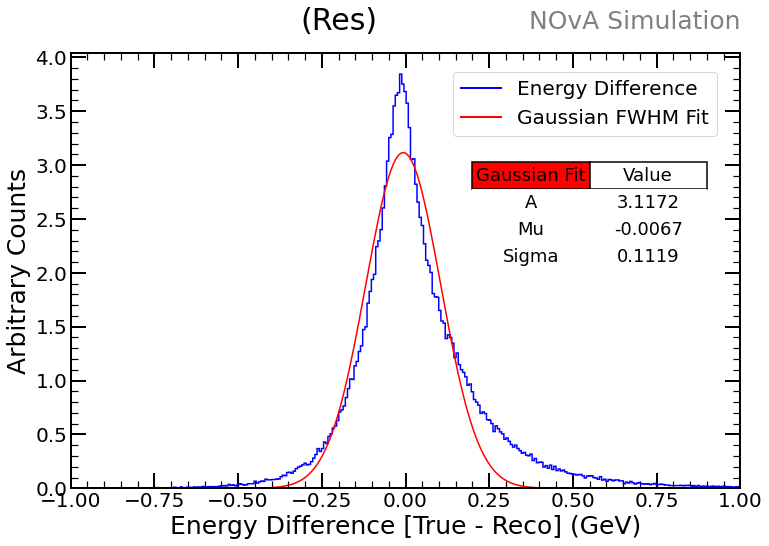

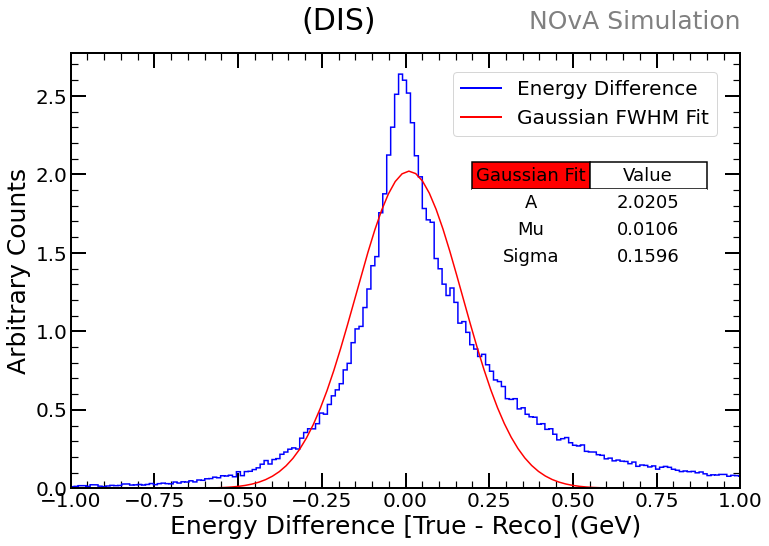

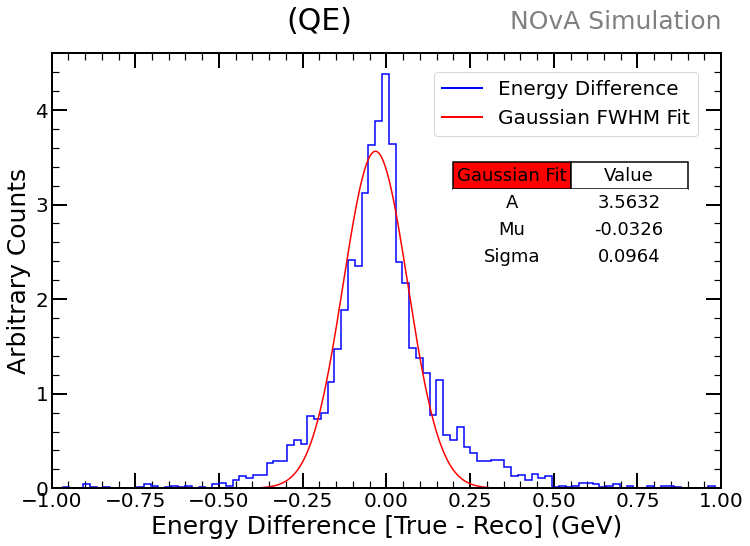

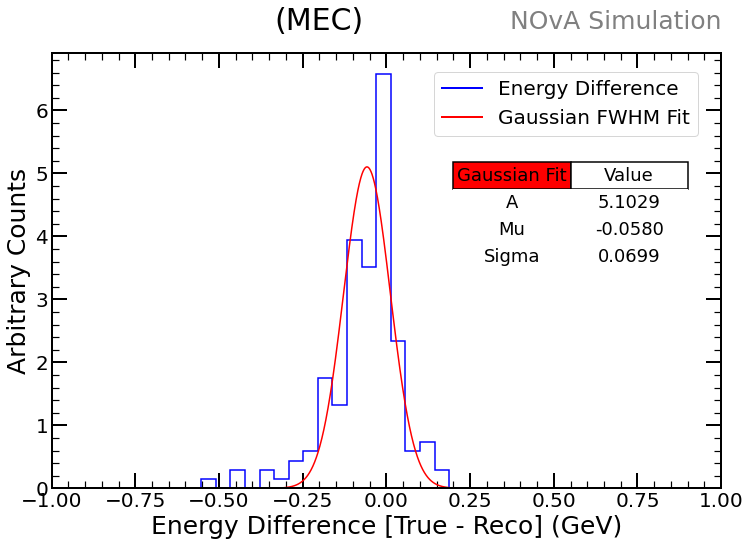

In [15]:
#plot the comparison between energies for the part 1 reconstructed simulated and the gaussian fit
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

folders=['Res','DIS','QE','MEC']

epiNTshift = []
epiReco = []
#store the list of NT original numpi
#store the list of Reco numpi
for folder in folders:
    temp=[]
    temp=read_file(folder, 'analysisfiles/energiesNT_part1')
    epiNTshift=[]
    epiNTshift.extend([float(element)-0.139 for sublist in temp for element in sublist])
    tem2=[]
    temp2=read_file(folder, 'analysisfiles/calenergies_part1')
    epiReco=[]
    epiReco.extend([float(element) for sublist in temp2 for element in sublist])
    diffEshift=[]
    diffEshift = [x - y for x, y in zip(epiNTshift, epiReco)]

    # Histogram data
    hist, bin_edges = np.histogram(diffEshift, bins=autobins(diffEshift), density=True)

    # Gaussian function
    def gaussian(x, A, mu, sigma):
        return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

    # Find the bin with the maximum value of the histogram
    max_bin_index = np.argmax(hist)
    max_bin_center = 0.5 * (bin_edges[max_bin_index] + bin_edges[max_bin_index + 1])

    # Calculate half of the maximum value
    half_max = hist[max_bin_index] / 2

    # Find the bins where the histogram value falls to half of the maximum
    left_index = np.where(hist[:max_bin_index] < half_max)[0][-1]
    right_index = np.where(hist[max_bin_index:] < half_max)[0][0] + max_bin_index

    # Calculate the FWHM
    fwhm = bin_edges[right_index] - bin_edges[left_index]

    # Define the limits for Gaussian fitting
    fit_range = (bin_edges[left_index], bin_edges[right_index])

    # Fit the Gaussian function
    popt, pcov = curve_fit(gaussian, bin_edges[:-1], hist, p0=[np.max(hist), max_bin_center, fwhm / 2], bounds=([0, -np.inf, 0], [np.inf, np.inf, np.inf]), method='trf')

    # Prepare the table with the fitting results
    fit_results = [
        ['A', f'{popt[0]:.4f}'],
        ['Mu', f'{popt[1]:.4f}'],
        ['Sigma', f'{popt[2]:.4f}'],
    ]

    # Plot the histogram and the Gaussian fit
    plt.figure(figsize=(12, 8))

    # Plot the histogram
    plt.hist(diffEshift, bins=bin_edges, edgecolor='blue', linewidth=1.5, histtype='step', density=True, label='Energy Difference')

    # Plot the Gaussian fit
    x_fit = np.linspace(bin_edges[0], bin_edges[-1], 1000)
    plt.plot(x_fit, gaussian(x_fit, *popt), color='red', label='Gaussian Fit', linewidth=1.5)

    # Present the table within the plot
    table = plt.table(cellText=fit_results, colLabels=["Gaussian Fit", "Value"], loc='upper right', cellLoc='center', colColours=['red', 'white'], bbox=[0.6, 0.5, 0.35, 0.25])
    table.auto_set_font_size(False)
    table.set_fontsize(18)
    table.scale(1.2, 1.2)

    # Remove internal lines and keep outer lines
    for key, cell in table.get_celld().items():
        cell.set_linewidth(0)  # Remove internal lines
        if key[0] == 0 or key[1] == -1:
            cell.set_linewidth(1.5)  # Keep outer lines

    plt.xlabel('Energy Difference [True - Reco] (GeV)', fontsize=25)
    plt.ylabel('Arbitrary Counts', fontsize=25)
    plt.title(f'({folder})',x=0.4,y=1.04,fontsize=30)
    plt.legend(fontsize=15)
    plt.xlim(-1, 1)

    # Set the number of ticks on the axes
    # plt.locator_params(axis='y', nbins=4)
    # plt.locator_params(axis='x', nbins=6)
    set_plot_style()
    labels=['Energy Difference','Gaussian FWHM Fit']
    handles = [Line2D([0], [0], color='blue', lw=2), Line2D([0], [0], color='red', lw=2)]
    plt.legend(handles=handles, labels=labels, fontsize=20, loc='upper right', bbox_to_anchor=(0.98, 0.98))
    # Save the plot
    # plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/Diff_Energy_gaussian_FWHM_fit_with_table2_total.png', bbox_inches='tight')
    plt.show()

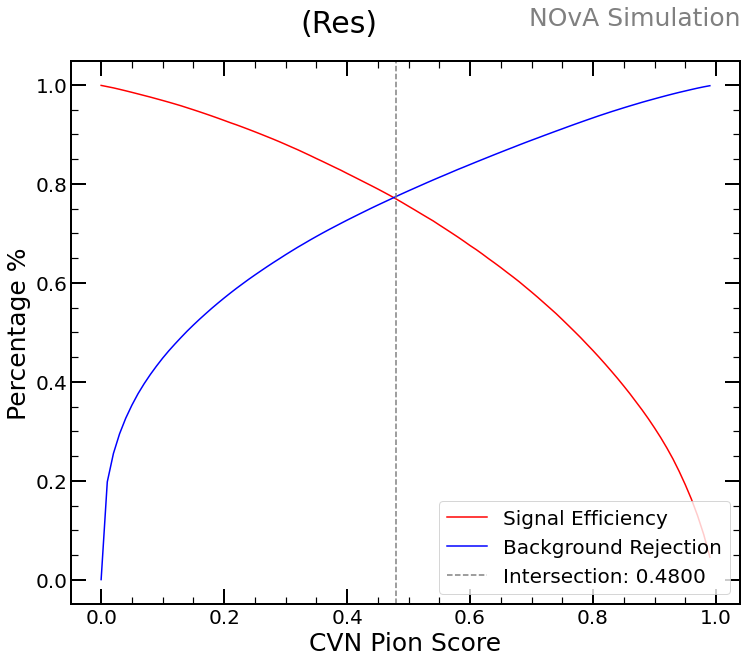

In [107]:
# Define the folder names
folders = ['MEC', 'DIS', 'QE', 'Res']

# Initialize an empty list to store the data
data_list = []

# Loop through each folder and load the data
for folder in folders:
    file_path = f"{folder}/analysisfiles/sig_rej_data.txt"
    data = np.loadtxt(file_path)
    data_list.append(data)

# Concatenate all data into a single numpy array
all_data = np.vstack(data_list)

# data = np.loadtxt(f"{folder}/analysisfiles/sig_rej_data.txt")

# Extract columns
x = data[:, 0]
y1 = data[:, 1]
y2 = data[:, 2]

# Plot the data
plt.figure(figsize=(12, 10))
plt.plot(x, y1, linewidth=1.5,color='red', label='Signal Efficiency')
plt.plot(x, y2, linewidth=1.5,color='blue', label='Background Rejection')

# Find intersection point
intersection_index = np.argmin(np.abs(y1 - y2))
intersection_x = x[intersection_index]

# Plot vertical line at intersection
plt.axvline(x=intersection_x, color='gray', linestyle='--', label=f'Intersection: {intersection_x:.2f}')

# Add labels and title
plt.xlabel('CVN Pion Score', fontsize=25)
plt.ylabel('Percentage %', fontsize=25)
plt.title(f'({folder})',x=0.4,  y=1.042, fontsize=30)

set_plot_style()

# Get existing legend labels
handles, labels = plt.gca().get_legend_handles_labels()

# Add intersection value to legend
intersection_label = f'Intersection: {intersection_x:.2f}'
labels.append(intersection_label)

# Plot legend with updated labels
plt.legend(handles, labels, fontsize=20, loc='lower right')  # Adjust legend location as needed

# Save the plot
# plt.savefig(f"{folder}/analysisfiles/images/sig_rej_{folder}.png", bbox_inches='tight')
# plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/sig_rej_{folder}.png', bbox_inches='tight')

# Show the plot
plt.show()

In [108]:
print(f"Total number of entries: {all_data.shape[0]}")

Total number of entries: 400


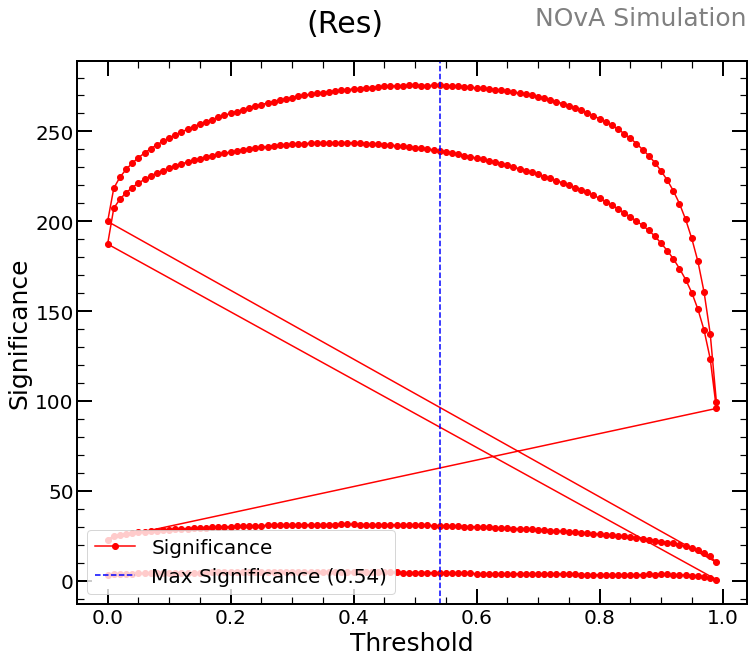

In [88]:
import numpy as np

# Define the folder names
folders = ['MEC', 'DIS', 'QE', 'Res']

# Define the data type for structured arrays
dtype = [
    ('Threshold', float), ('Efficiency', float), ('Rejection', float), 
    ('FPR', float), ('TPR', float), ('Precision', float), 
    ('Recall', float), ('F1 Score', float), ('Purity', float), 
    ('Significance', float)
]

# Initialize an empty list to store the data
data_list = []

# Loop through each folder and load the data
for folder in folders:
    file_path = f"{folder}/analysisfiles/analysis_data.txt"
    data = np.loadtxt(file_path, dtype=dtype, delimiter='\t', skiprows=1)
    data_list.append(data)

# Concatenate all data into a single numpy structured array
all_data = np.concatenate(data_list)

# Extract data from the concatenated array
thresholds = all_data['Threshold']
efficiencies = all_data['Efficiency']
rejections = all_data['Rejection']
fprlist = all_data['FPR']
tprlist = all_data['TPR']
precisions = all_data['Precision']
recalls = all_data['Recall']
f1_scores = all_data['F1 Score']
purities = all_data['Purity']
significances = all_data['Significance']

plt.figure(figsize=(12, 10))
plt.plot(thresholds, significances, label='Significance', color='red', marker='o')
plt.xlabel('Threshold',fontsize=25)
plt.ylabel('Significance',fontsize=25)
set_plot_style()
plt.title(f'({folder})',x=0.4,y=1.042 ,fontsize=30)
# plt.savefig(f"{folder}/analysisfiles/images/frp_vs_trp_{folder}.png", bbox_inches='tight')
# plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/significances_{folder}.png', bbox_inches='tight')
plt.legend(fontsize=20)

# Find the index of the maximum significance value
max_index = np.argmax(significances)
max_threshold = thresholds[max_index]
max_significance = significances[max_index]

# Add a vertical line at the maximum significance threshold
plt.axvline(x=max_threshold, color='blue', linestyle='--', label=f'Max Significance ({max_threshold:.2f})')
plt.legend(loc='lower left', fontsize=20)
# plt.savefig(f"{folder}/analysisfiles/images/frp_vs_trp_{folder}.png", bbox_inches='tight')
# plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/significances_with_max_{folder}.png', bbox_inches='tight')
plt.show()


In [4]:
#IN THISSECTION WE CHECK THE PLOTS FOR THE TWO POSSIBLE OUTPUTS SUGGESTED (REPLACIONG EVDS) FOR RECONSTRUCTED PIONS
start_time = time.time()

folders=['Res','DIS','MEC','QE']

energies=[]
calenergies=[]
alpha=[]
theta=[]
length=[]
hits=[]
cvn=[]

for folder in folders:
    
    temp=[]
    temp=read_file(folder, 'analysisfiles/energiesNT_part1')
    energies.extend([float(element)-0.139 for sublist in temp for element in sublist])
    
    temp1=[]
    temp1=read_file(folder,'analysisfiles/length_part1')
    length.extend([float(element) for sublist in temp1 for element in sublist])
    
    temp2=[]
    temp2=read_file(folder,'analysisfiles/numhits_part1')
    hits.extend([float(element) for sublist in temp2 for element in sublist])
        
    temp3=[]
    temp3=read_file(folder, 'analysisfiles/CVN_part1')
    cvn.extend([float(element) for sublist in temp3 for element in sublist])
    
    temp4=[]
    temp4=read_file(folder, 'analysisfiles/calenergies_part1')
    calenergies.extend([float(element) for sublist in temp4 for element in sublist])
    
    temp5=[]
    temp5=read_file(folder,'analysisfiles/theta_part1')
    theta.extend([float(element)*(180 / math.pi) for sublist in temp5 for element in sublist])
    
    temp7=[]
    temp7=read_file(folder,'analysisfiles/alpha_part1')
    for event in temp7:
        l = len(event)
        num =int(l/3)-1
        mm=0
        for i in range(num):
            mm=mm+3
            vector1 = np.array([float(event[0]), float(event[1]), float(event[2])])
            vector2 = np.array([float(event[mm]), float(event[mm+1]), float(event[mm+2])])
            dot_product = np.dot(vector1, vector2)
            magnitude_product = np.linalg.norm(vector1) * np.linalg.norm(vector2)
            cosine_theta = dot_product / magnitude_product
            #save the cosine
            #alpha.append(cosine_theta)
            angle_radians = np.arccos(cosine_theta)
            degrees_angle = angle_radians * (180 / math.pi)
            #alpha.append(angle_radians)
            alpha.append(degrees_angle)
            
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 8.427745342254639 seconds


In [12]:
selected_energies=[]
for i,element in enumerate(energies):
    if 0.2 < element < 0.65:
        if 0.1 < calenergies[i] < 0.5:
            if 30 < alpha[i] < 100:
                if 5 < theta[i] < 65:
                    if 25 < length[i] < 200:
                        if 5 <hits[i] < 30:
                            if cvn[i] > 0.8:
                                selected_energies.append(element)
                                
unselected_energies=[]
for i,element in enumerate(energies):
    if 0.2 < element < 0.65:
        if 0.1 < calenergies[i] < 0.5:
            if 30 < alpha[i] < 100:
                if 5 < theta[i] < 65:
                    if 25 < length[i] < 200:
                        if 5 <hits[i] < 30:
                            if cvn[i] < 0.25:
                                unselected_energies.append(element)

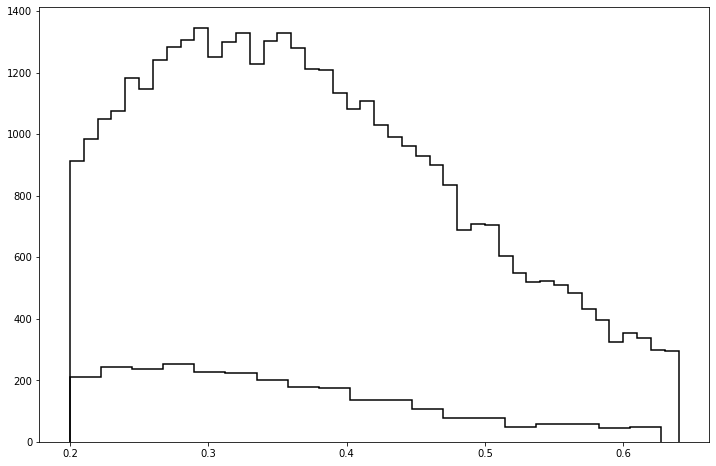

In [15]:
plt.figure(figsize=(12, 8))
plt.hist(selected_energies, bins=autobins(selected_energies), histtype='step', edgecolor='black',linewidth=1.5)
# plt.xlabel('Reconstructed Energy (GeV)',fontsize=25)
# plt.ylabel('Normalized Counts',fontsize=25)
# plt.title(fr'$\gamma$',x=0.4,y=1.04,fontsize=30)
# plt.legend(fontsize=20,loc='upper right',bbox_to_anchor=(0.98, 0.98))
# set_plot_style()
# plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/gamma_energy_for_cvn_with_treshold_total.png', bbox_inches='tight')
# plt.show()

# plt.figure(figsize=(12, 8))
plt.hist(unselected_energies, bins=autobins(unselected_energies), histtype='step', edgecolor='black',linewidth=1.5)
# plt.xlabel('Reconstructed Energy (GeV)',fontsize=25)
# plt.ylabel('Normalized Counts',fontsize=25)
# plt.title(fr'$\gamma$',x=0.4,y=1.04,fontsize=30)
# plt.legend(fontsize=20,loc='upper right',bbox_to_anchor=(0.98, 0.98))
# set_plot_style()
# plt.savefig(f'/Users/maldi/Documents/NOvA/FreezingMoonV/Chap5/gamma_energy_for_cvn_with_treshold_total.png', bbox_inches='tight')
plt.show()



In [3]:
#NOW CHECVK THE CVN VS THE ANGLES
start_time = time.time()

folders=['Res','DIS','MEC','QE']

            
theta=[]
alpha=[]



for folder in folders:
    temp1=[]
    temp1=read_file(folder, 'analysisfiles/theta_part2')
    theta.extend([float(element)*(180 / math.pi) for sublist in temp1 for element in sublist])
    
    temp2=[]
    temp2=read_file(folder, 'analysisfiles/alpha_part2') 
    for event in temp2:
        l = len(event)
        num =int(l/3)-1
        mm=0
        for i in range(num):
            mm=mm+3
            vector1 = np.array([float(event[0]), float(event[1]), float(event[2])])
            vector2 = np.array([float(event[mm]), float(event[mm+1]), float(event[mm+2])])
            dot_product = np.dot(vector1, vector2)
            magnitude_product = np.linalg.norm(vector1) * np.linalg.norm(vector2)
            cosine_theta = dot_product / magnitude_product
            #save the cosine
            #alpha.append(cosine_theta)
            angle_radians = np.arccos(cosine_theta)
            degrees_angle = angle_radians * (180 / math.pi)
            #alpha.append(angle_radians)
            alpha.append(degrees_angle)

energiesnt=[]

for folder in folders:
    temp1=[]
    temp1=read_file(folder, 'analysisfiles/energiesNT_part2')
    energiesnt.extend([float(element)-0.139 for sublist in temp1 for element in sublist])  
        
        
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 27.19703459739685 seconds


In [6]:
count=0

for i, element in enumerate(energiesnt):
#     if 0.2 < element < 0.65:
#         if 30 < alpha[i] < 100:
           if 5 < theta[i] < 65:
                count=count+1
                
percentage=count*100/len(energiesnt)

print(f'Percentage of all unreconstructed pions in these high density areas is: {percentage:.2f}%')

Percentage of all unreconstructed pions in these high density areas is: 69.04%


In [26]:
IN THIS SECTION I PUT THE GAUSSIAN/LANDAU GAUSSIAN FITS

SyntaxError: invalid syntax (3931130867.py, line 1)

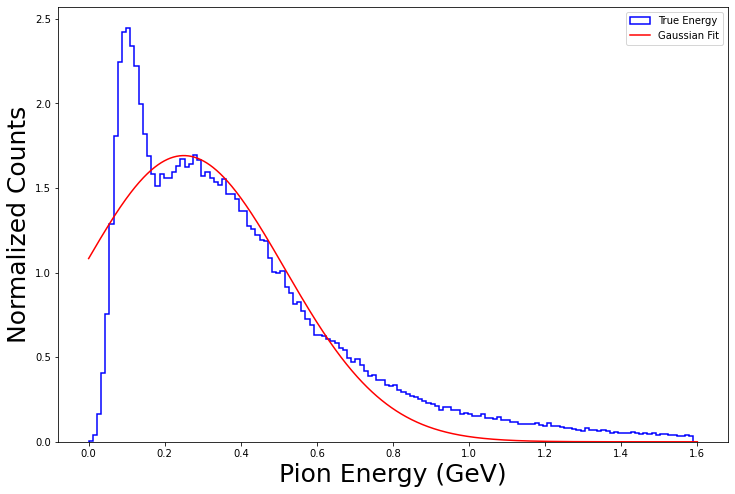

Amplitude: 1.691132549160327
Mean: 0.250020171674113
Standard Deviation: 0.0936183192187907


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit



def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / 4 / stddev)**2)

# Plot histogram
plt.figure(figsize=(12, 8))
bins = autobins(epiNTshift, 0, 1.6)
counts, bin_edges, _ = plt.hist(epiNTshift, bins=bins, edgecolor='blue', linewidth=1.5, histtype='step', label='True Energy', density=True)

# Get bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Fit Gaussian to the histogram
popt, _ = curve_fit(gaussian, bin_centers, counts, p0=[1., 0.8, 0.2])

# Plot Gaussian fit
x = np.linspace(0, 1.6, 1000)
plt.plot(x, gaussian(x, *popt), 'r-', label='Gaussian Fit')

plt.xlabel('Pion Energy (GeV)', fontsize=25)
plt.ylabel('Normalized Counts', fontsize=25)
plt.legend()
plt.show()

# Print Gaussian parameters
amplitude, mean, stddev = popt
print(f"Amplitude: {amplitude}")
print(f"Mean: {mean}")
print(f"Standard Deviation: {stddev}")

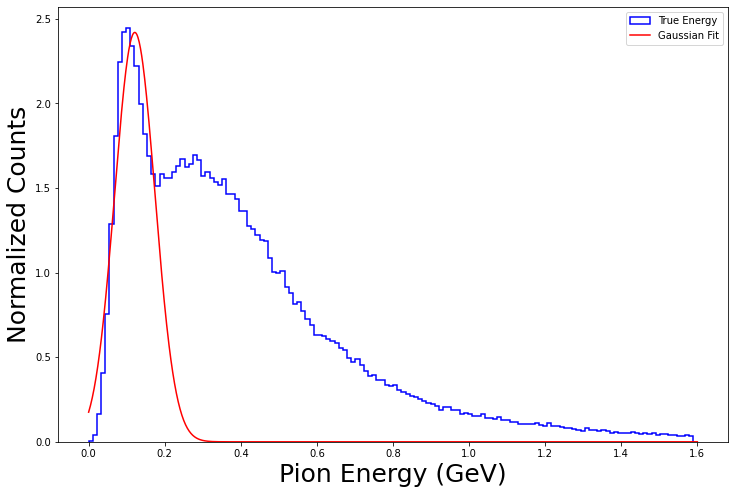

Amplitude: 2.418914252493937
Mean: 0.12131502683350676
Standard Deviation: 0.052934961532266366


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit

# Assuming epiNTshift2 is already defined with your data

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / stddev)**2 / 2)


# Define the range for the Gaussian fit
fit_min = 0
fit_max = 0.2

# Plot histogram
plt.figure(figsize=(12, 8))
bins = autobins(epiNTshift, 0, 1.6)
counts, bin_edges, _ = plt.hist(epiNTshift, bins=bins, edgecolor='blue', linewidth=1.5, histtype='step', label='True Energy', density=True)

# Get bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Select the range for fitting
mask = (bin_centers >= fit_min) & (bin_centers <= fit_max)
fit_bin_centers = bin_centers[mask]
fit_counts = counts[mask]

# Fit Gaussian to the selected section of the histogram
popt, _ = curve_fit(gaussian, fit_bin_centers, fit_counts, p0=[1., (fit_min + fit_max) / 2, 0.1])

# Plot Gaussian fit
x = np.linspace(0, 1.6, 1000)
plt.plot(x, gaussian(x, *popt), 'r-', label='Gaussian Fit')

plt.xlabel('Pion Energy (GeV)', fontsize=25)
plt.ylabel('Normalized Counts', fontsize=25)
plt.legend()
plt.show()

# Print Gaussian parameters
amplitude, mean, stddev = popt
print(f"Amplitude: {amplitude}")
print(f"Mean: {mean}")
print(f"Standard Deviation: {stddev}")


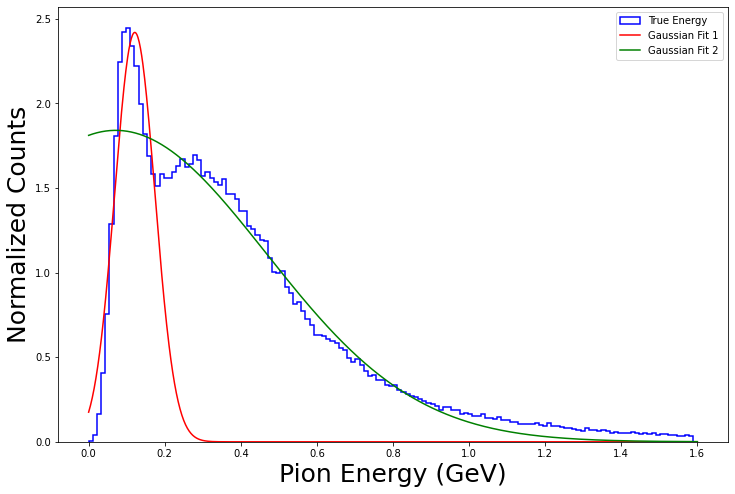

Gaussian Fit 1 - Amplitude: 2.418914252493937, Mean: 0.12131502683350676, Standard Deviation: 0.052934961532266366
Gaussian Fit 2 - Amplitude: 1.84023981200088, Mean: 0.0710659272613615, Standard Deviation: 0.3948099964912904


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


#APPLY TWO GAUSSIAN FITS


# Assuming epiNTshift2 is already defined with your data

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / stddev)**2 / 2)

# Define the ranges for the Gaussian fits
fit1_min = 0
fit1_max = 0.2
fit2_min = 0.2
fit2_max = 1.6

# Plot histogram
plt.figure(figsize=(12, 8))
bins = autobins(epiNTshift, 0, 1.6)
counts, bin_edges, _ = plt.hist(epiNTshift, bins=bins, edgecolor='blue', linewidth=1.5, histtype='step', label='True Energy', density=True)

# Get bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Select the ranges for fitting
mask1 = (bin_centers >= fit1_min) & (bin_centers <= fit1_max)
fit_bin_centers1 = bin_centers[mask1]
fit_counts1 = counts[mask1]

mask2 = (bin_centers >= fit2_min) & (bin_centers <= fit2_max)
fit_bin_centers2 = bin_centers[mask2]
fit_counts2 = counts[mask2]

# Fit Gaussian to the first selected section of the histogram
popt1, _ = curve_fit(gaussian, fit_bin_centers1, fit_counts1, p0=[1., (fit1_min + fit1_max) / 2, 0.1])

# Fit Gaussian to the second selected section of the histogram
popt2, _ = curve_fit(gaussian, fit_bin_centers2, fit_counts2, p0=[1., (fit2_min + fit2_max) / 2, 0.1])

# Plot Gaussian fits
x = np.linspace(0, 1.6, 1000)
plt.plot(x, gaussian(x, *popt1), 'r-', label='Gaussian Fit 1')
plt.plot(x, gaussian(x, *popt2), 'g-', label='Gaussian Fit 2')

plt.xlabel('Pion Energy (GeV)', fontsize=25)
plt.ylabel('Normalized Counts', fontsize=25)
plt.legend()
plt.show()

# Print Gaussian parameters
amplitude1, mean1, stddev1 = popt1
amplitude2, mean2, stddev2 = popt2
print(f"Gaussian Fit 1 - Amplitude: {amplitude1}, Mean: {mean1}, Standard Deviation: {stddev1}")
print(f"Gaussian Fit 2 - Amplitude: {amplitude2}, Mean: {mean2}, Standard Deviation: {stddev2}")
